In [1]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score

2025-02-18 14:01:57.810071: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 14:01:57.817349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739916117.825917    4144 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739916117.828462    4144 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 14:01:57.837552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model_path = '../models/2025-02-18_14-01-12.keras'
image_dir = '../test/testing/Images'
mask_dir = '../test/testing/Masks'
output_dir = '../output'
SIZE = 128
THRESHOLD = 0.4

I0000 00:00:1739916141.395643    4144 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 287 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


117_4096_128.jpg


I0000 00:00:1739916142.083507   64920 service.cc:148] XLA service 0x7f6a9000d050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739916142.083522   64920 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2025-02-18 14:02:22.091204: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739916142.127792   64920 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-18 14:02:22.241410: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[1,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_confi

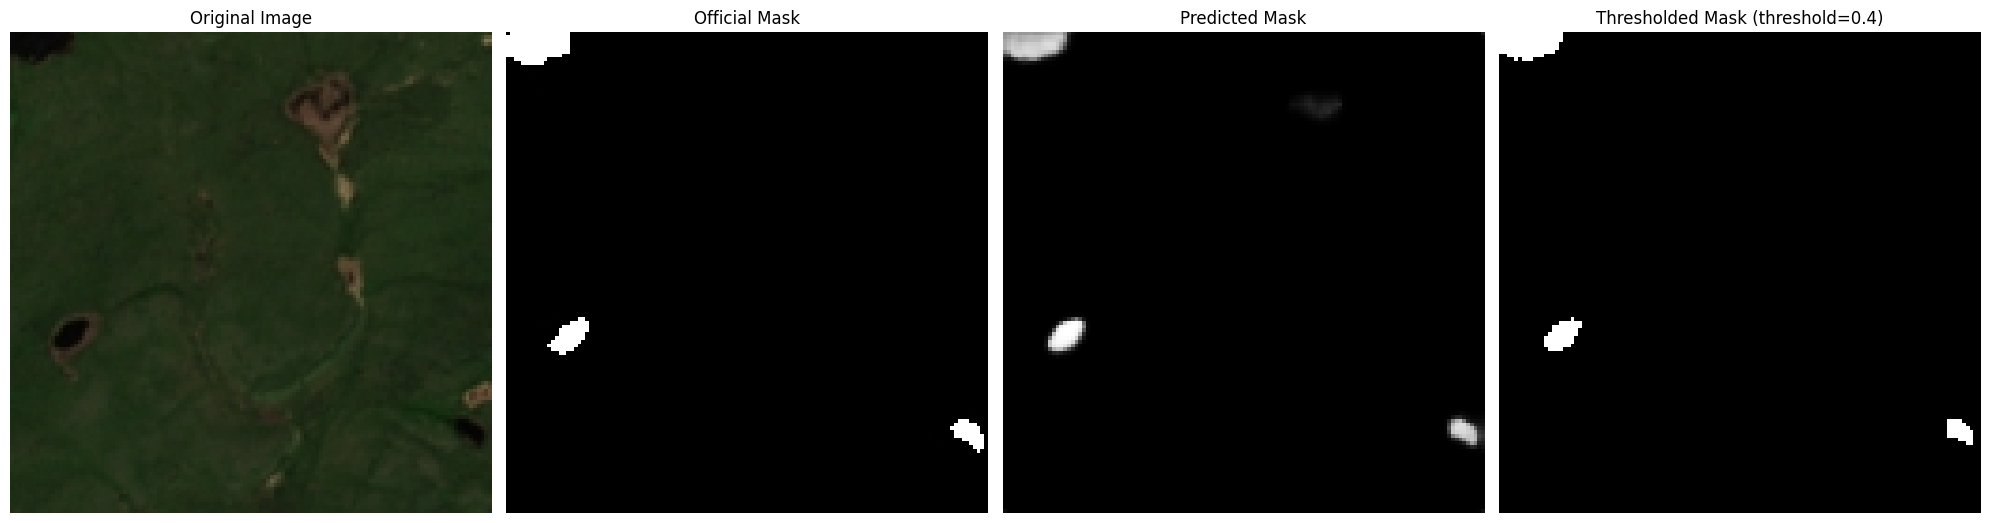

153_8704_128.jpg


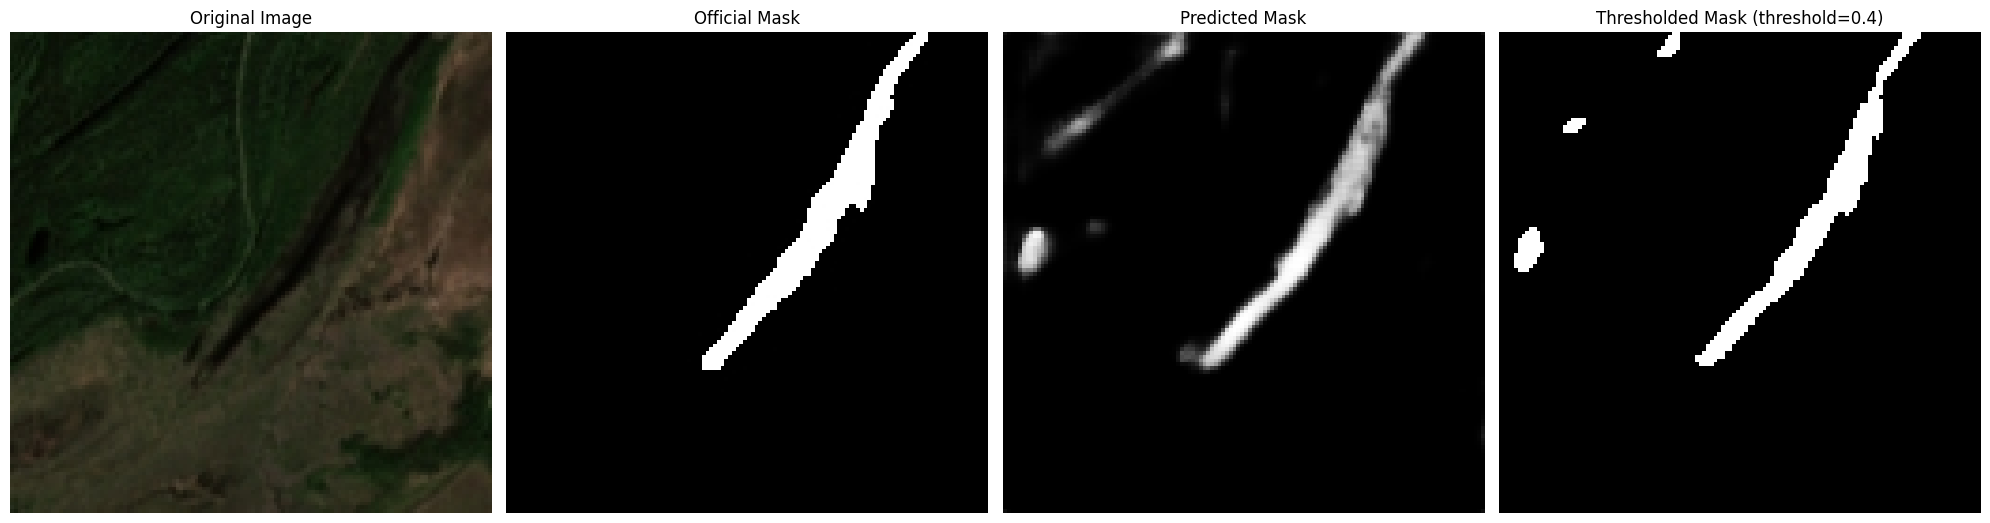

171_128_256.jpg


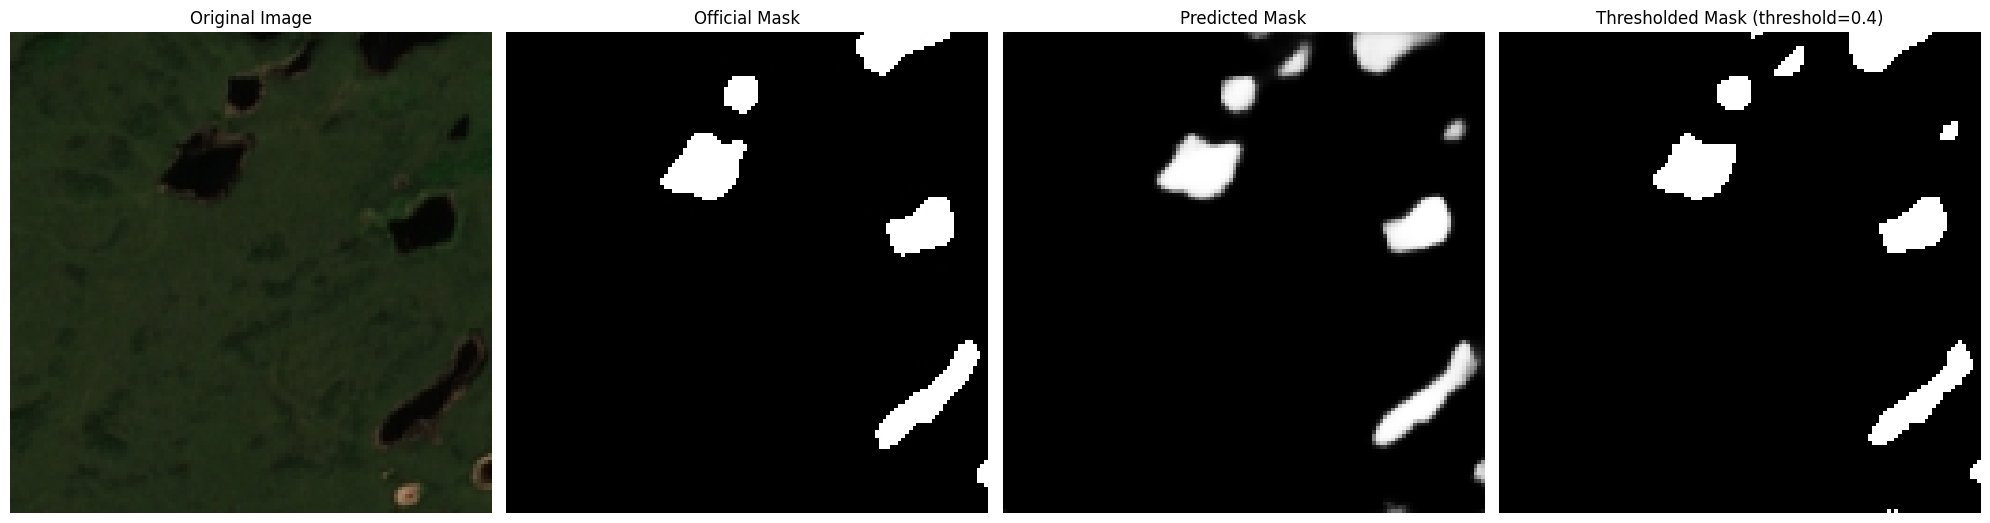

172_256_256.jpg


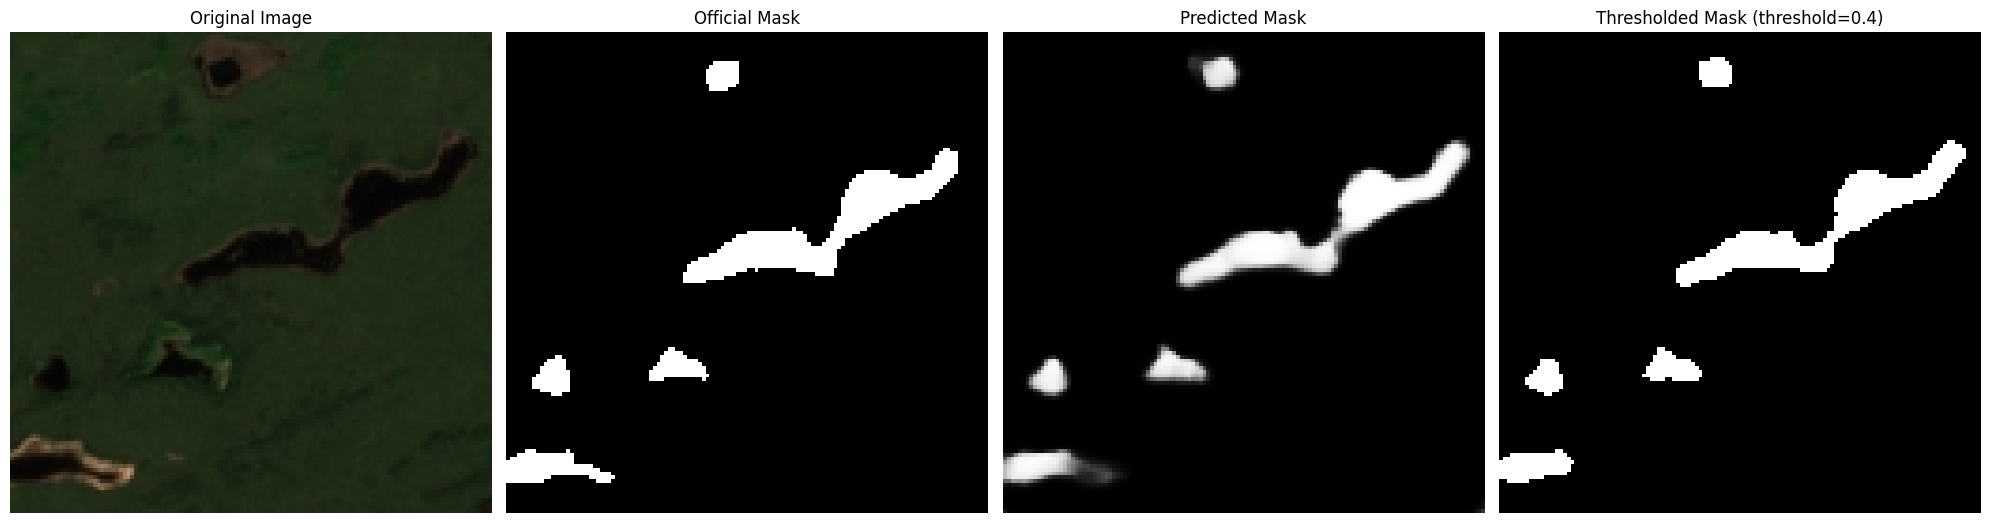

173_384_256.jpg


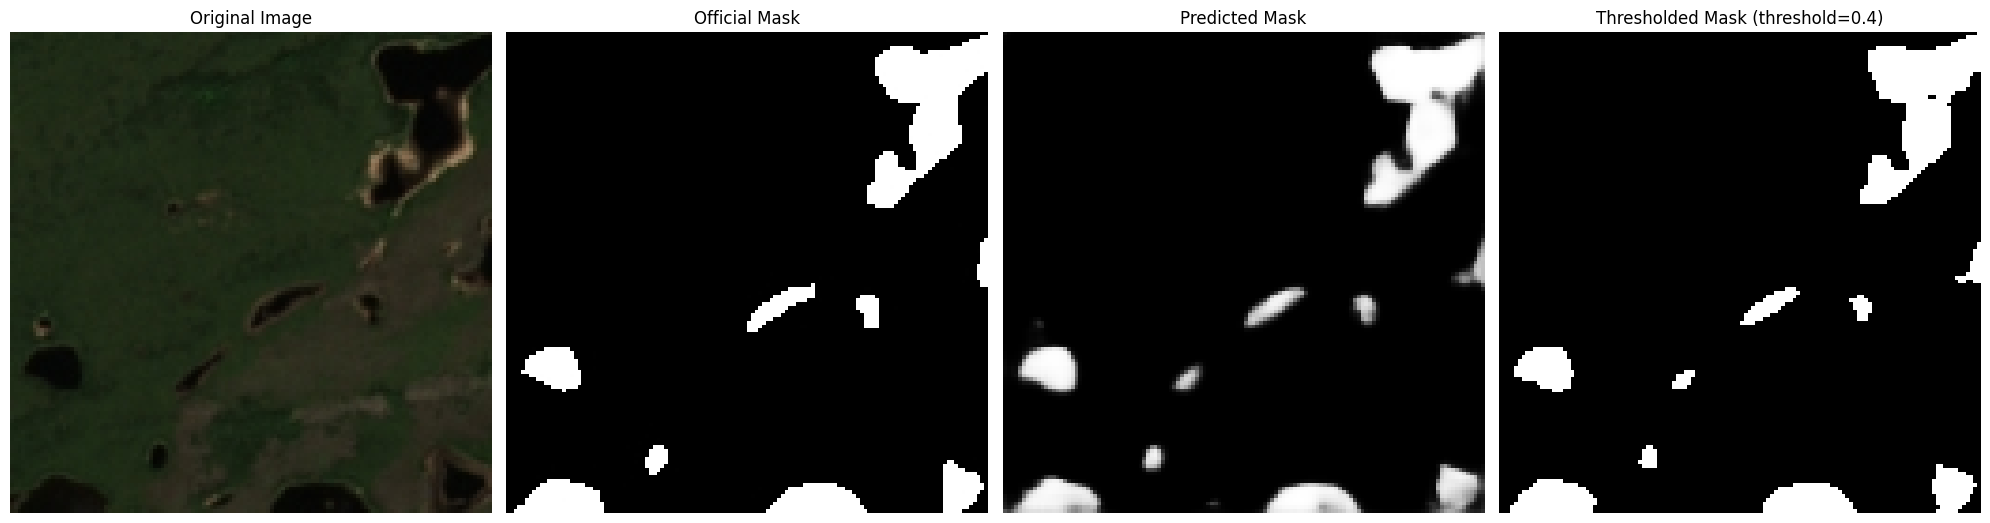

179_1152_256.jpg


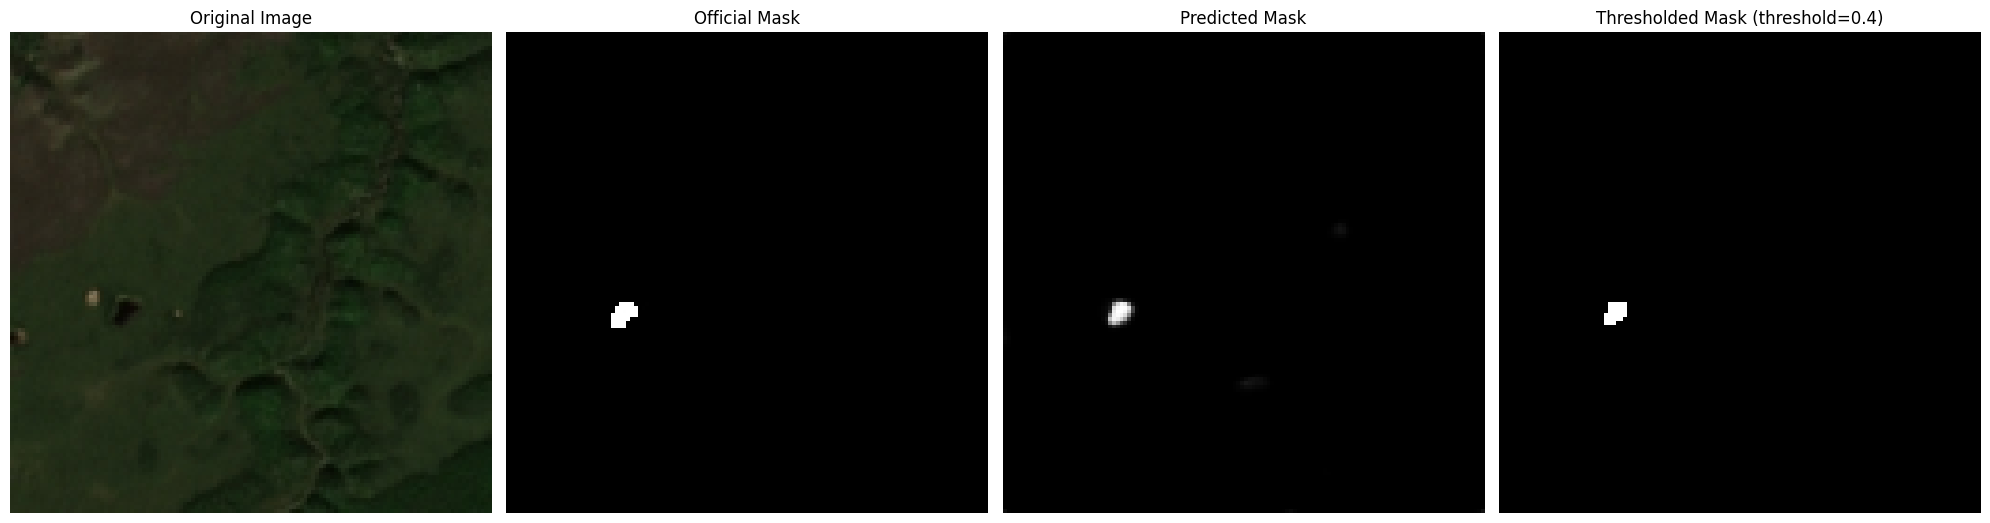

181_1408_256.jpg


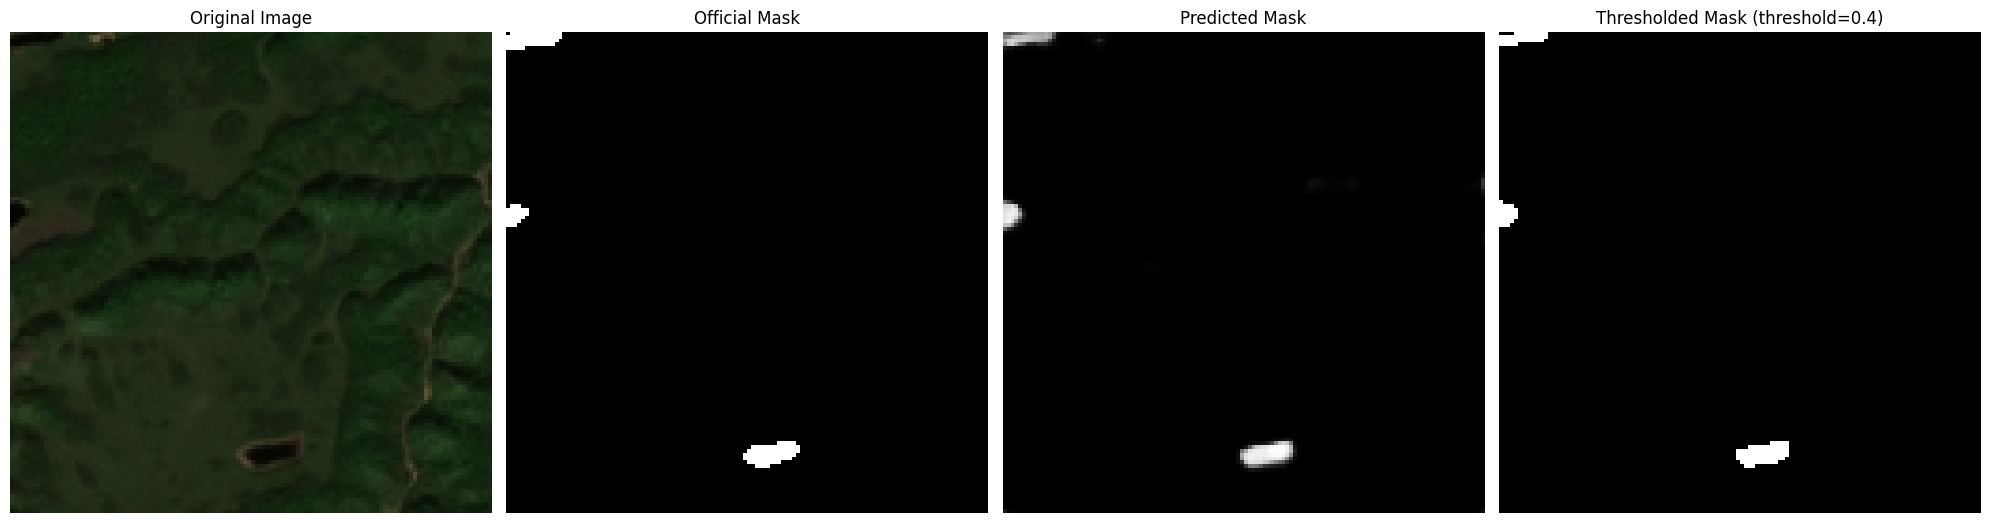

184_1792_256.jpg


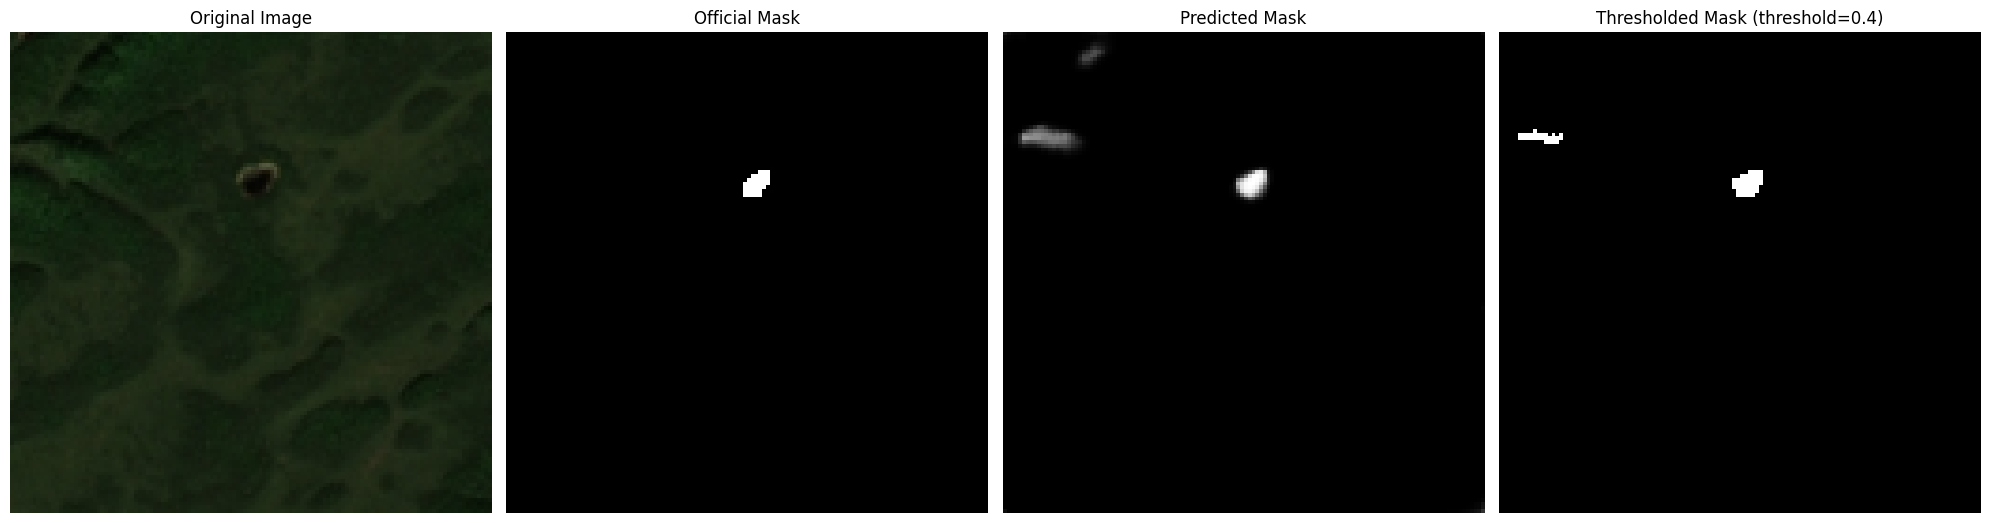

187_2176_256.jpg


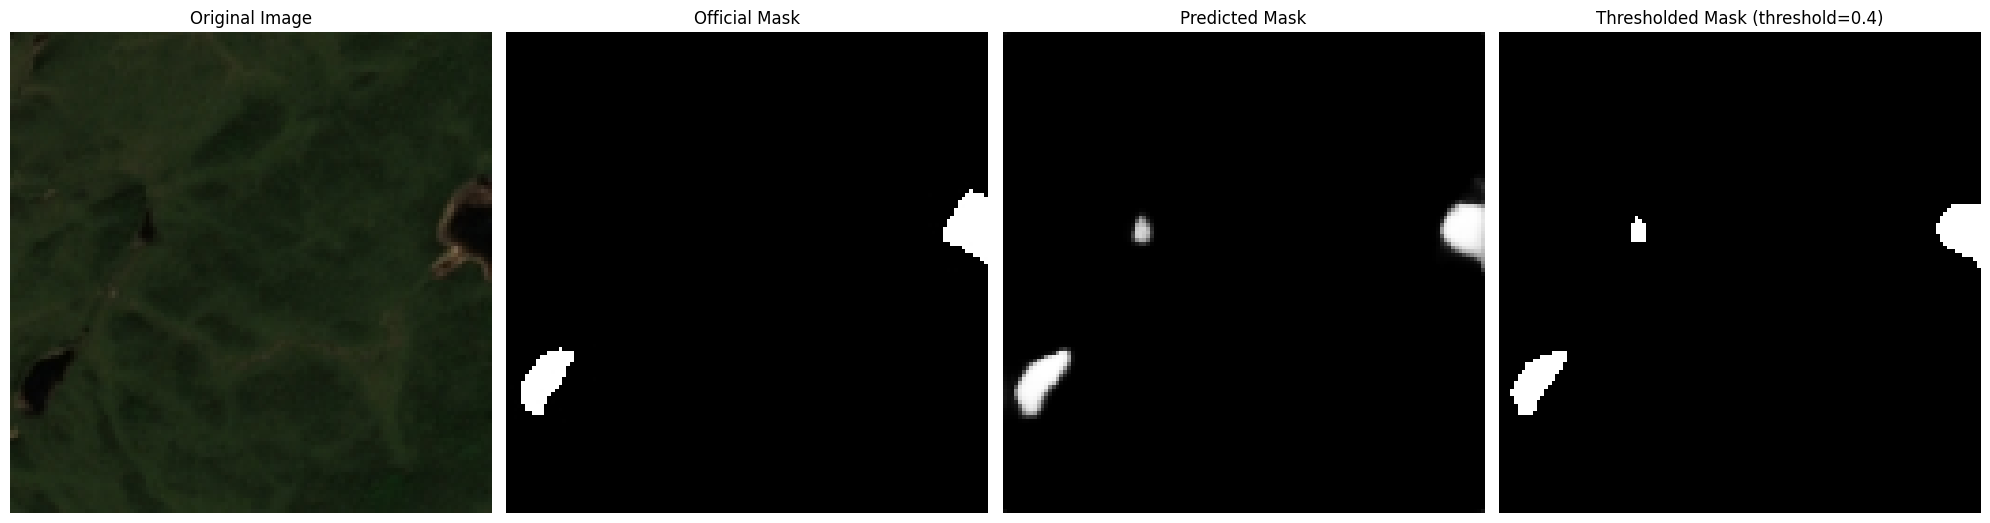

188_2304_256.jpg


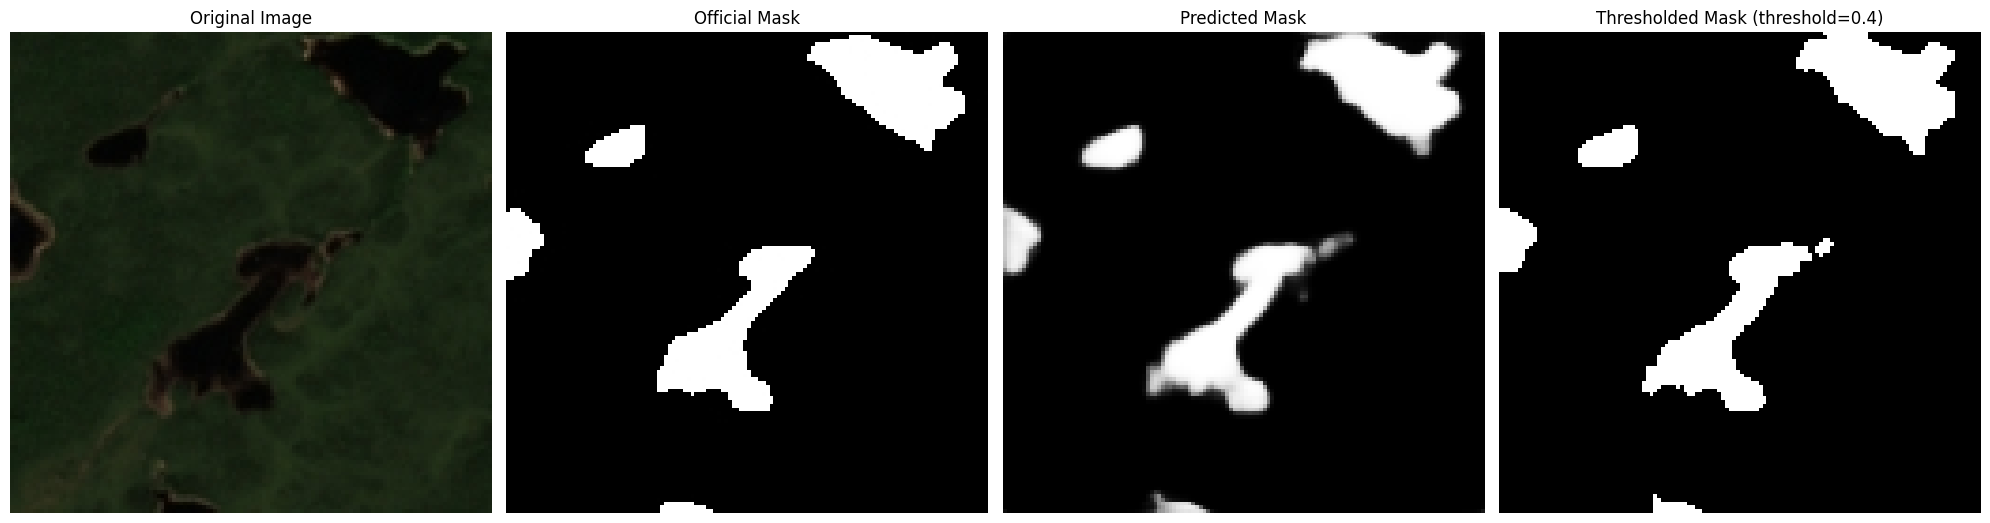

194_3072_256.jpg


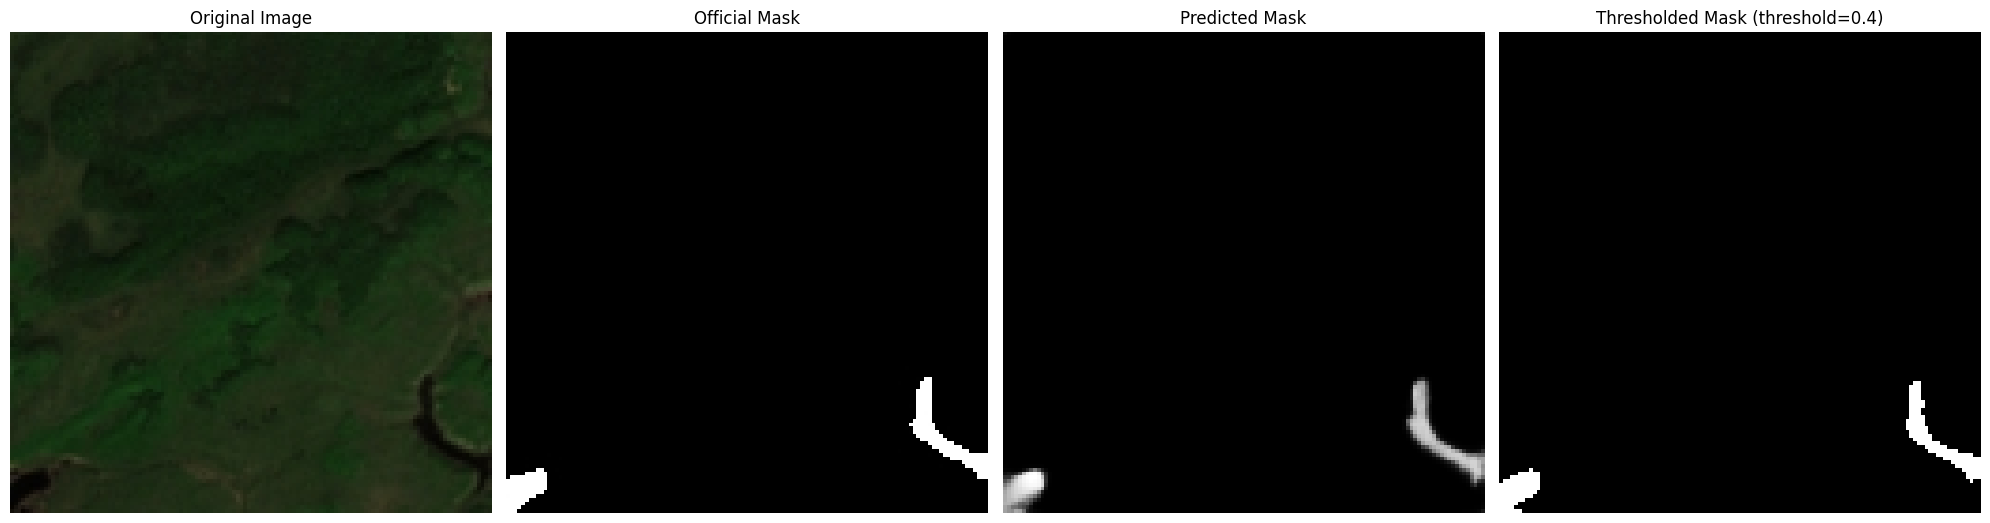

200_3840_256.jpg


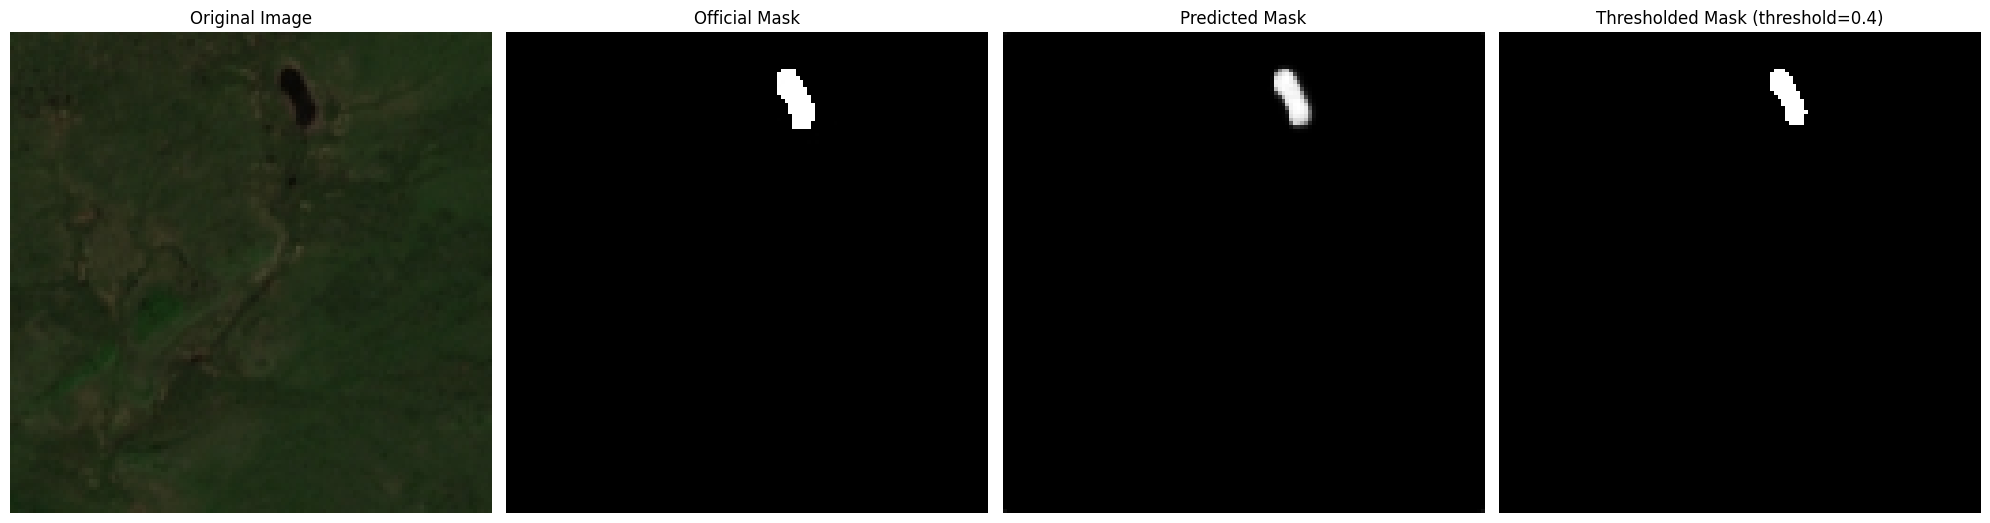

205_4480_256.jpg


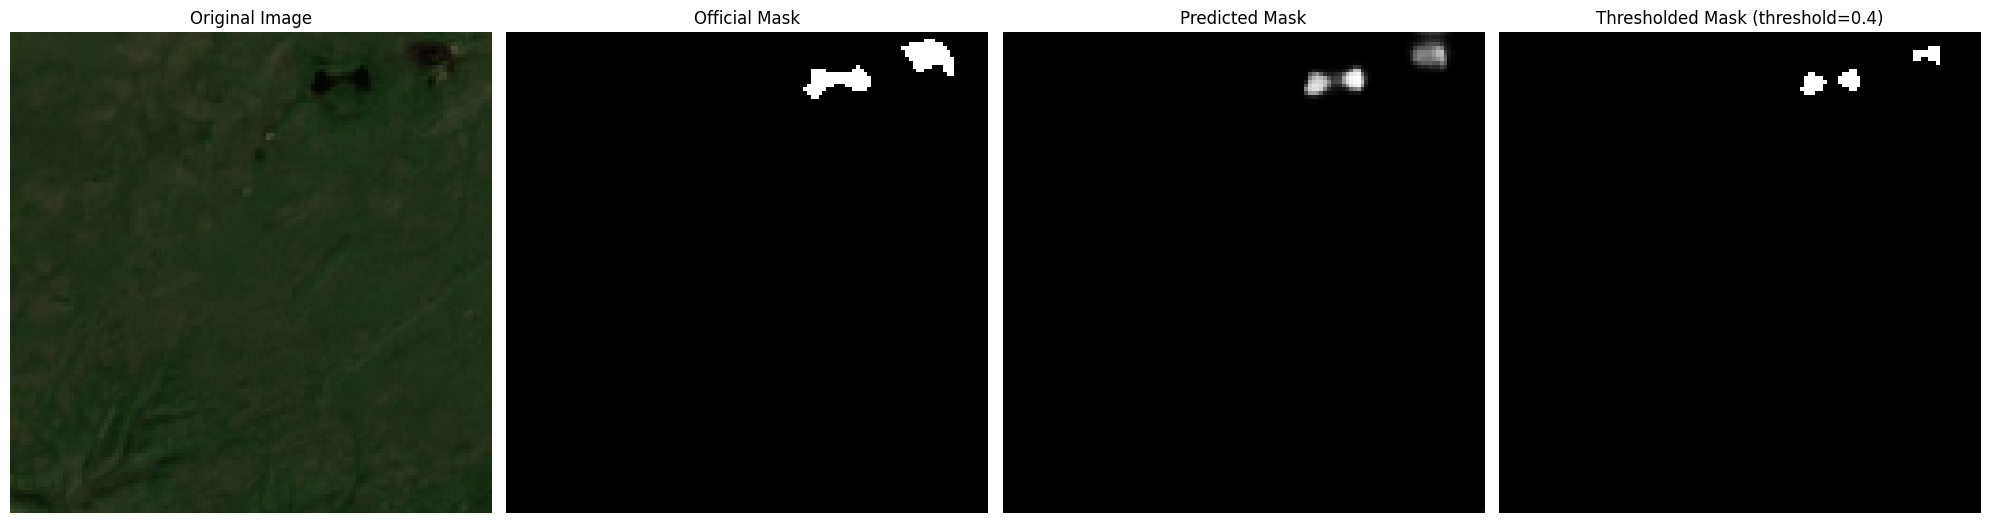

245_9600_256.jpg


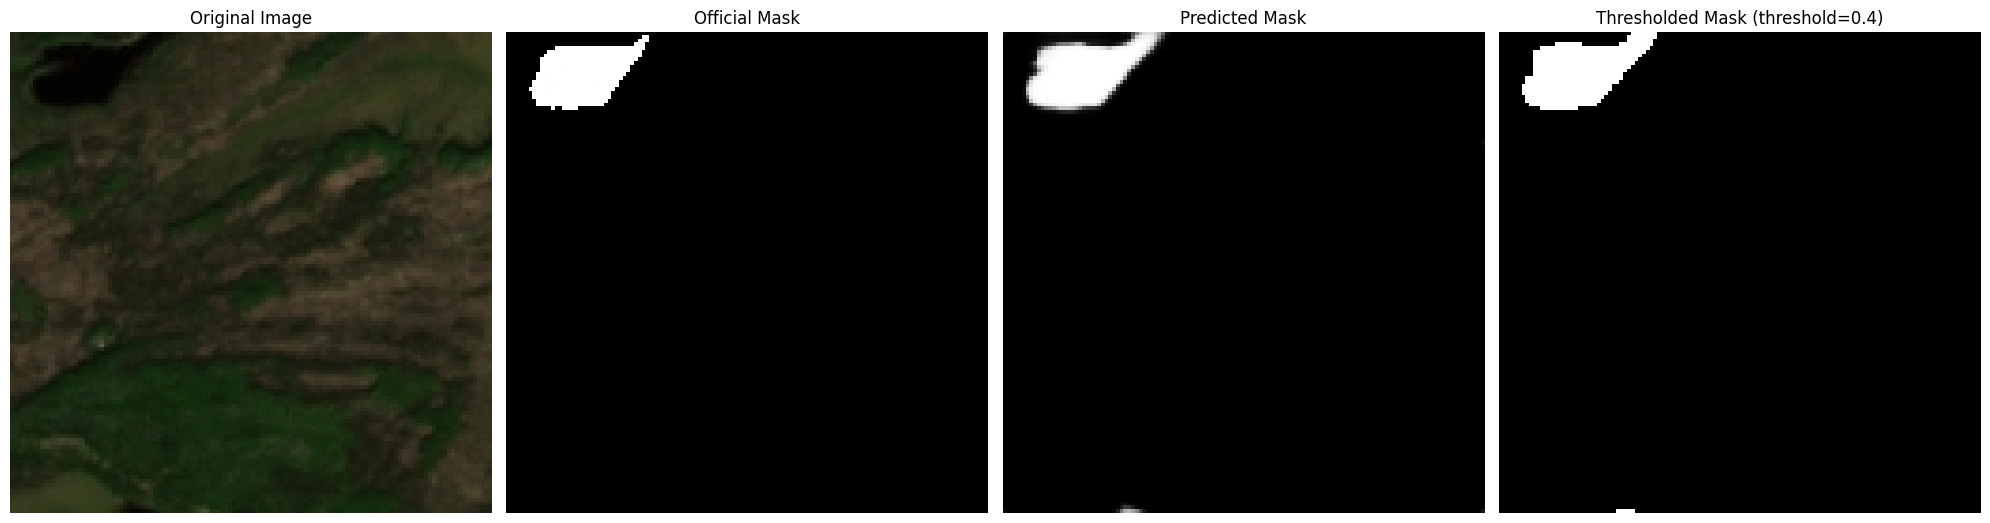

247_9856_256.jpg


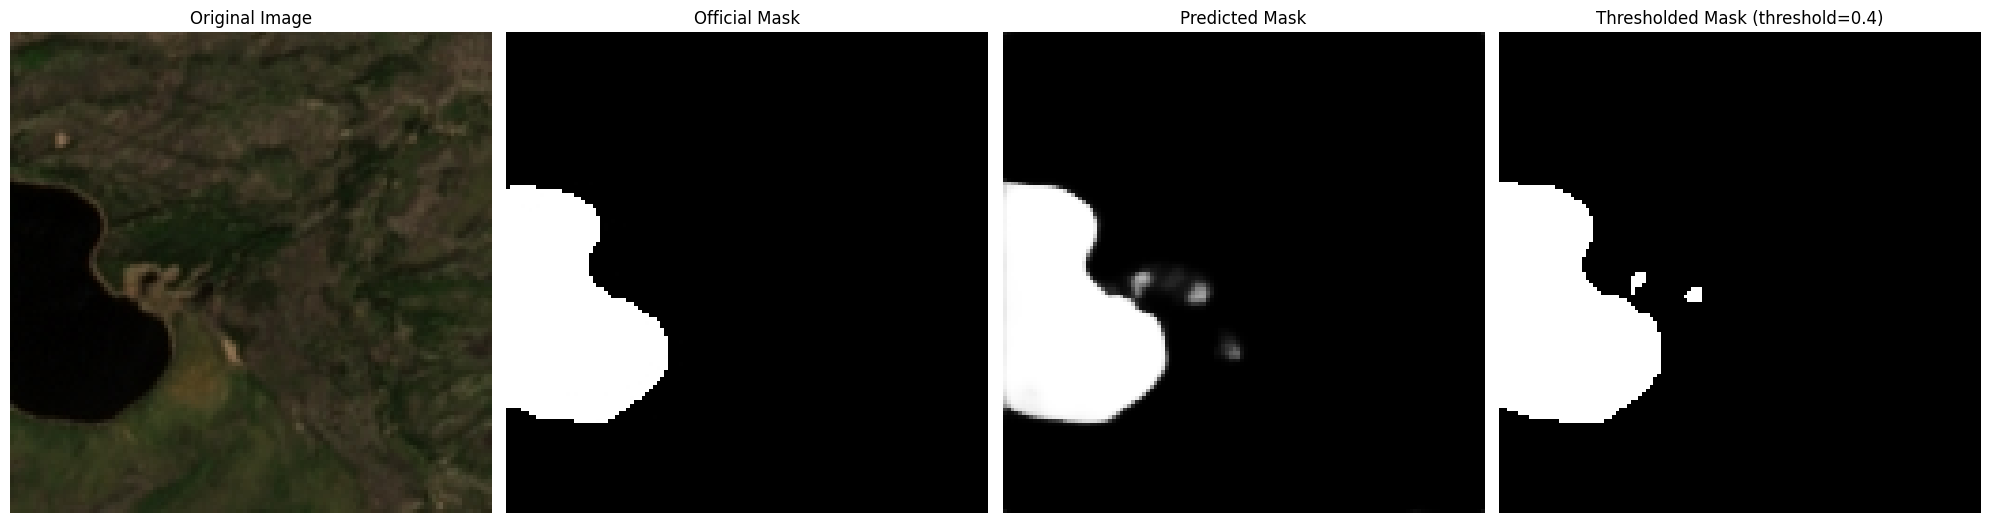

252_10496_256.jpg


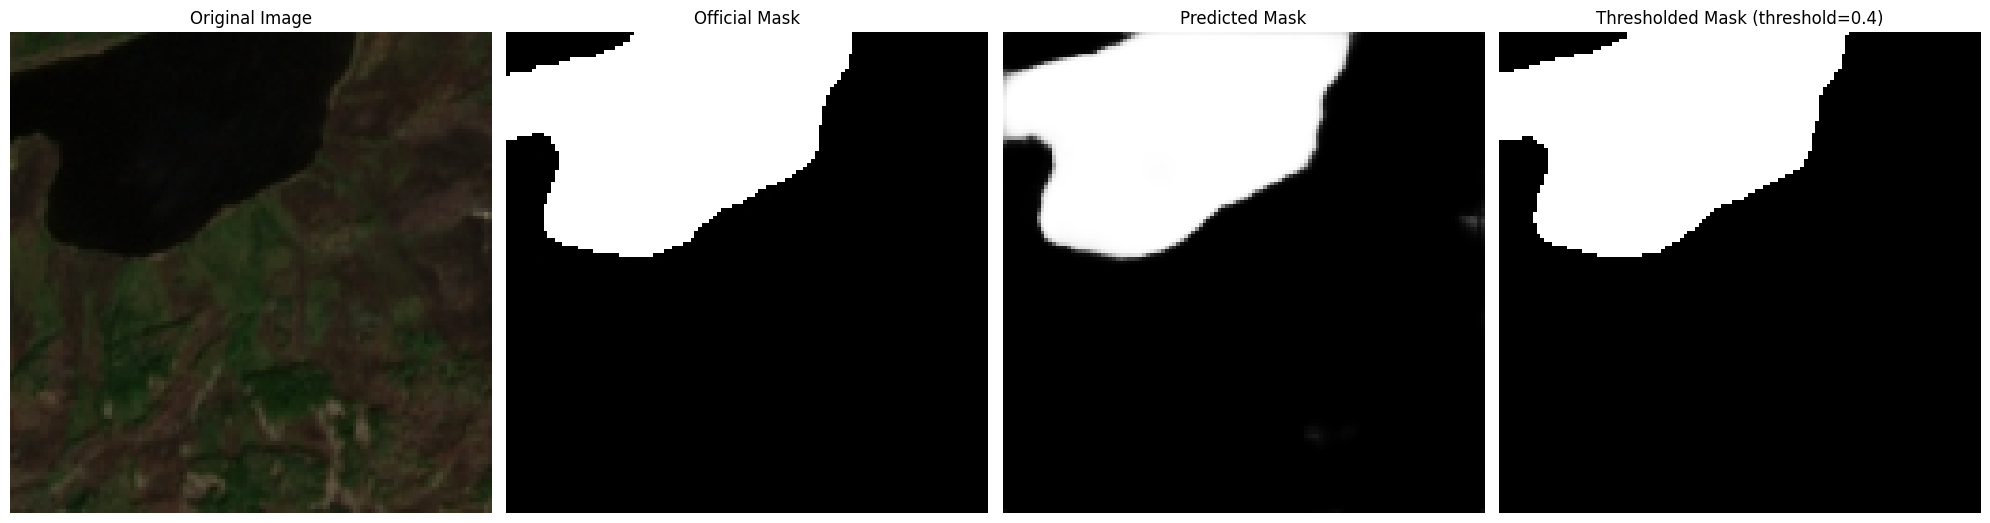

255_0_384.jpg


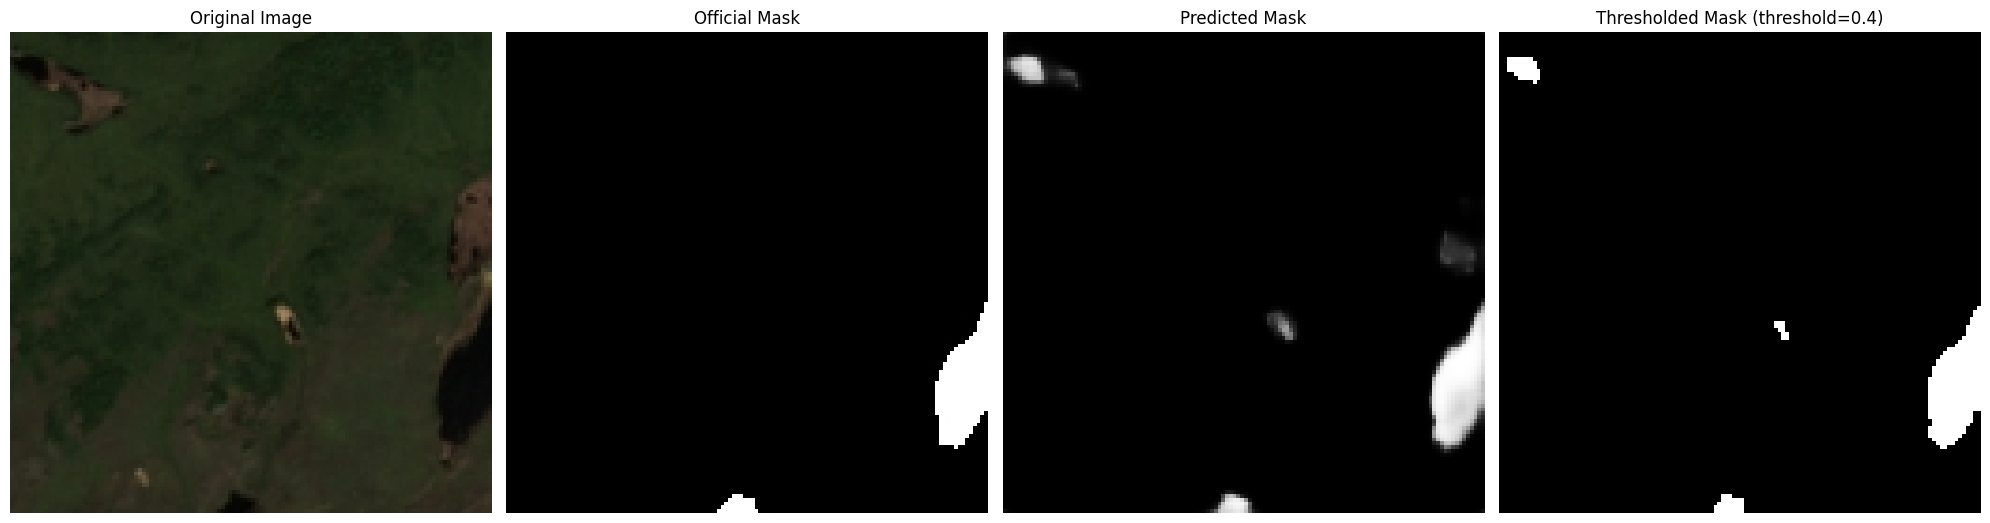

272_2176_384.jpg


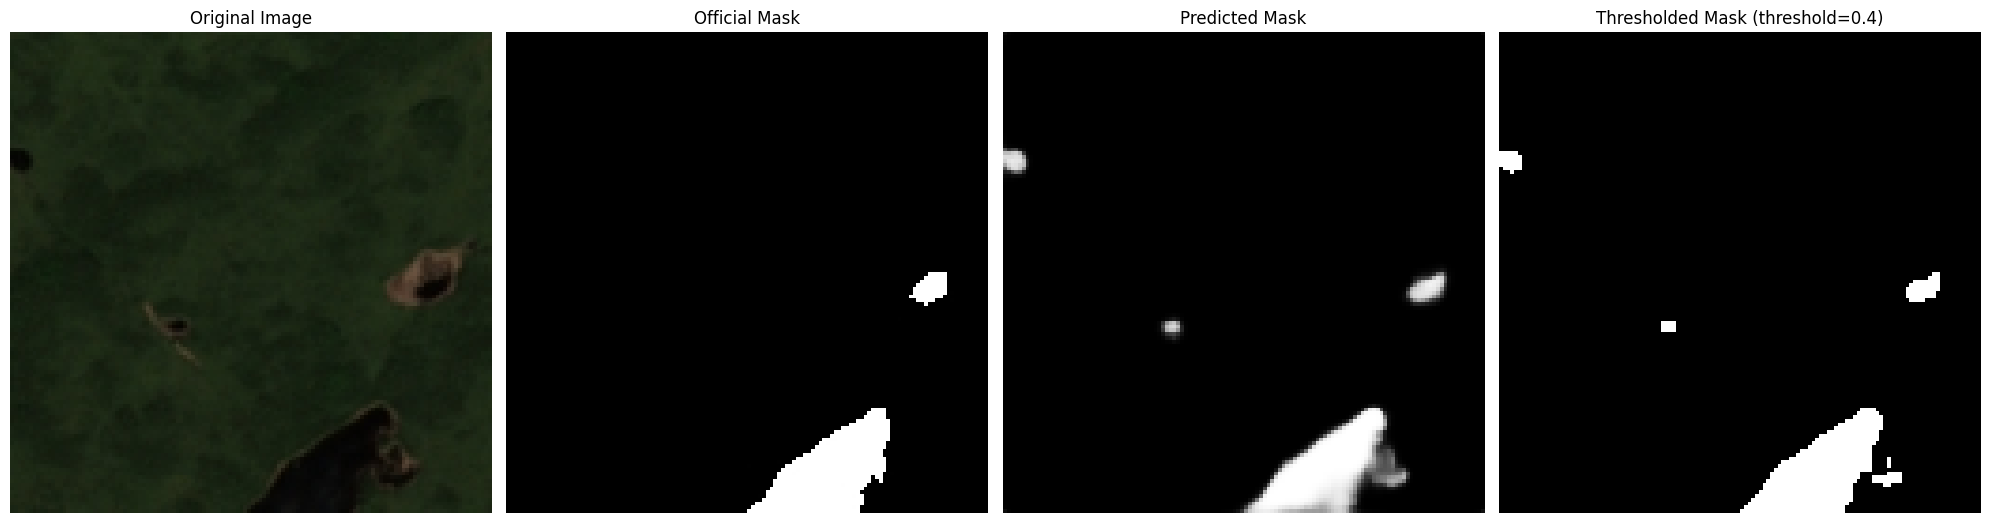

283_3584_384.jpg


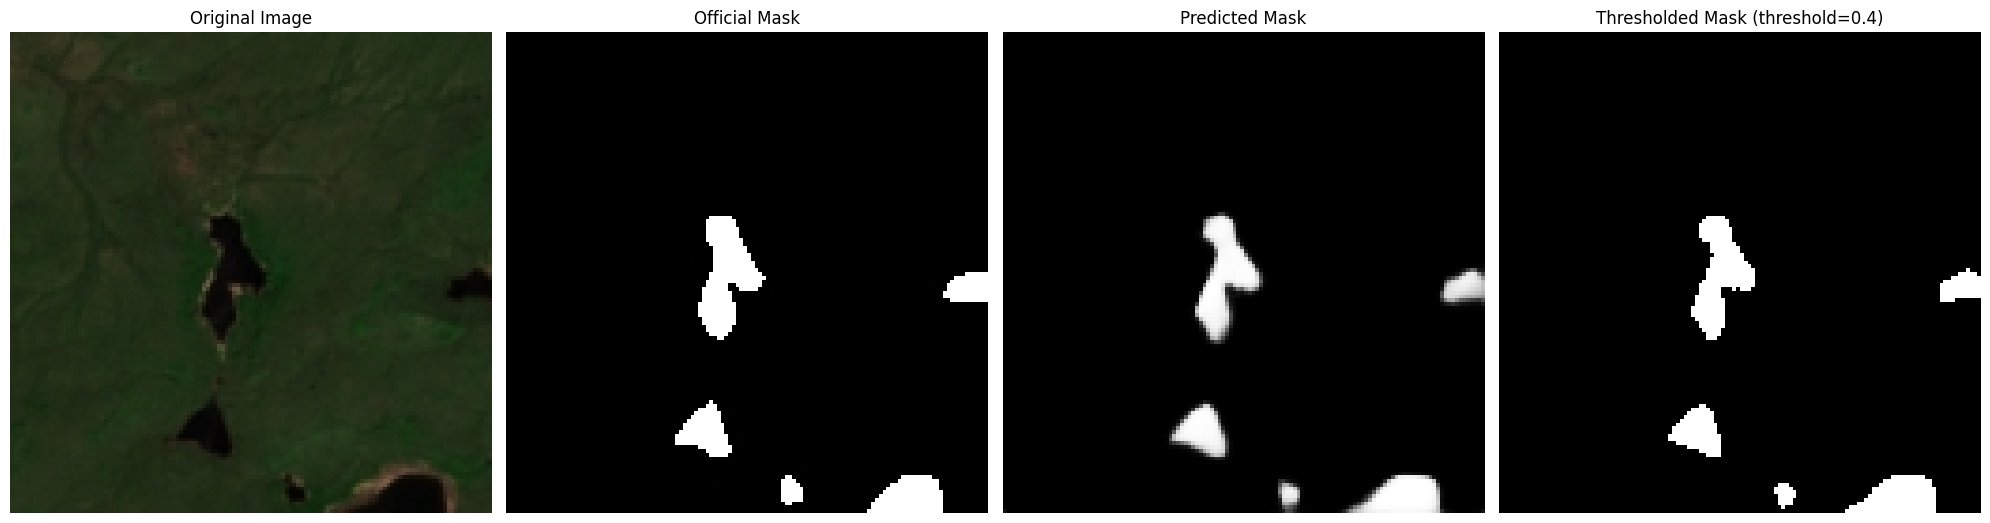

284_3712_384.jpg


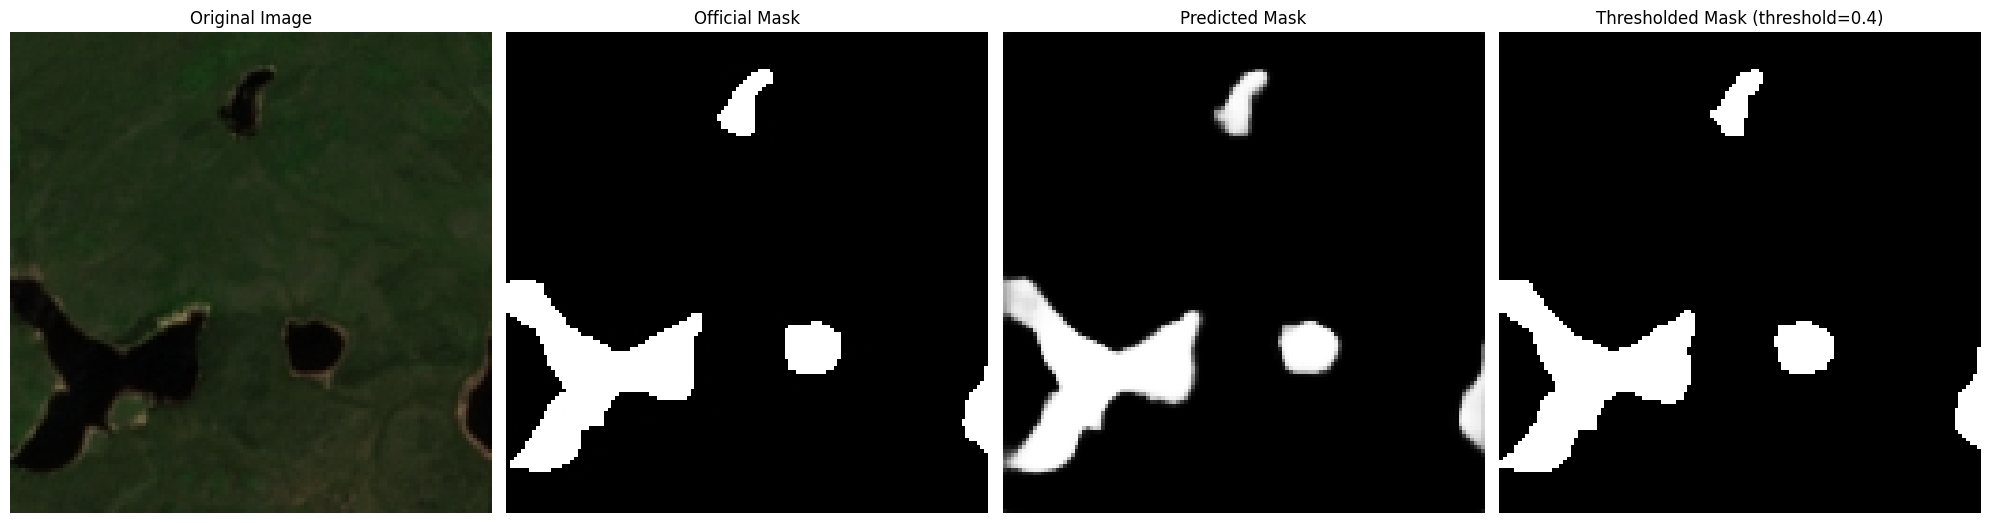

285_3840_384.jpg


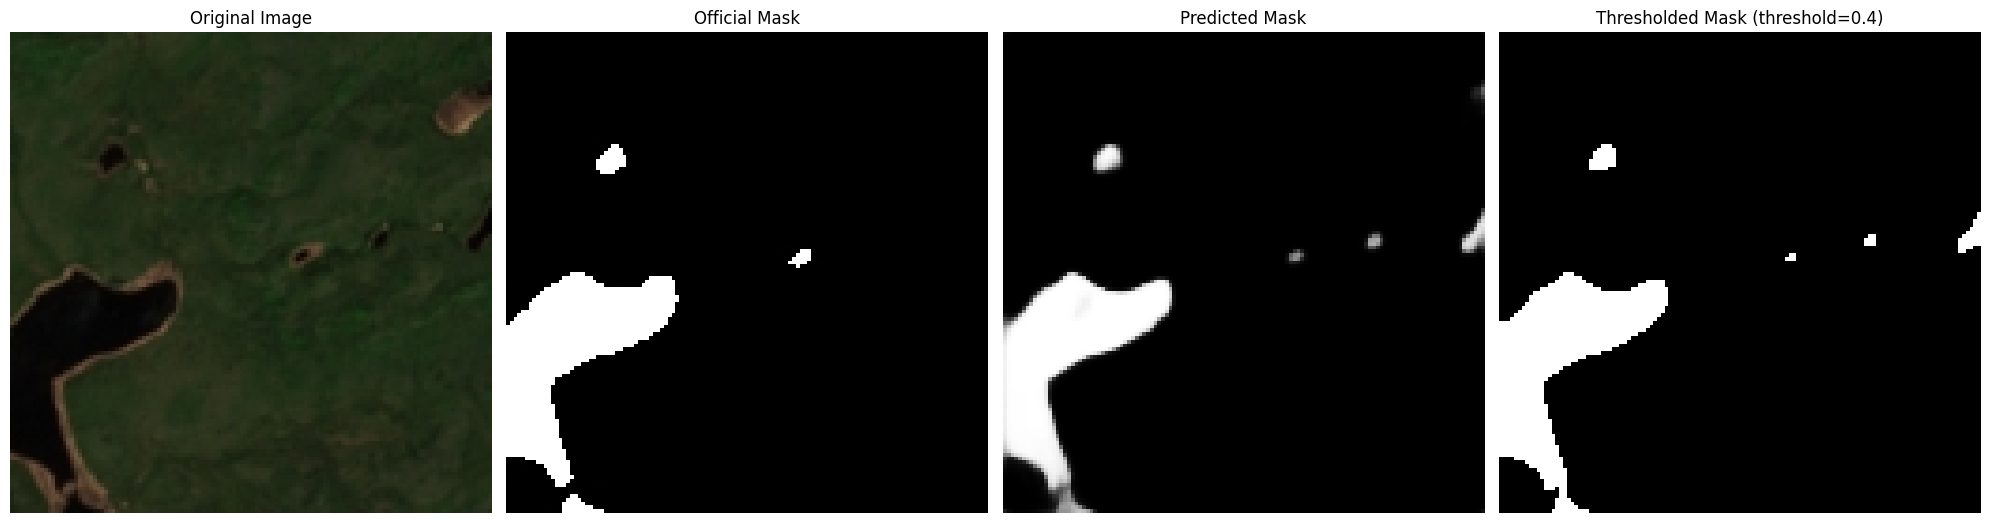

28_3584_0.jpg


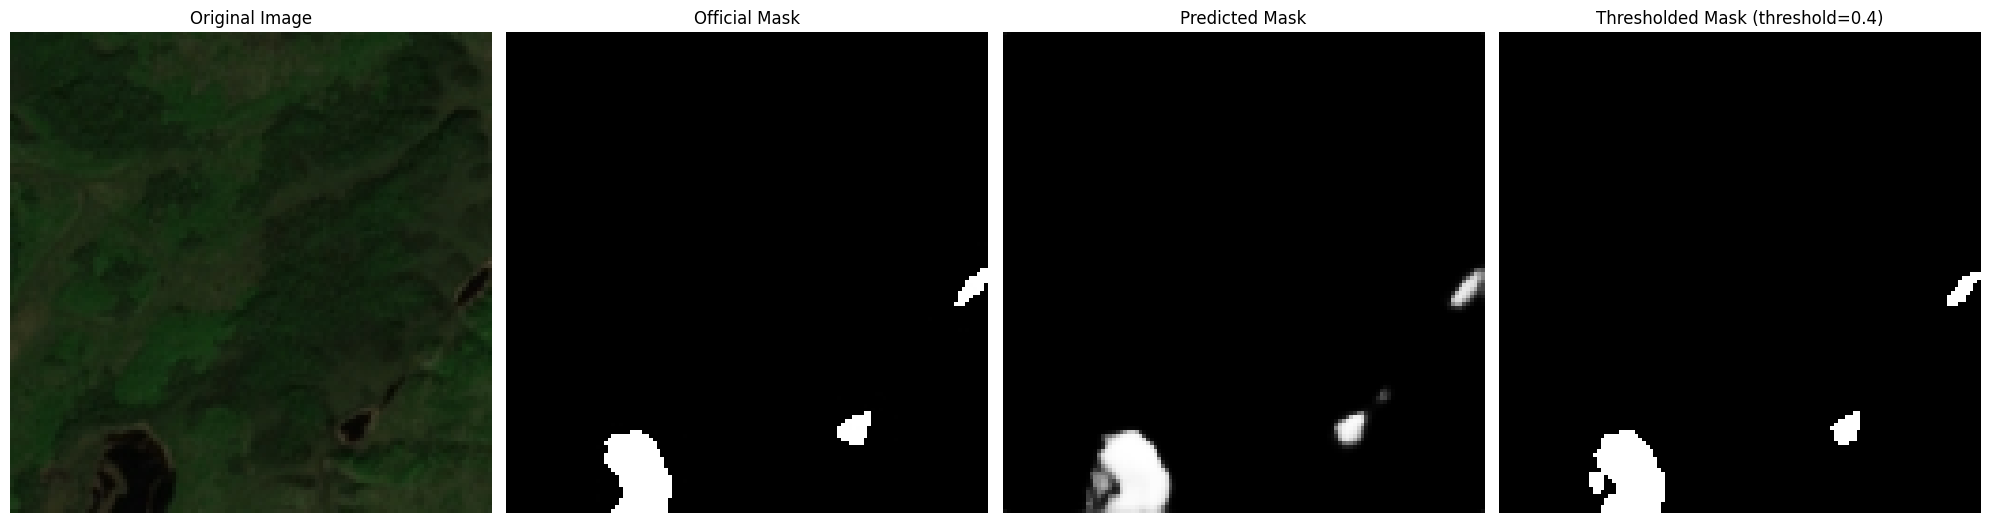

2_256_0.jpg


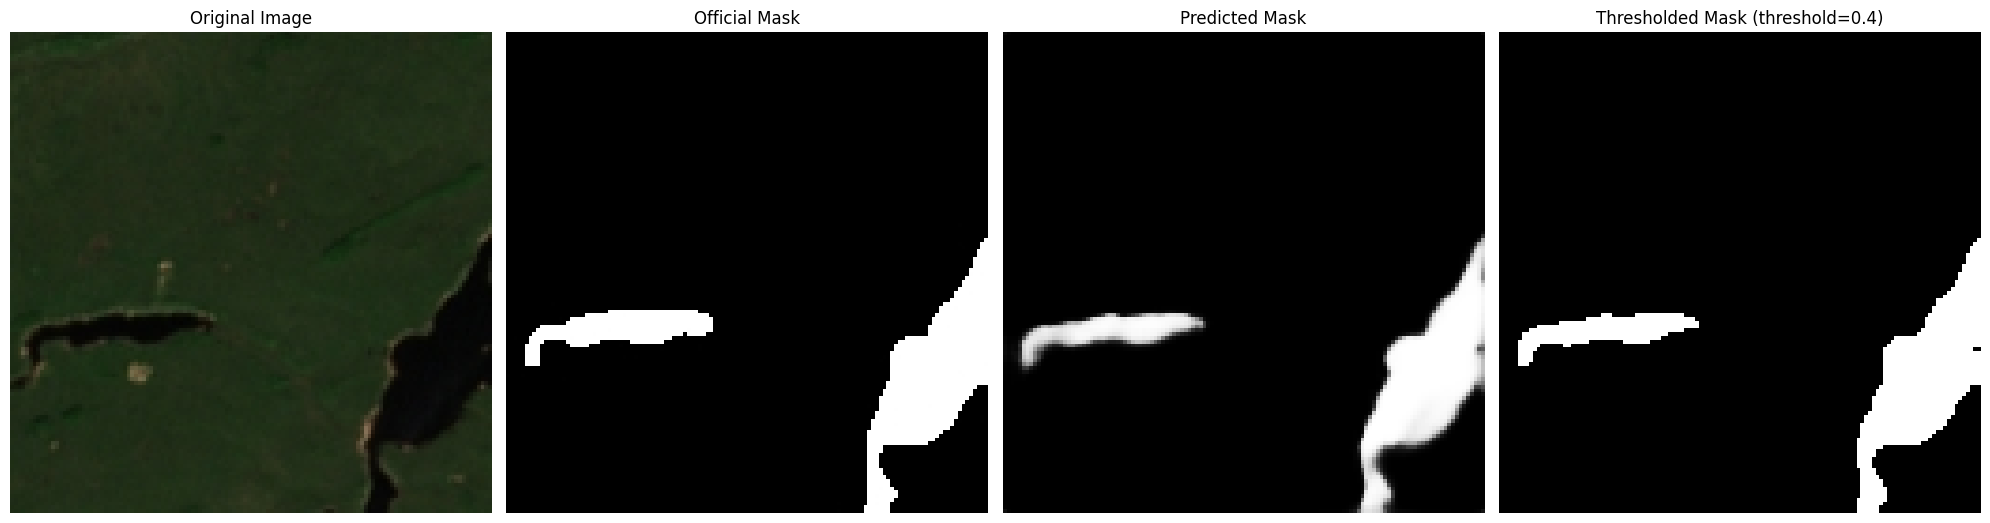

336_10368_384.jpg


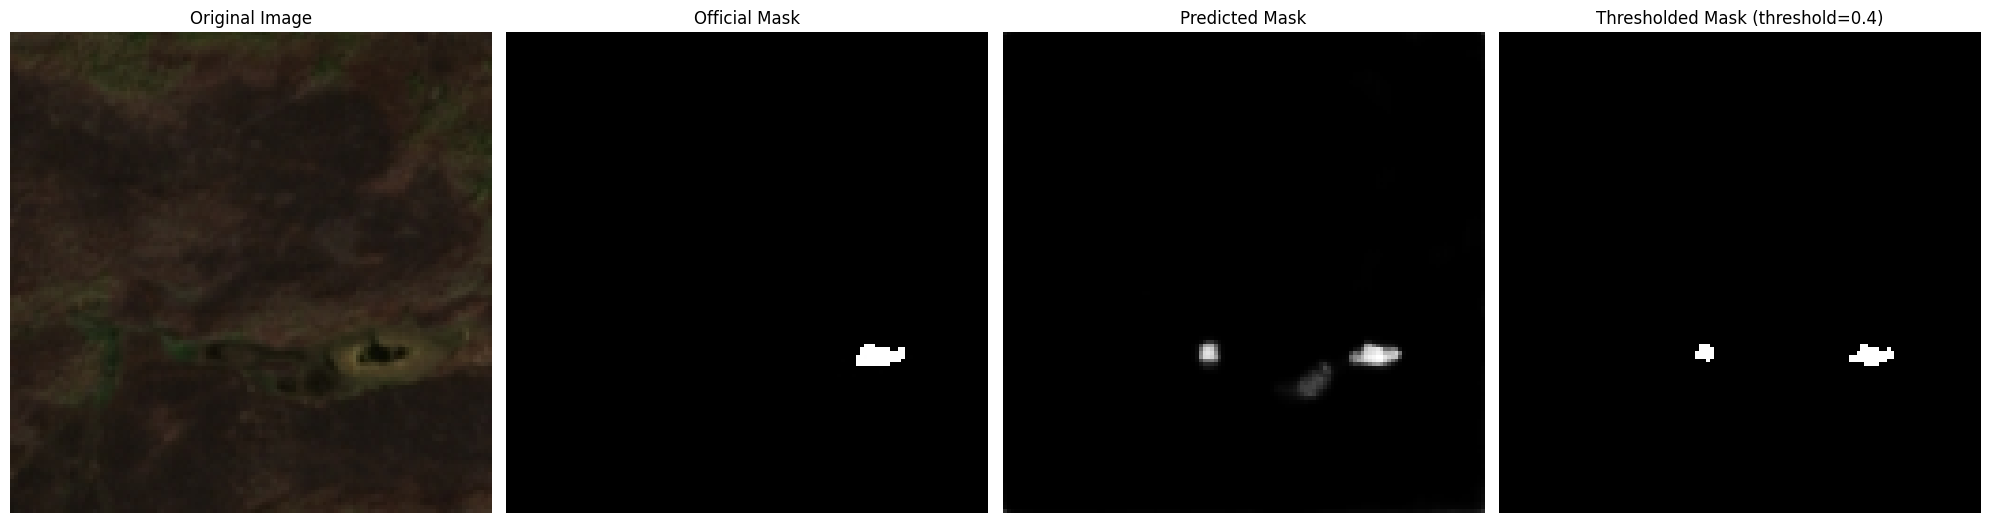

343_384_512.jpg


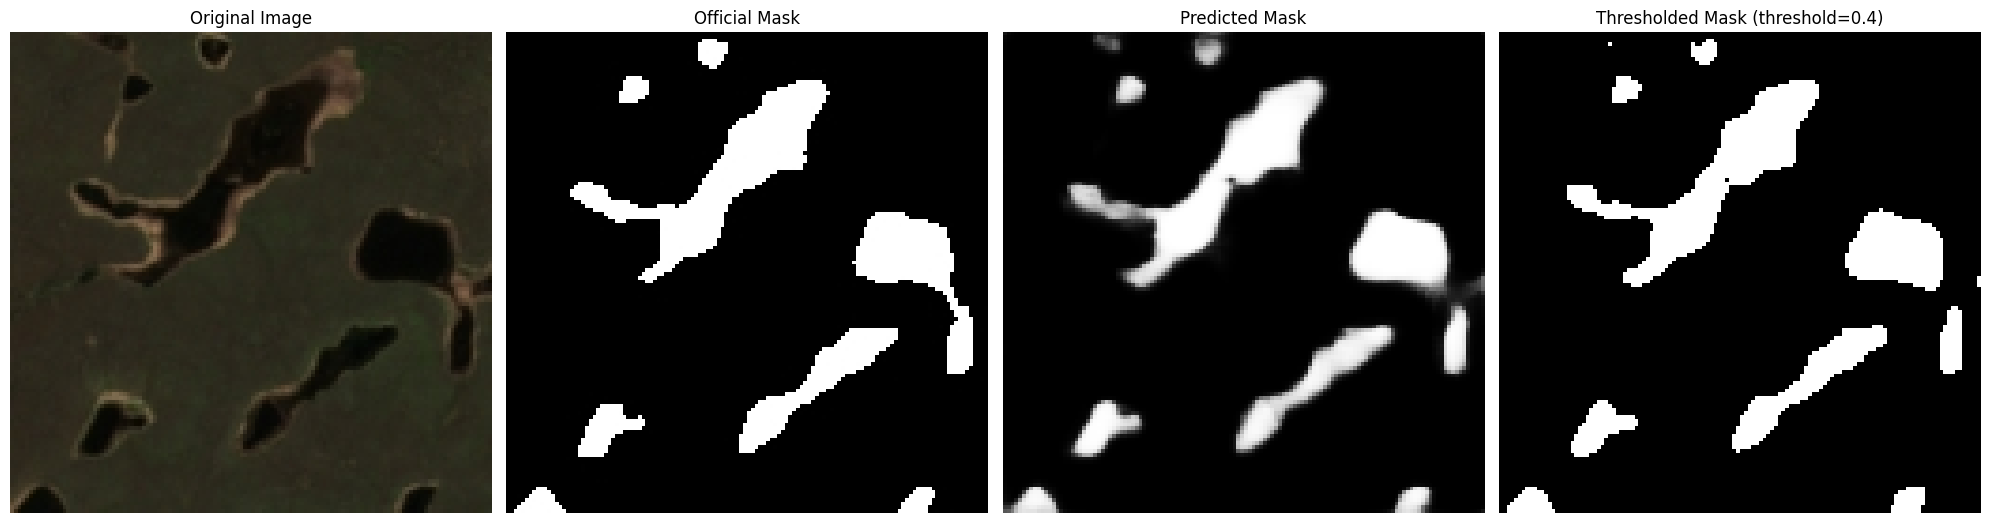

344_512_512.jpg


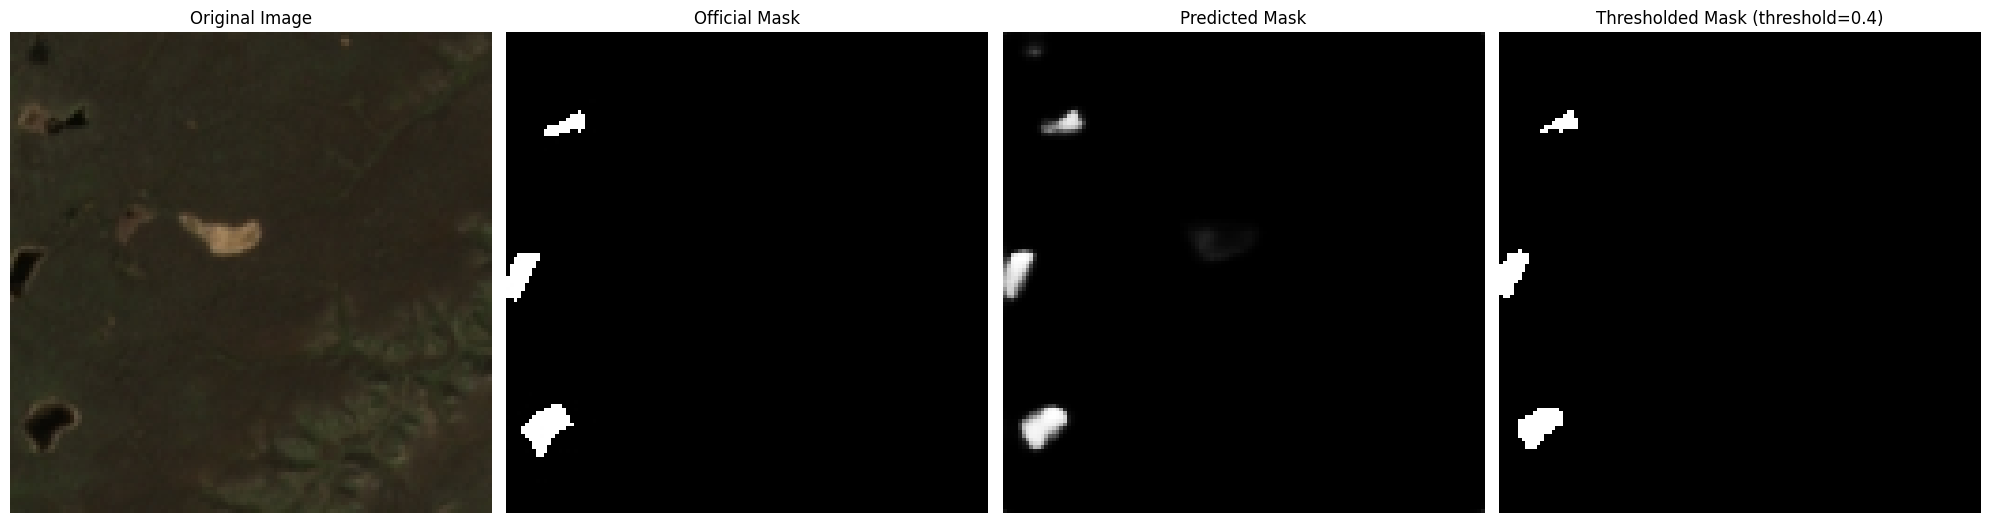

347_896_512.jpg


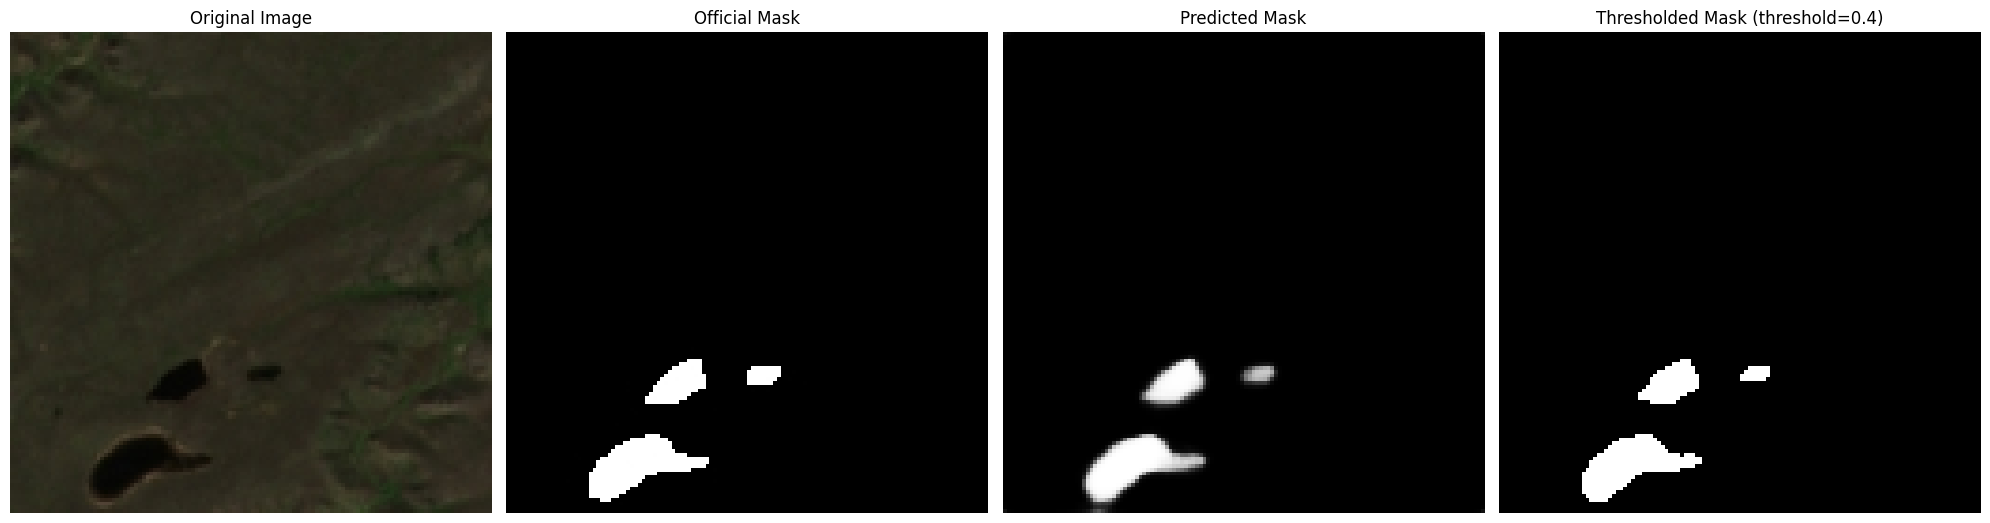

351_1408_512.jpg


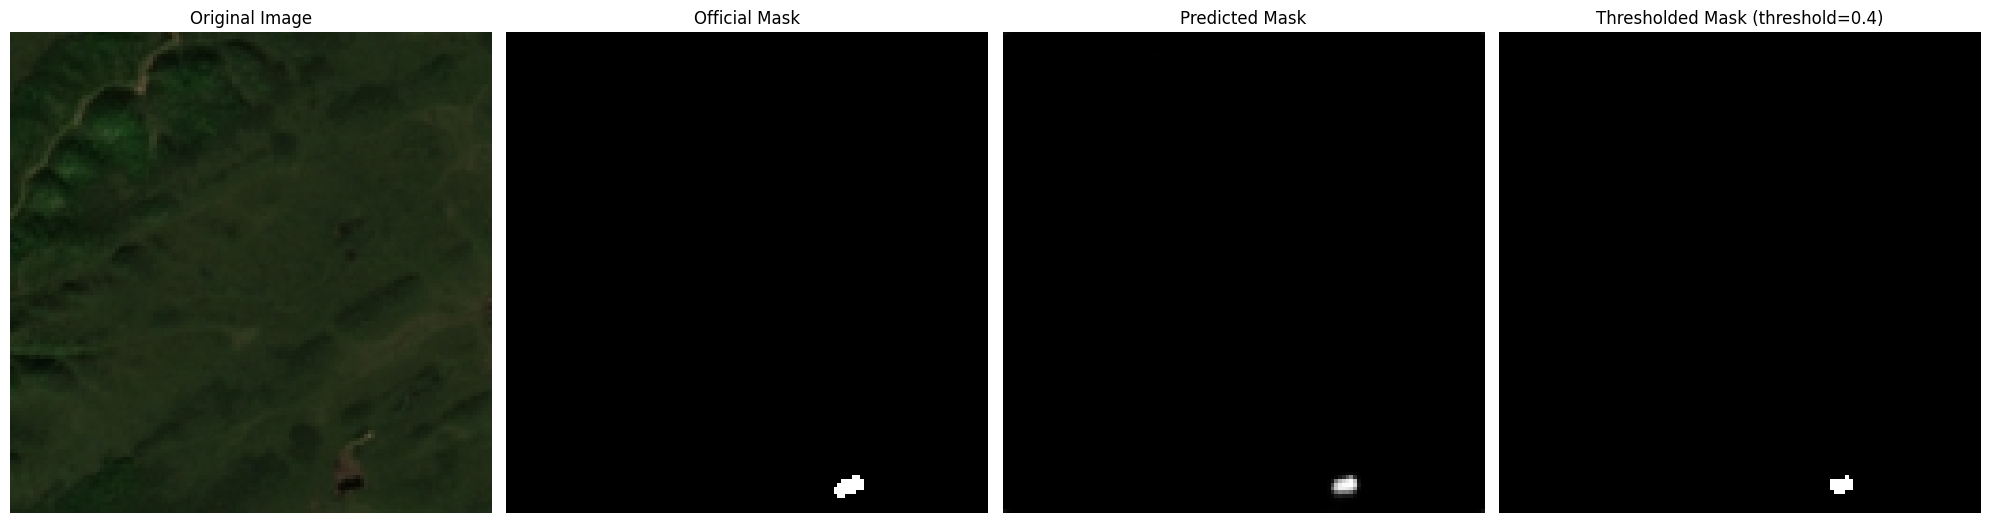

35_4480_0.jpg


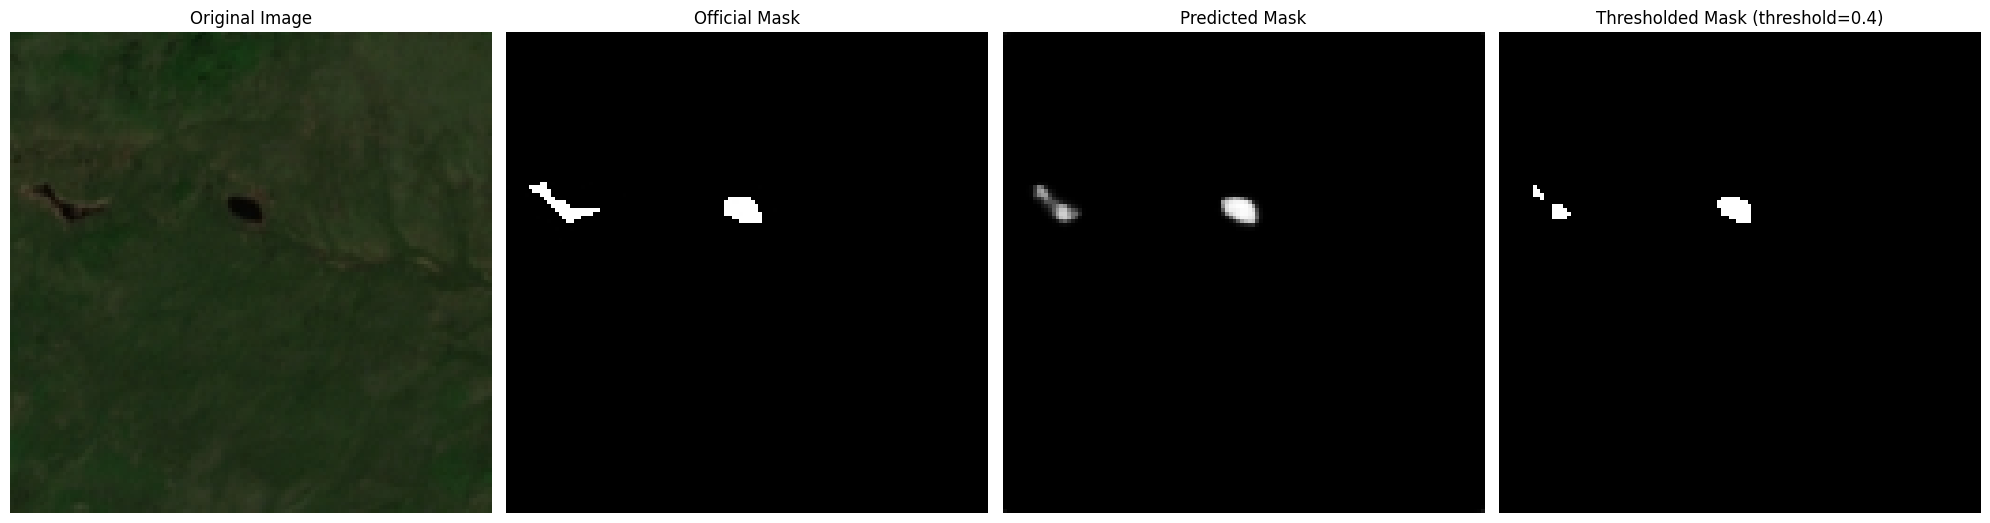

363_2944_512.jpg


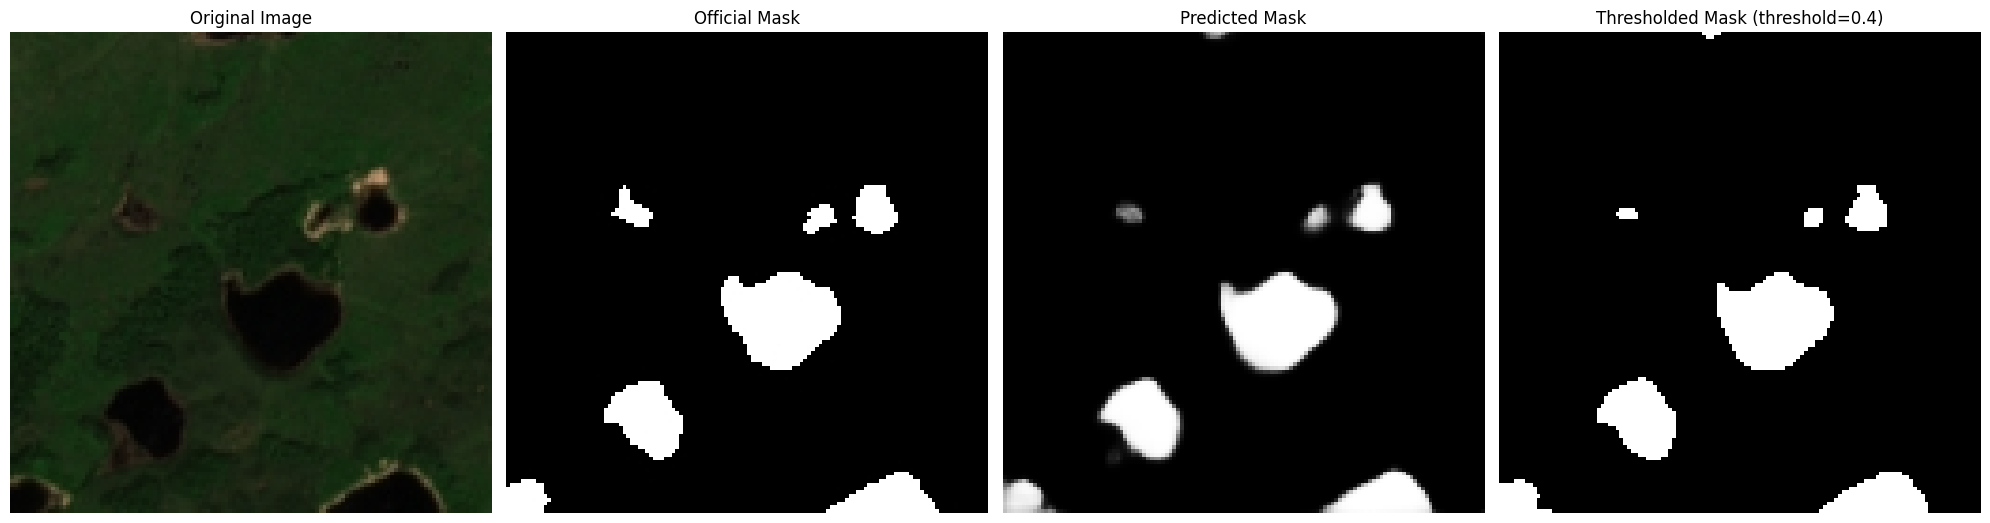

364_3072_512.jpg


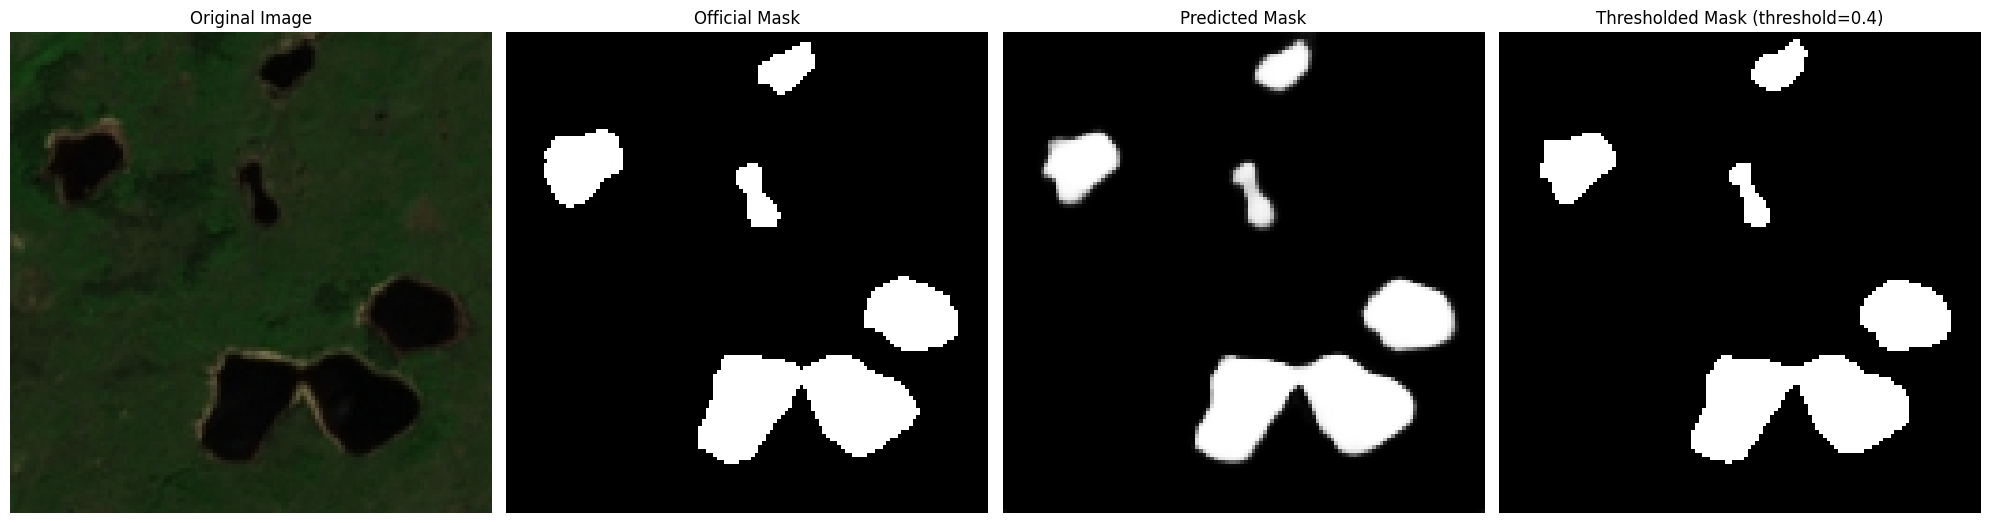

374_4352_512.jpg


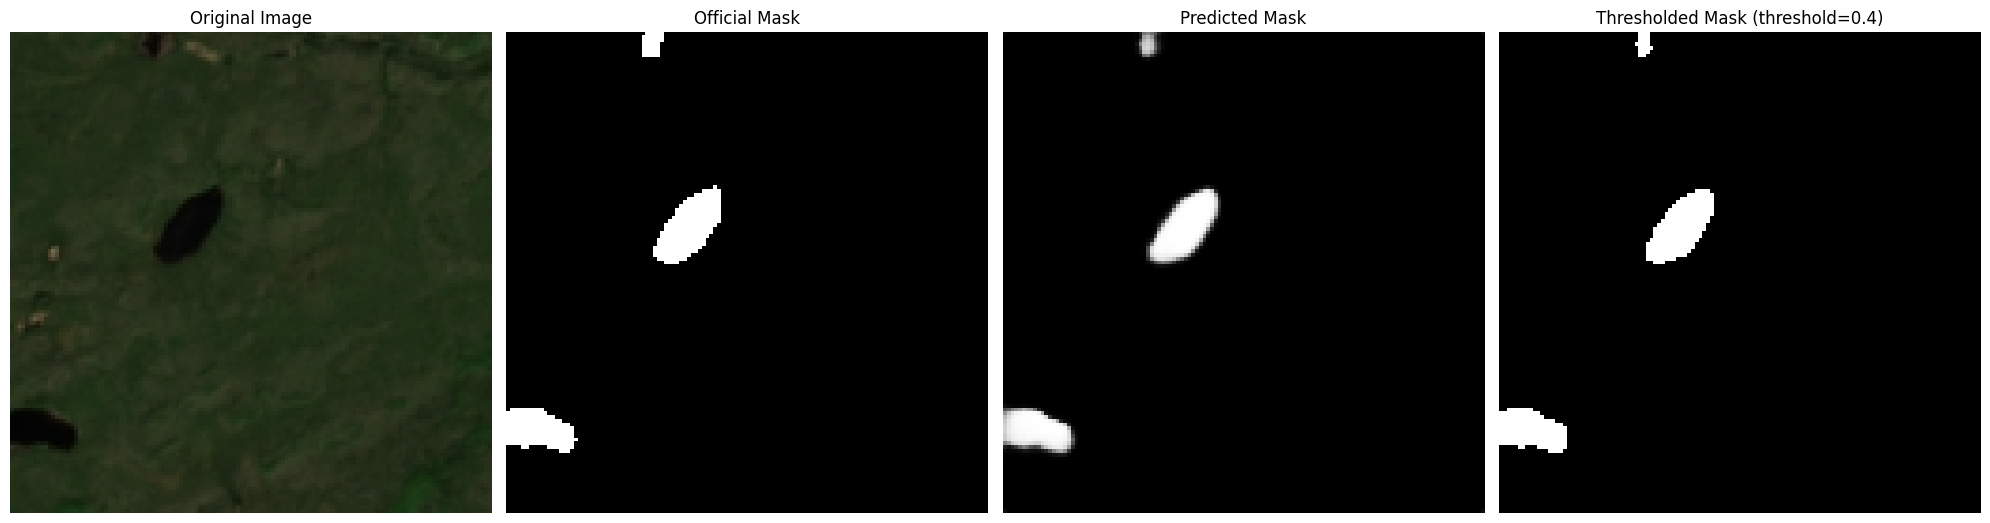

409_8832_512.jpg


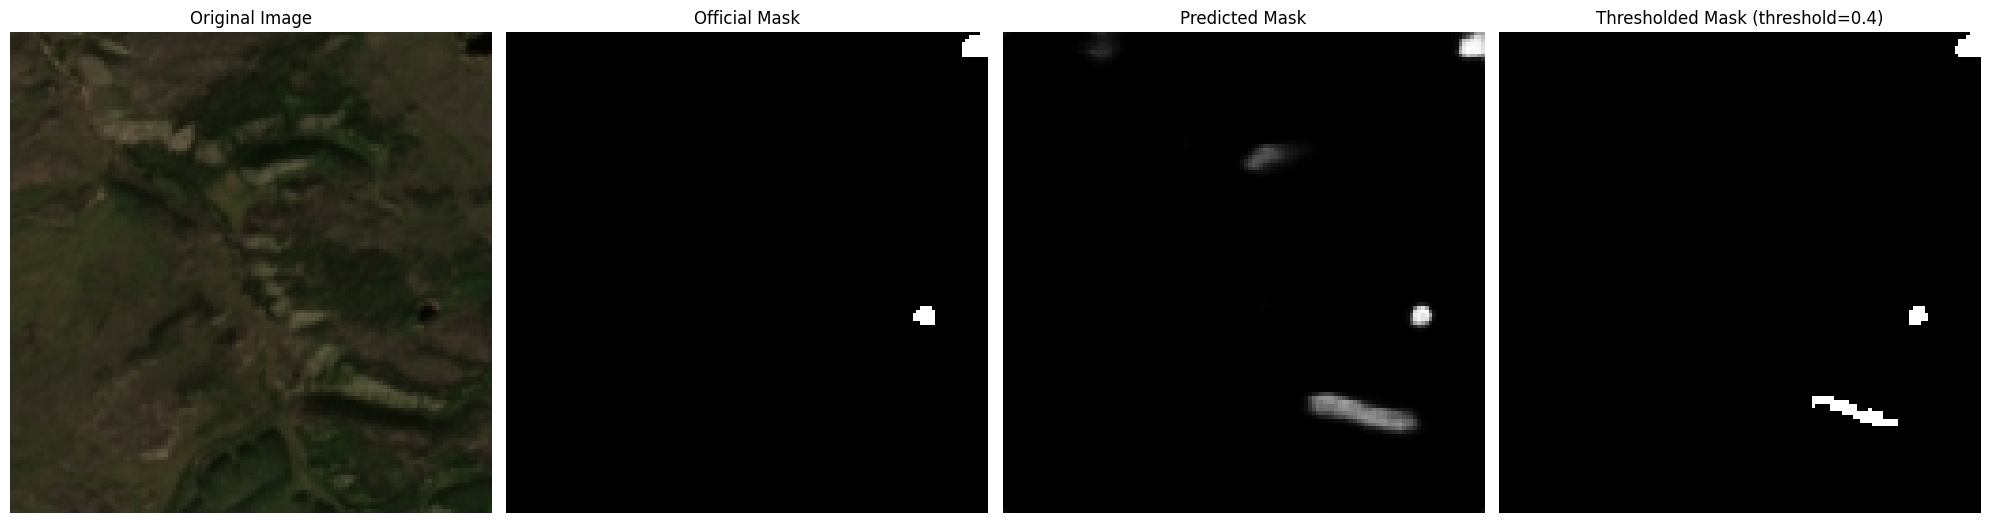

415_9600_512.jpg


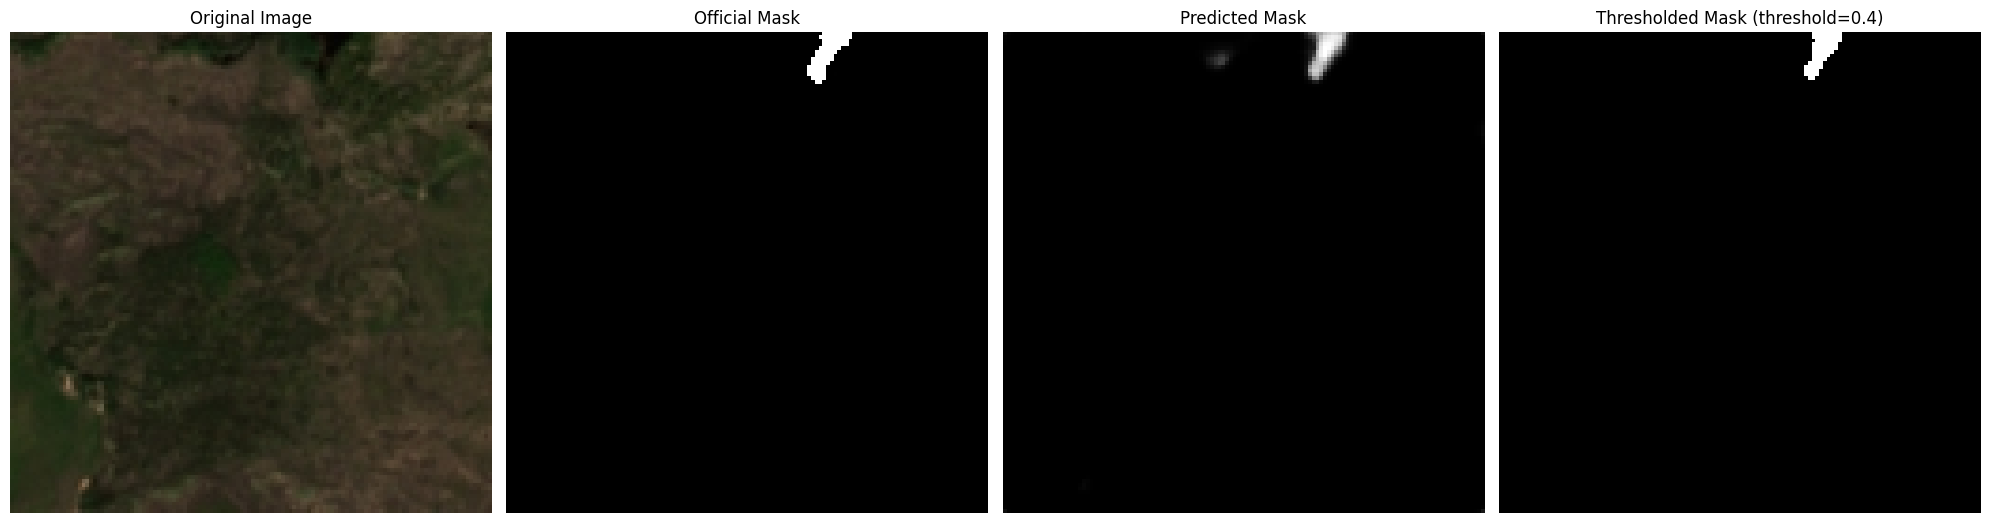

430_640_640.jpg


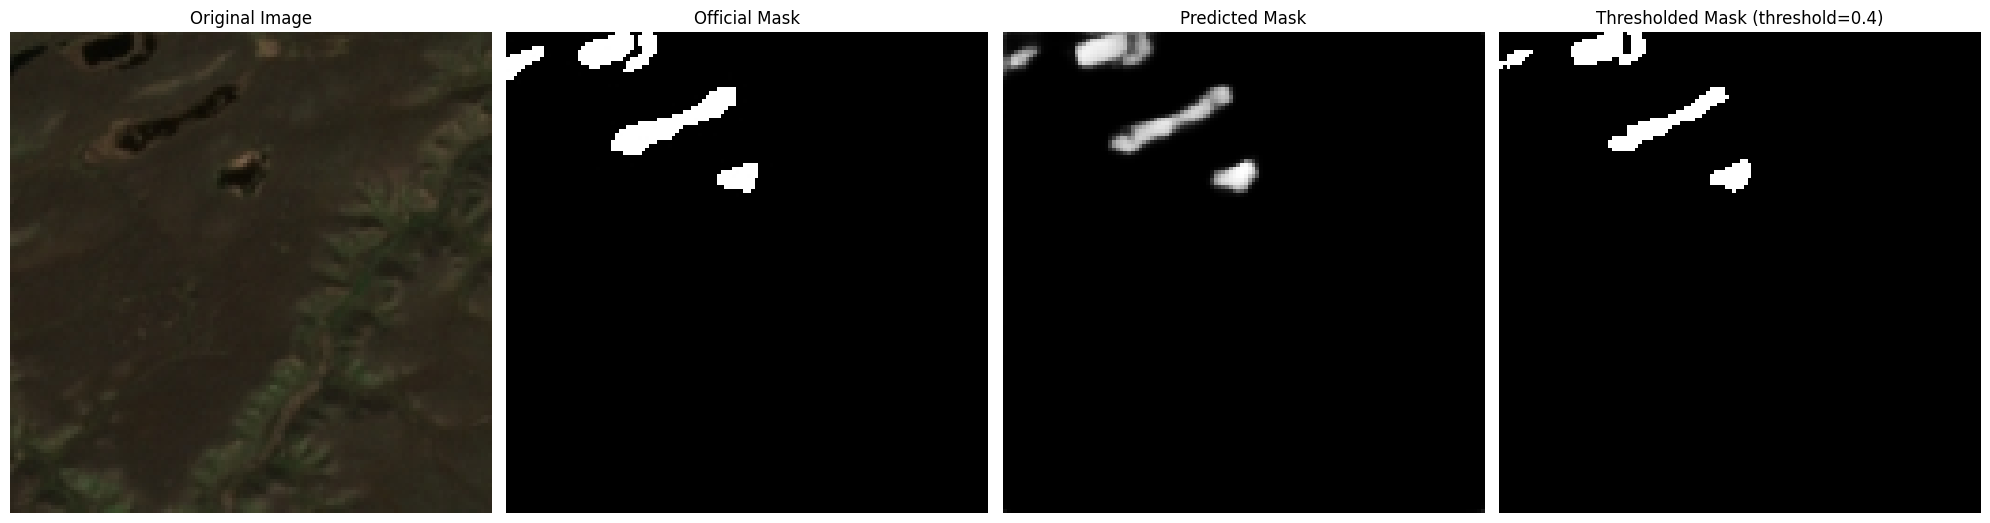

46_5888_0.jpg


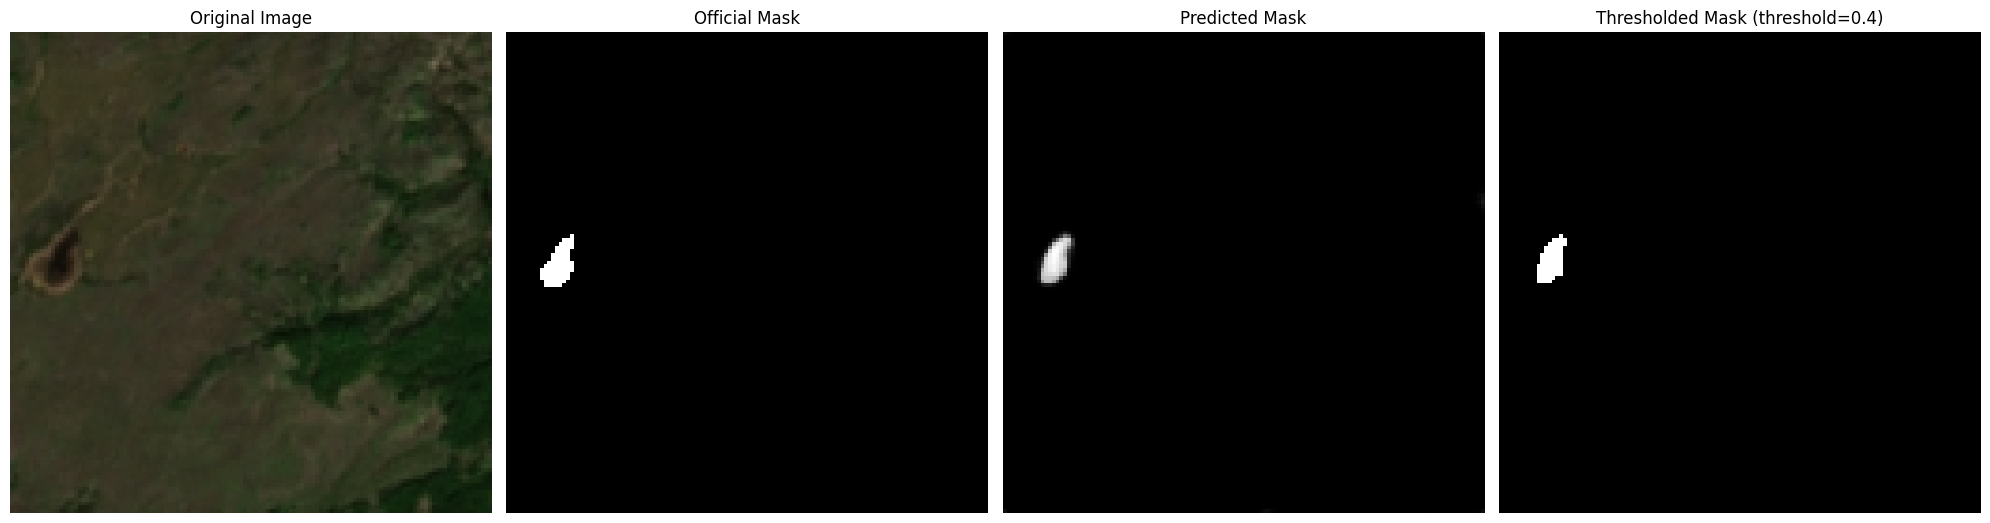

47_6016_0.jpg


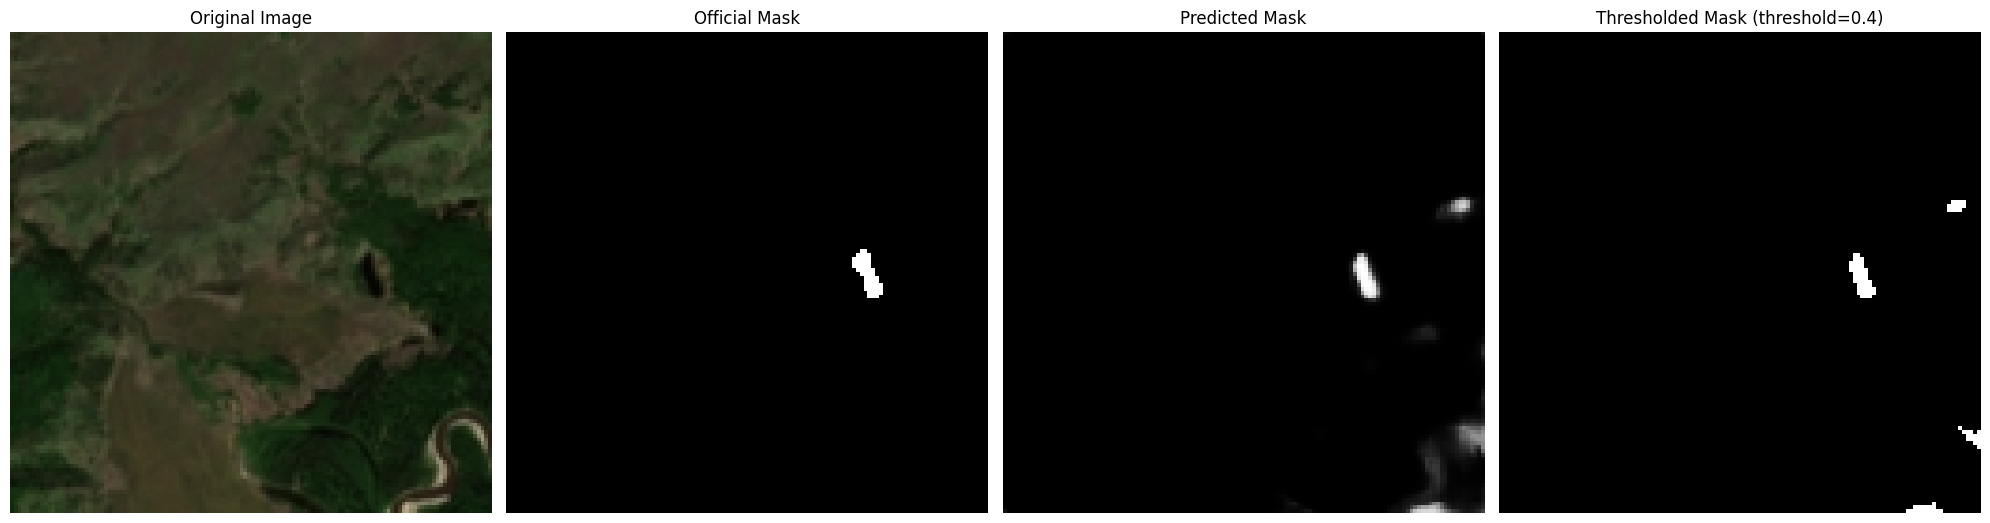

492_8576_640.jpg


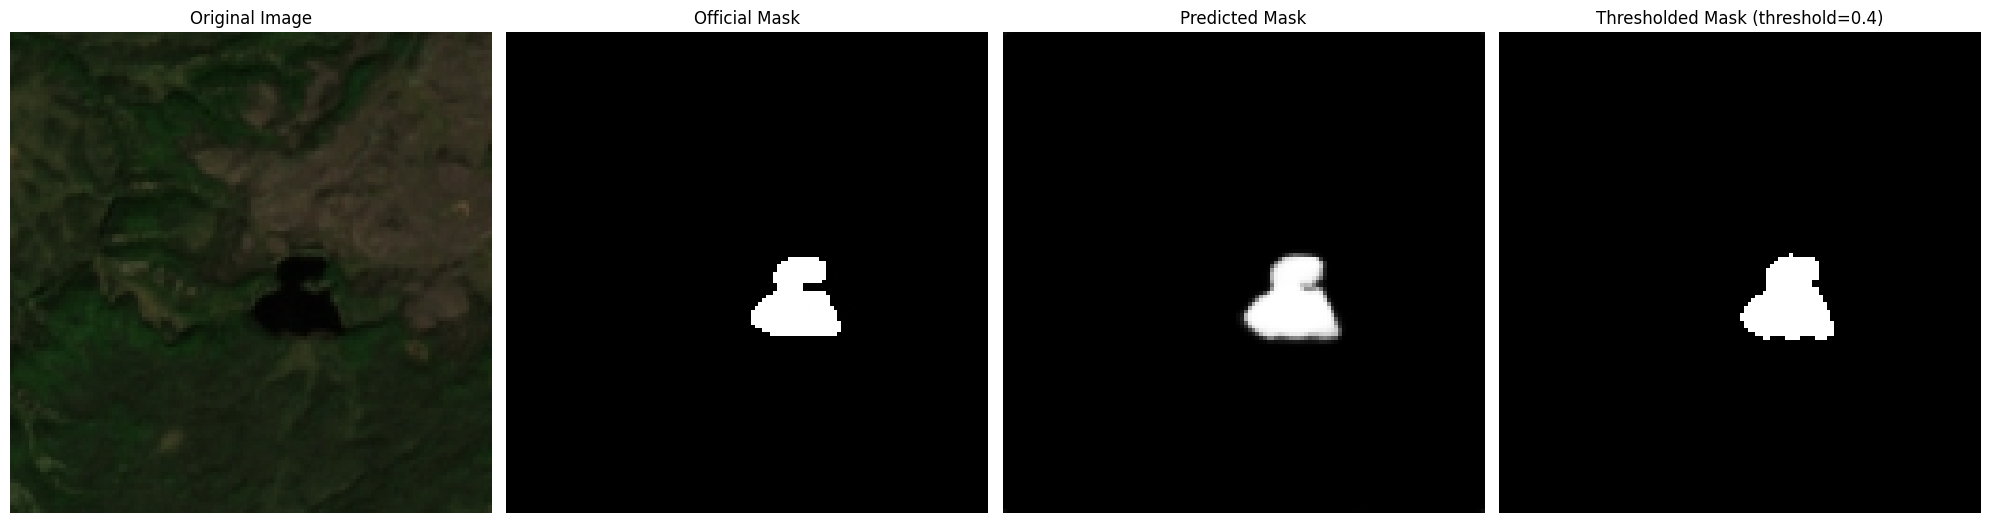

4_512_0.jpg


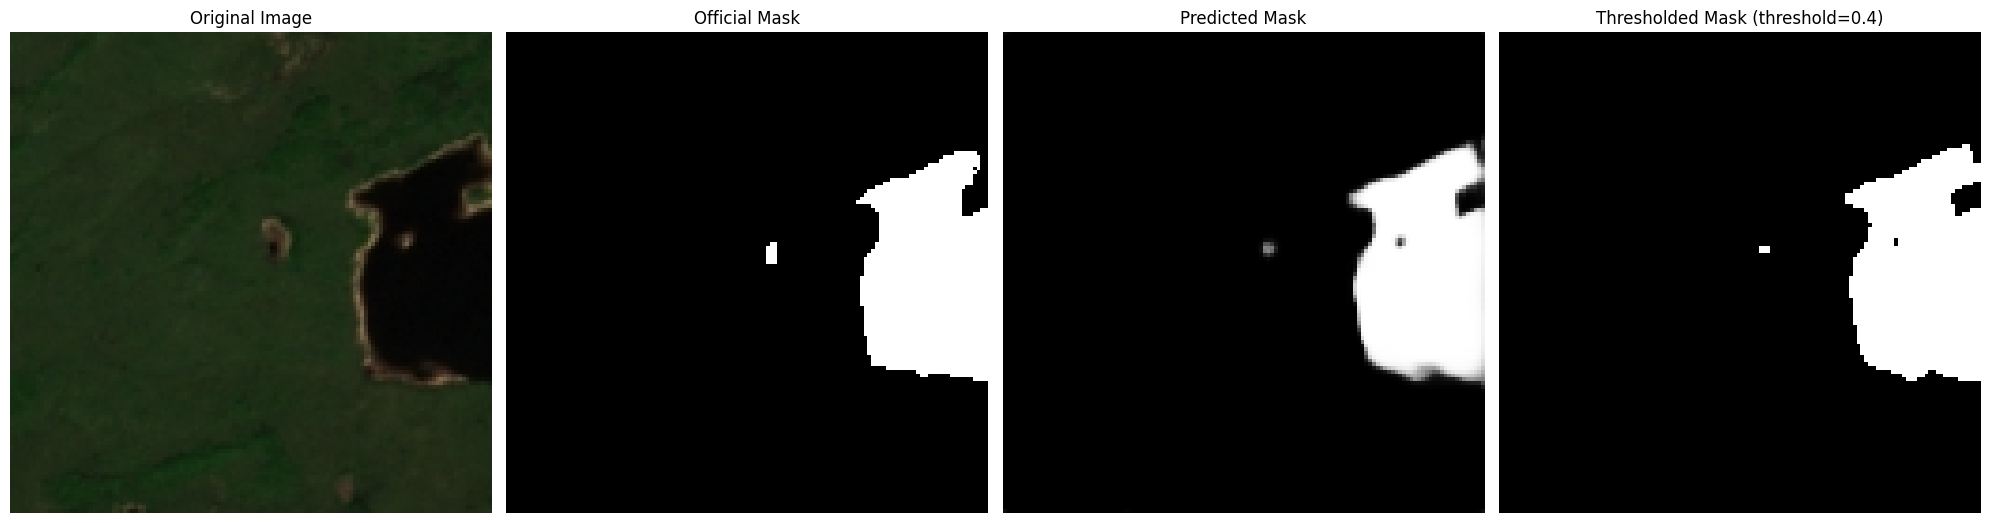

515_640_768.jpg


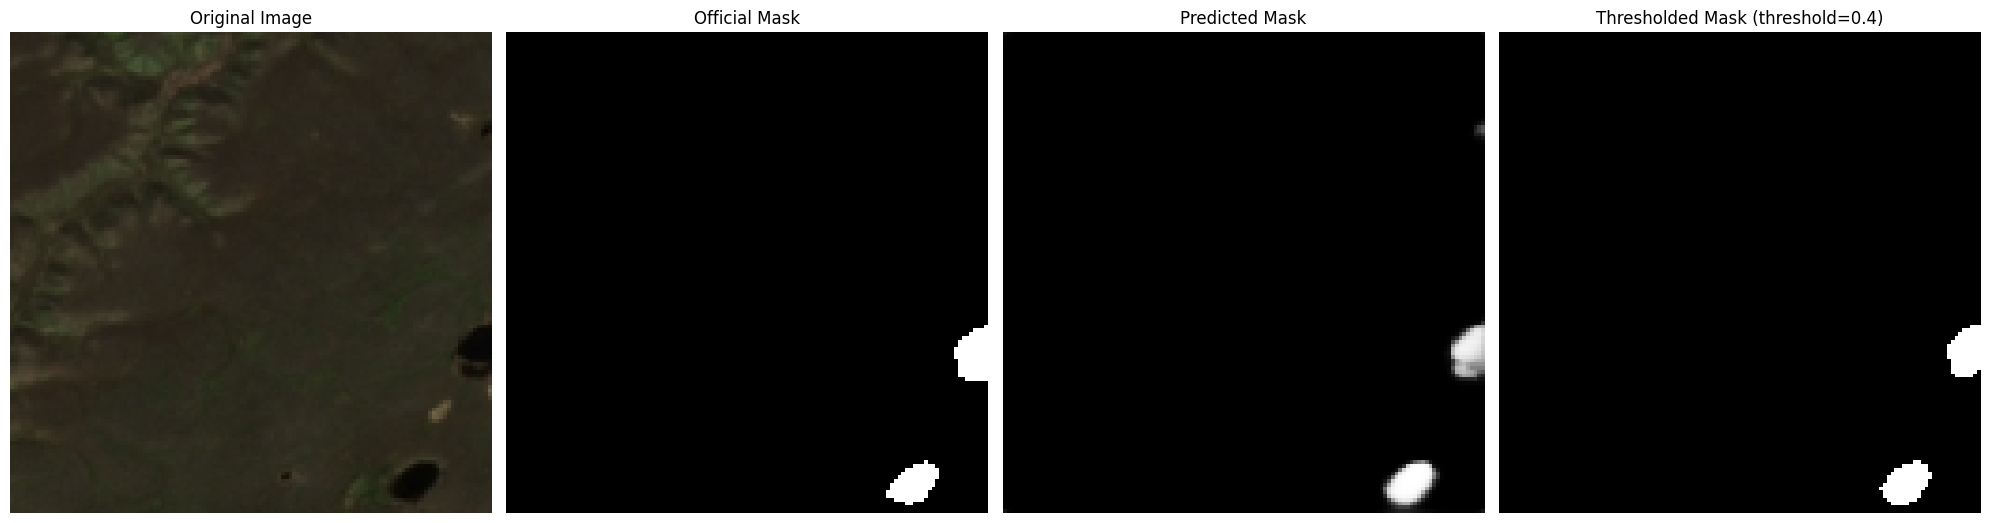

518_1024_768.jpg


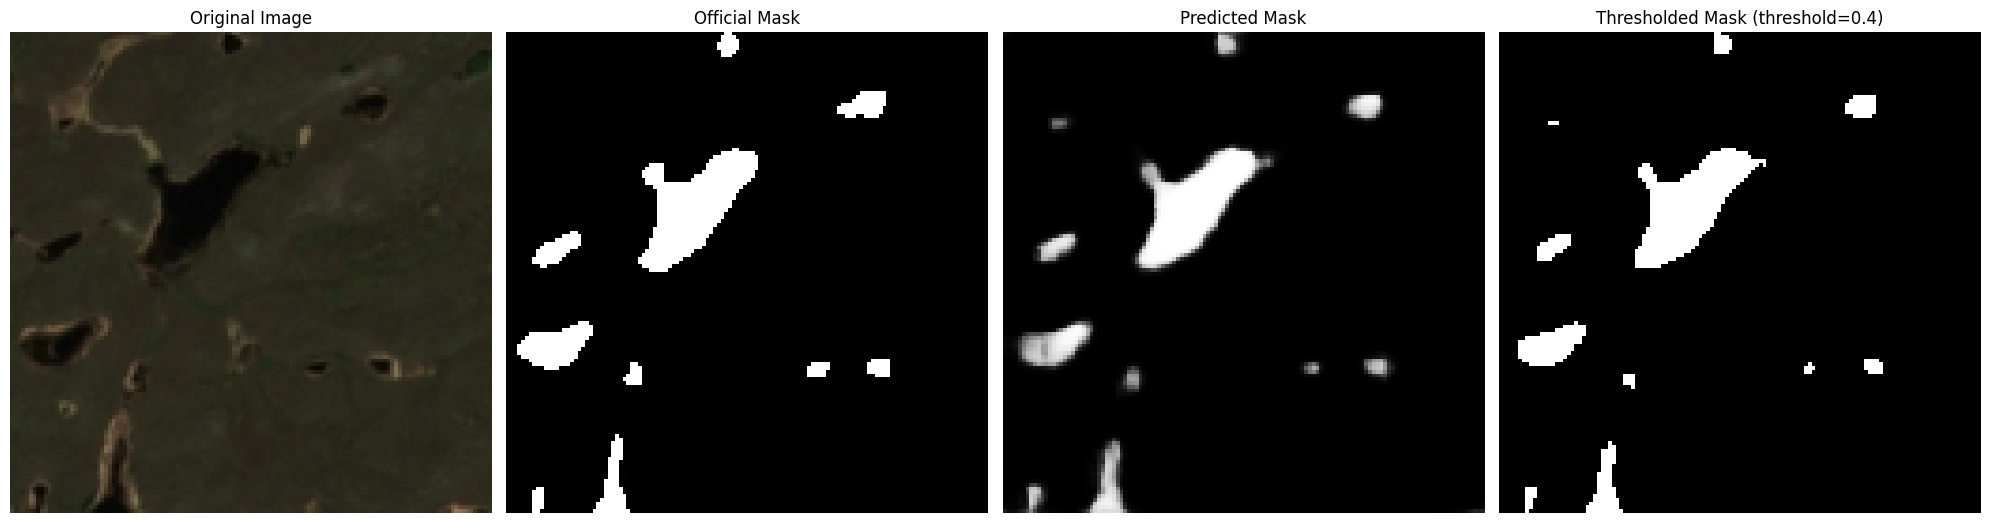

524_1792_768.jpg


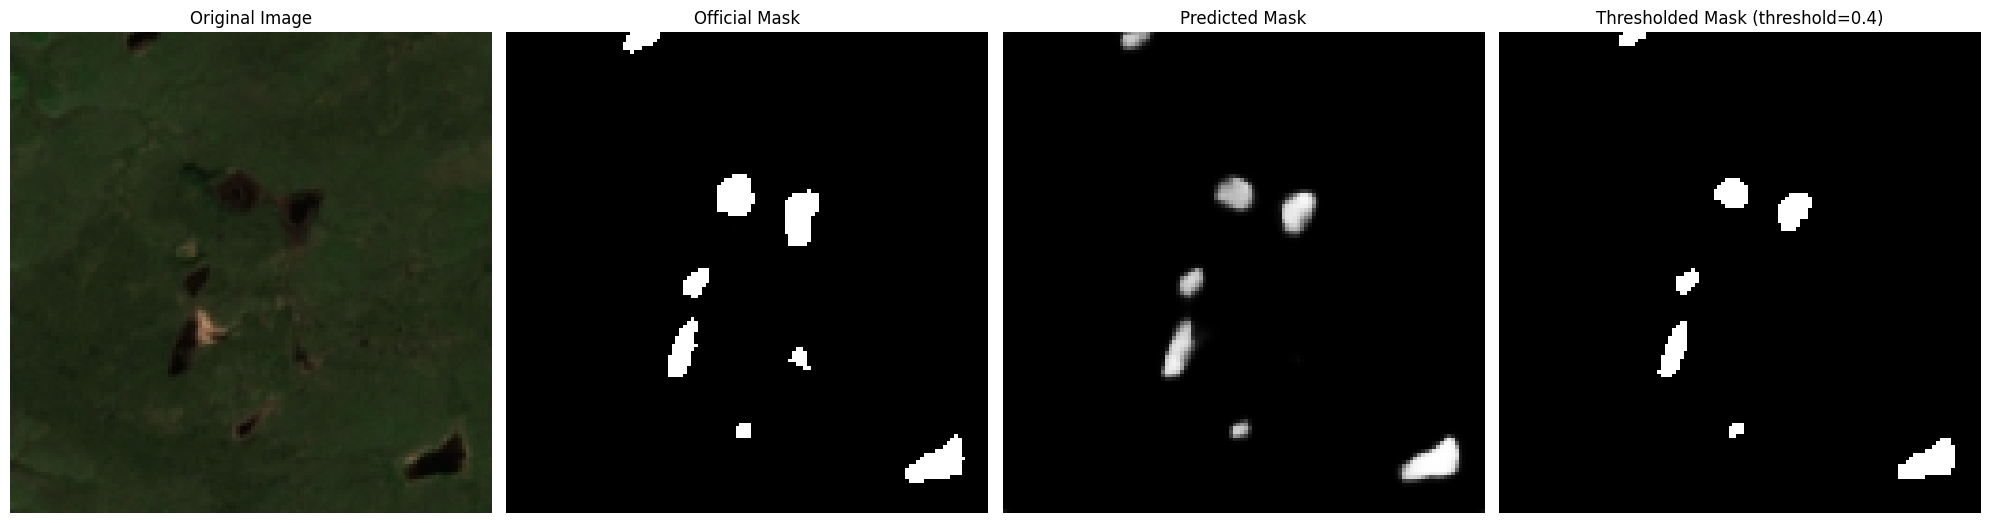

525_1920_768.jpg


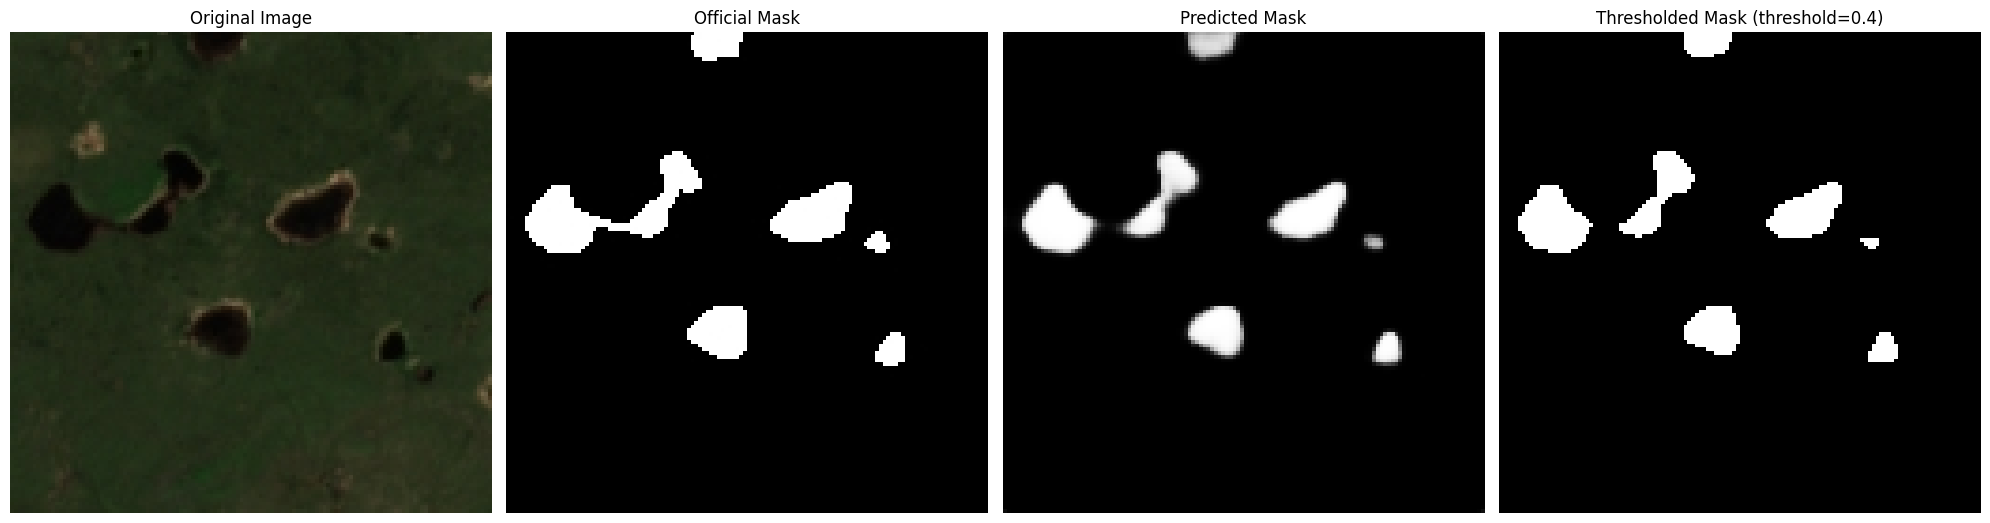

528_2304_768.jpg


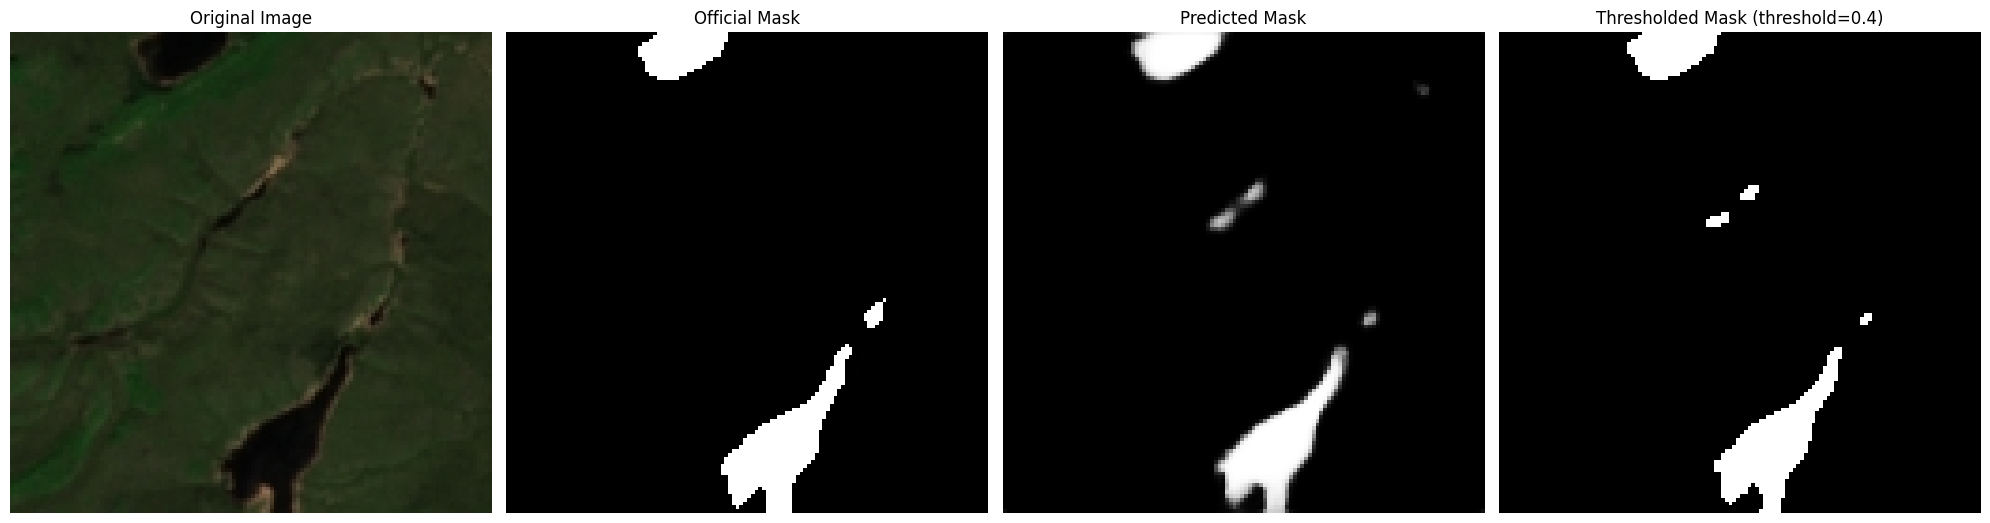

529_2432_768.jpg


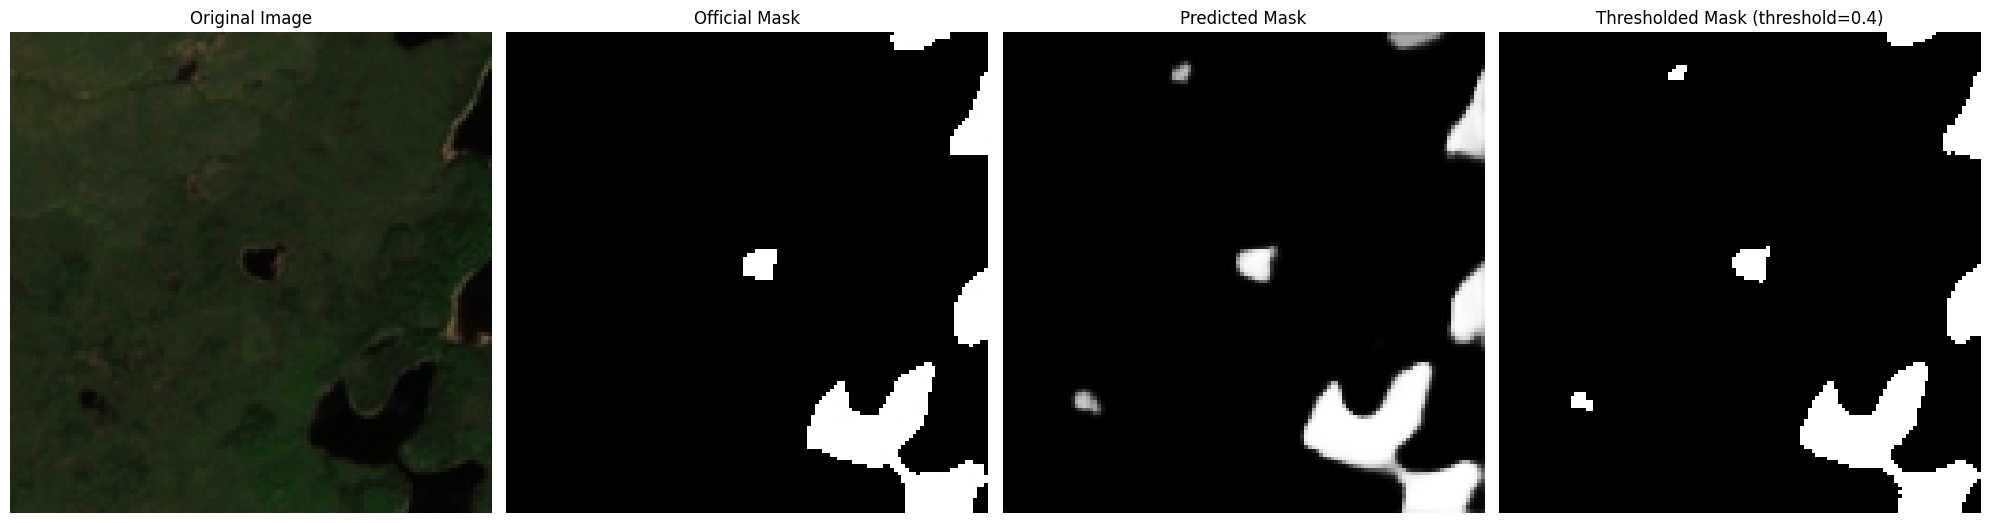

531_2688_768.jpg


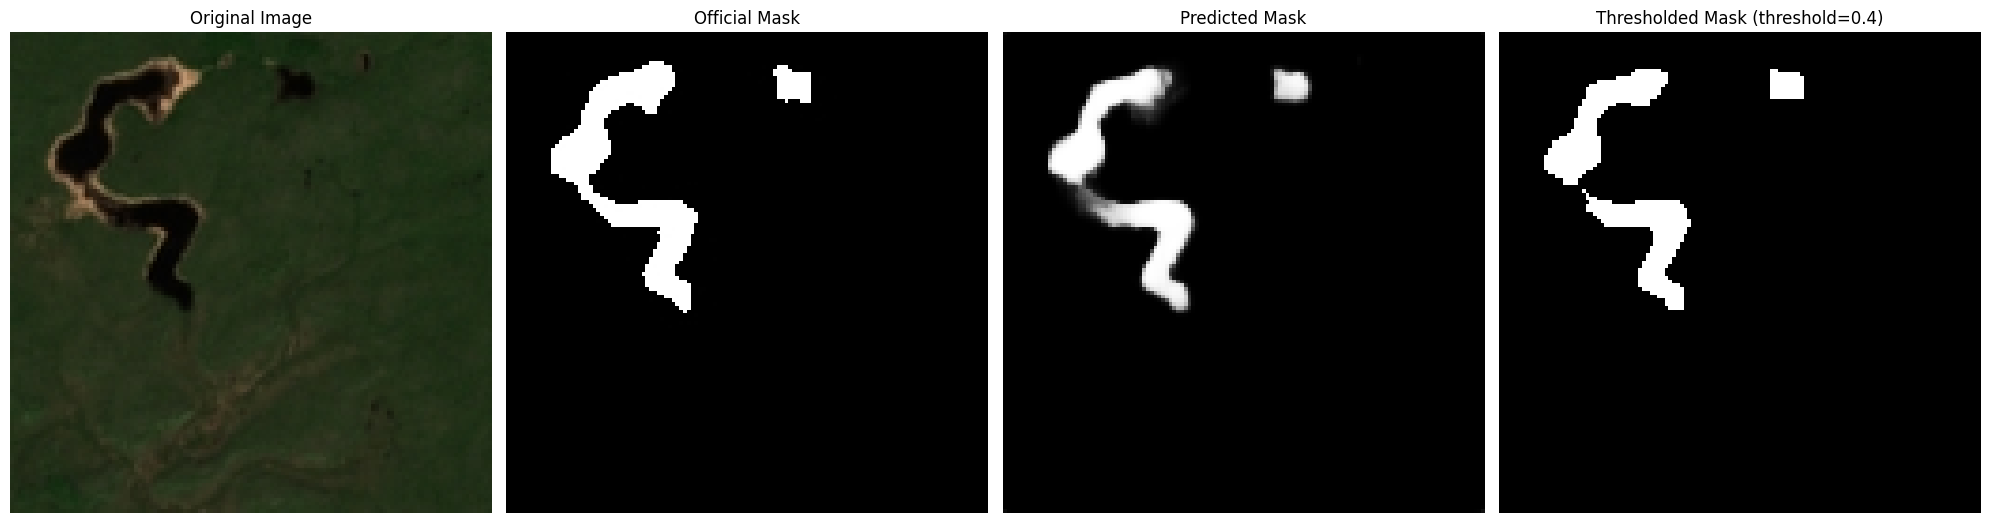

536_3328_768.jpg


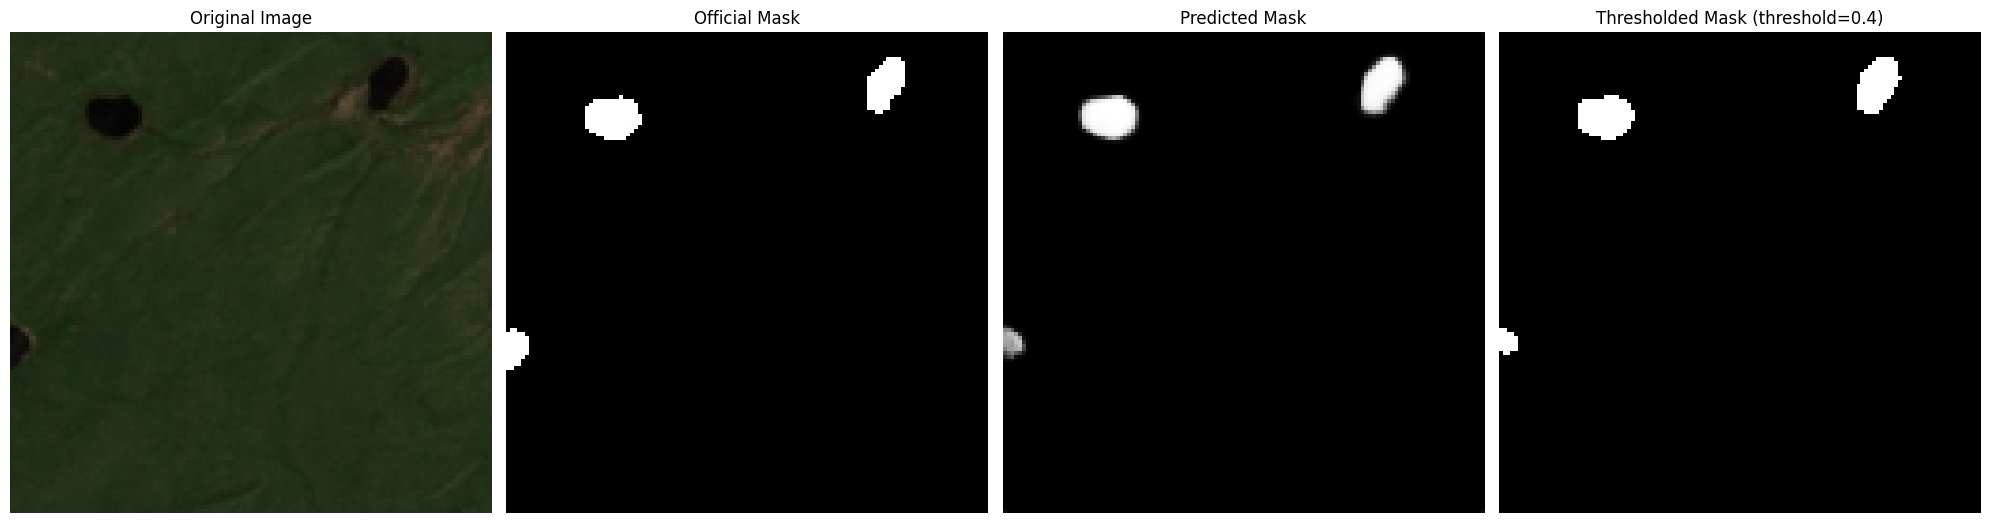

544_4352_768.jpg


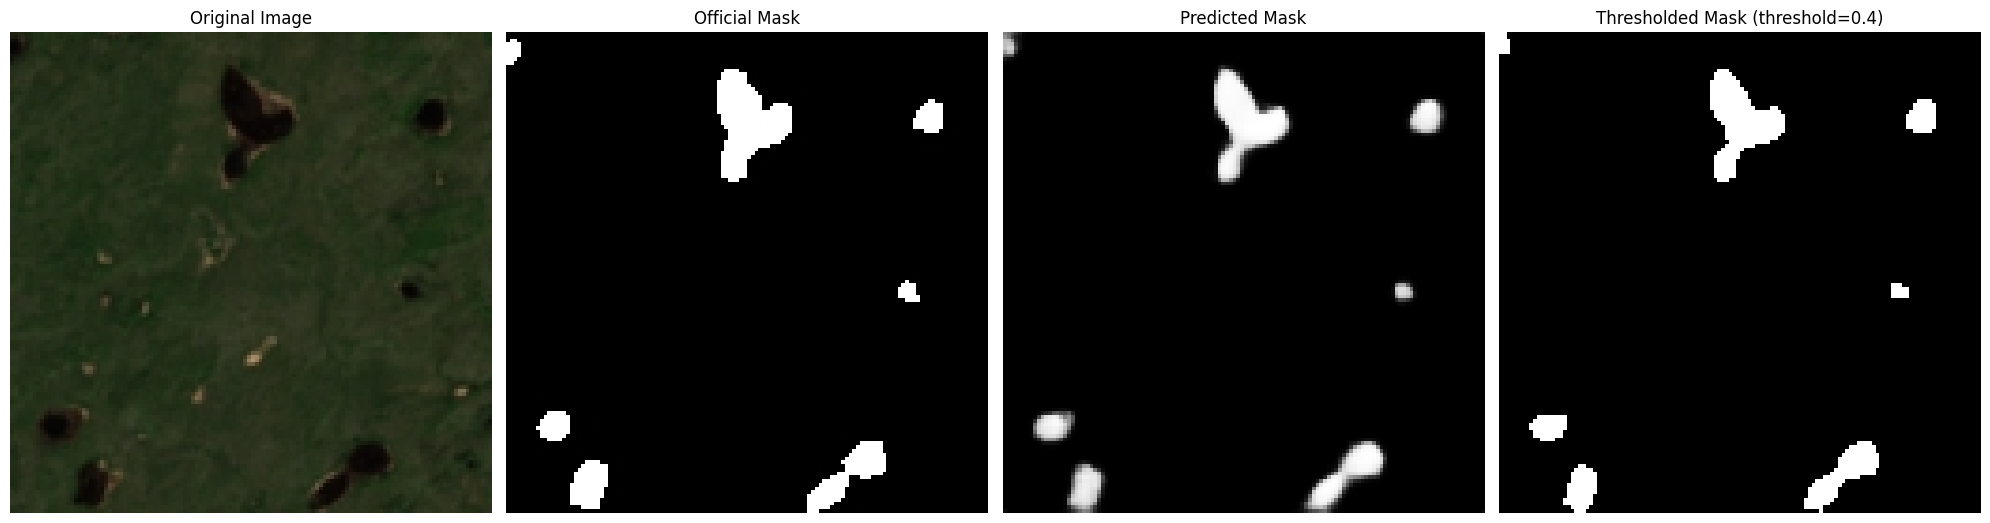

557_6016_768.jpg


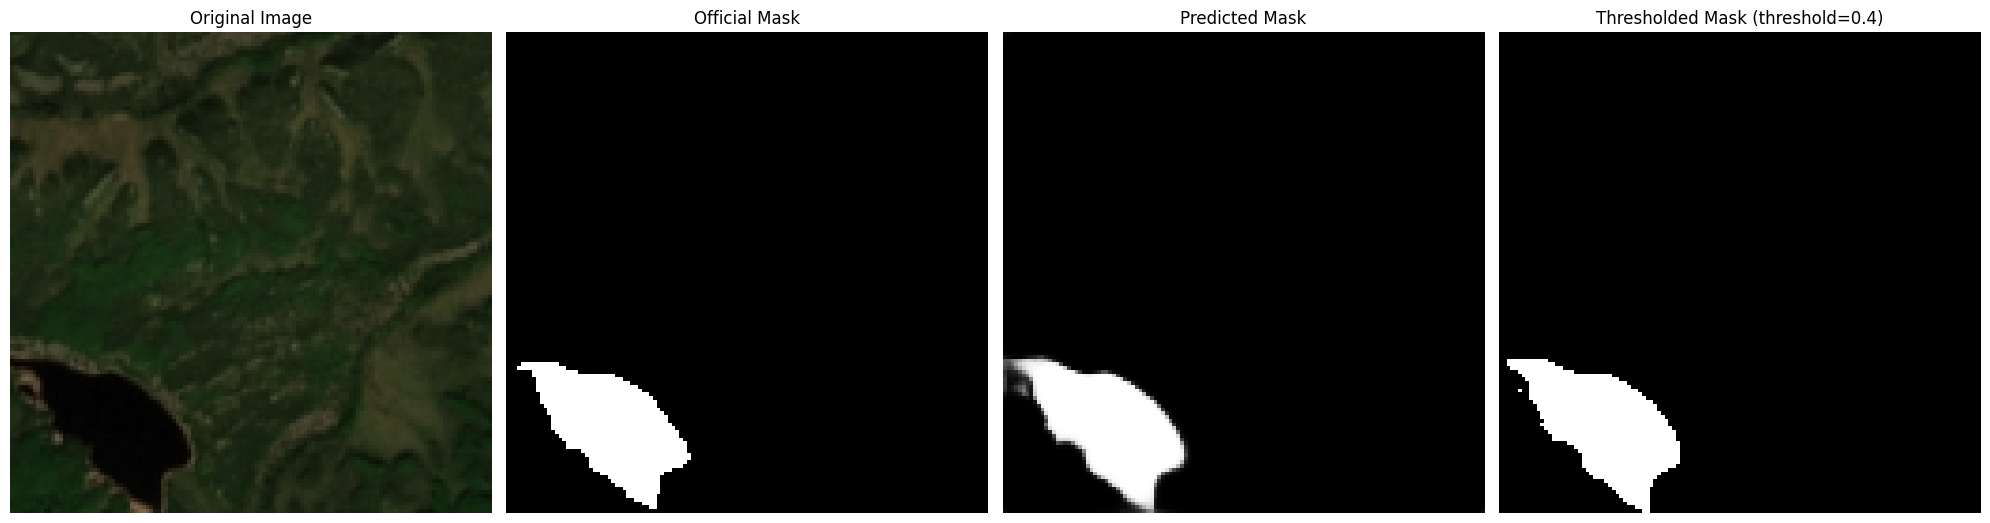

57_7296_0.jpg


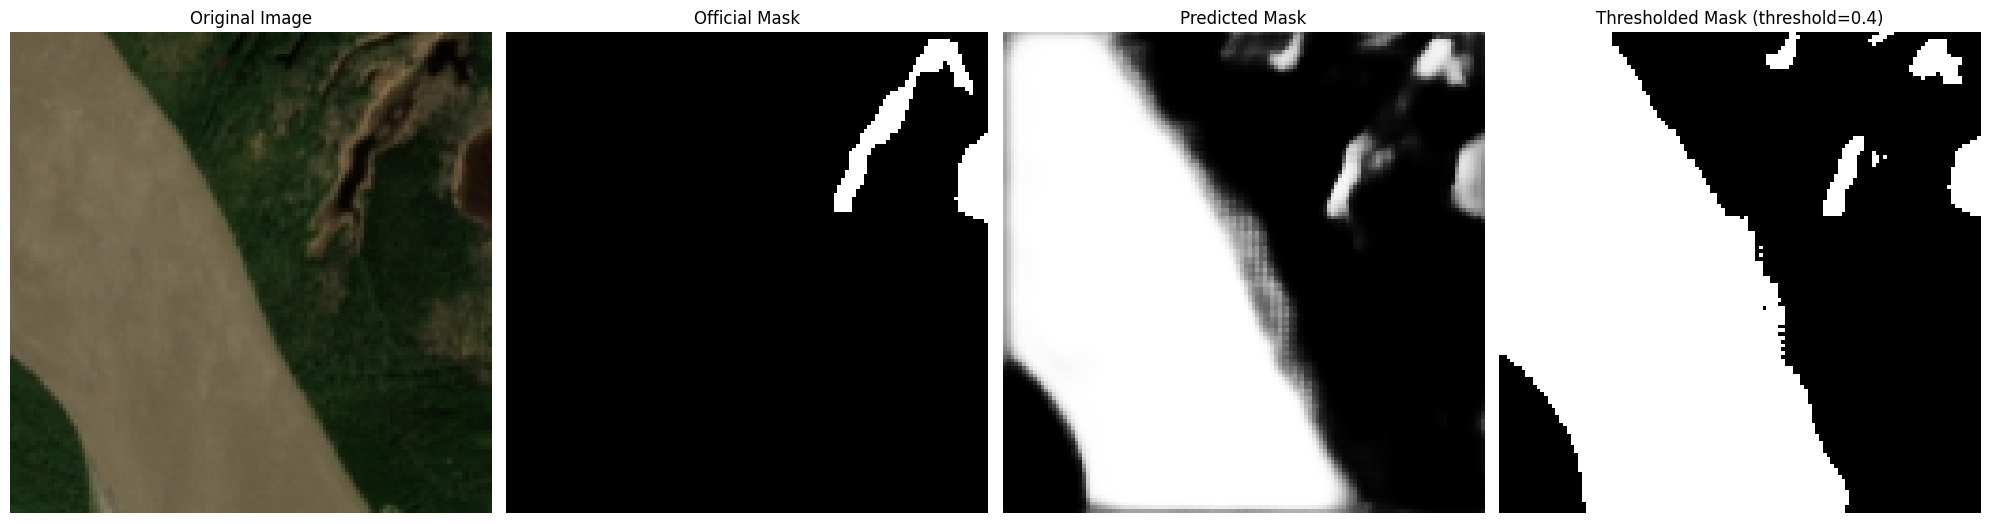

597_256_896.jpg


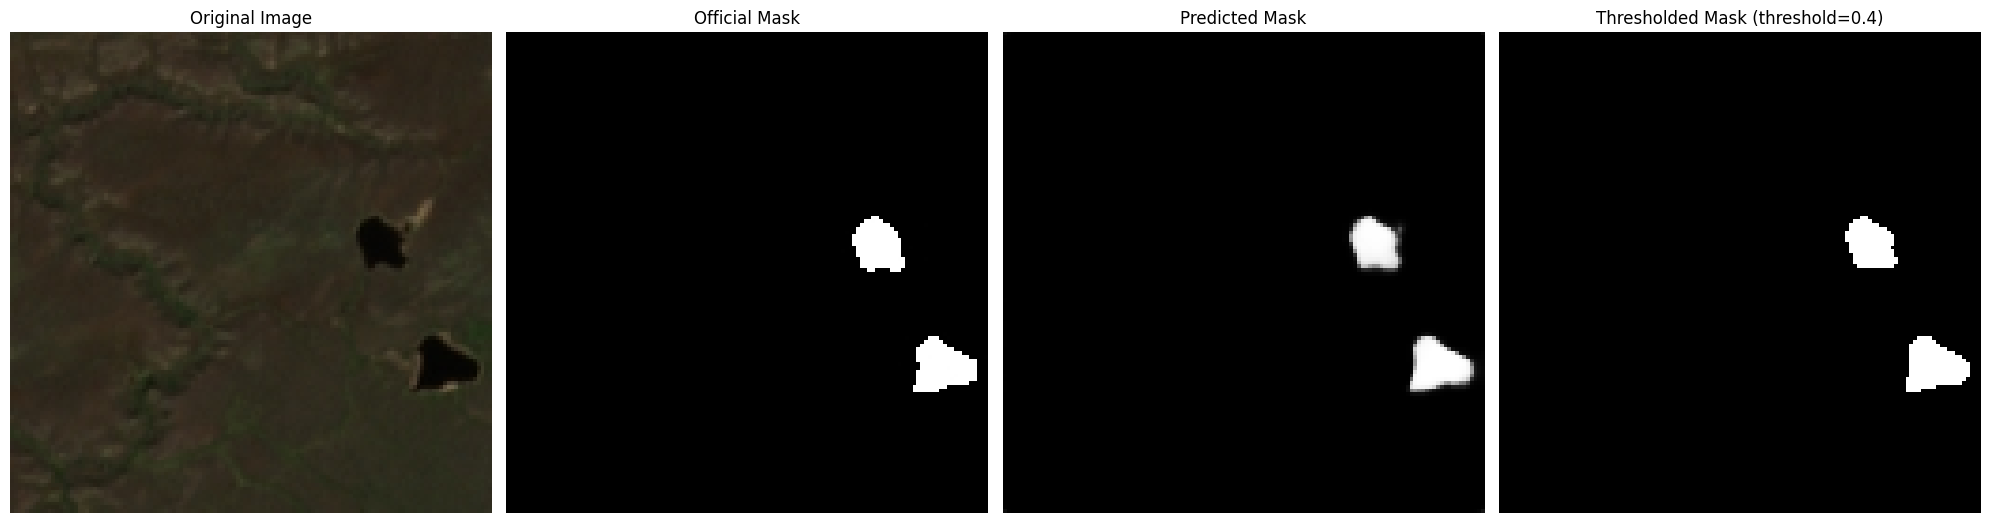

602_896_896.jpg


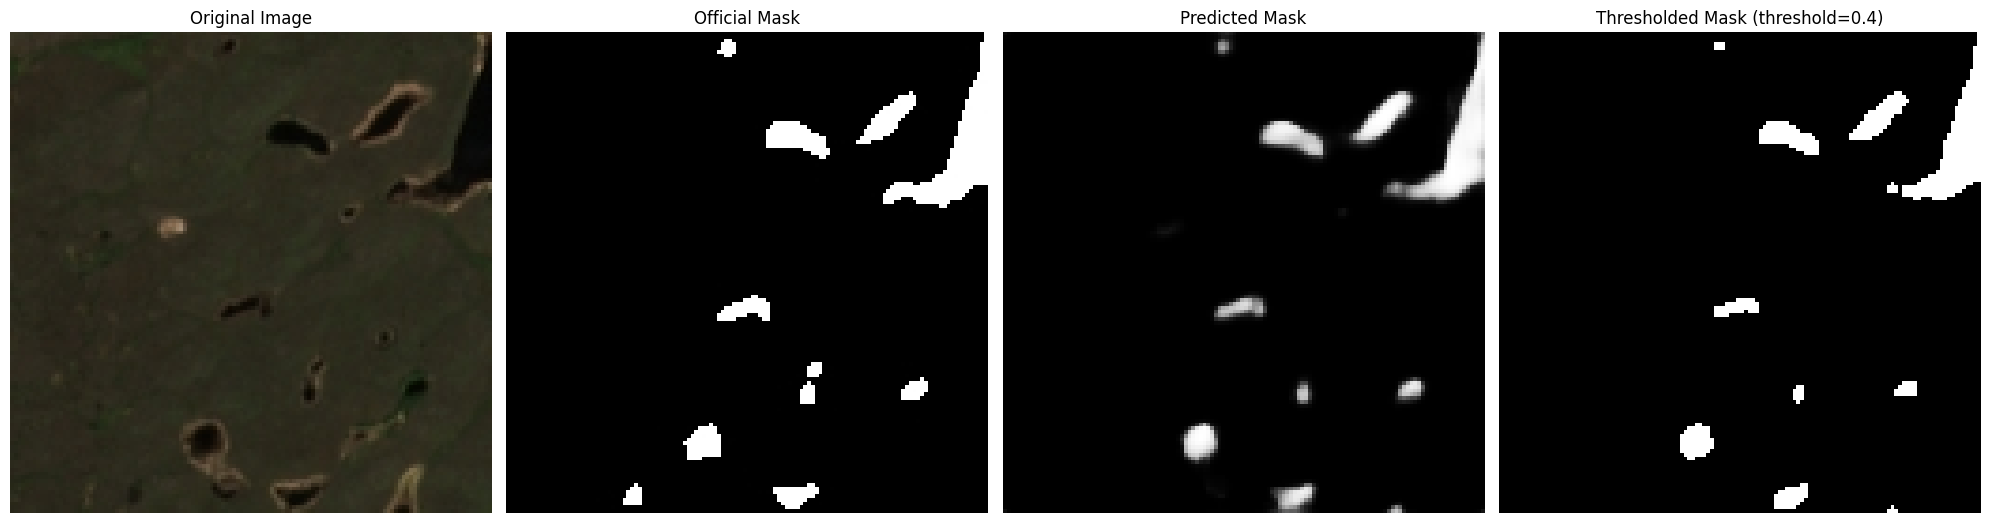

603_1024_896.jpg


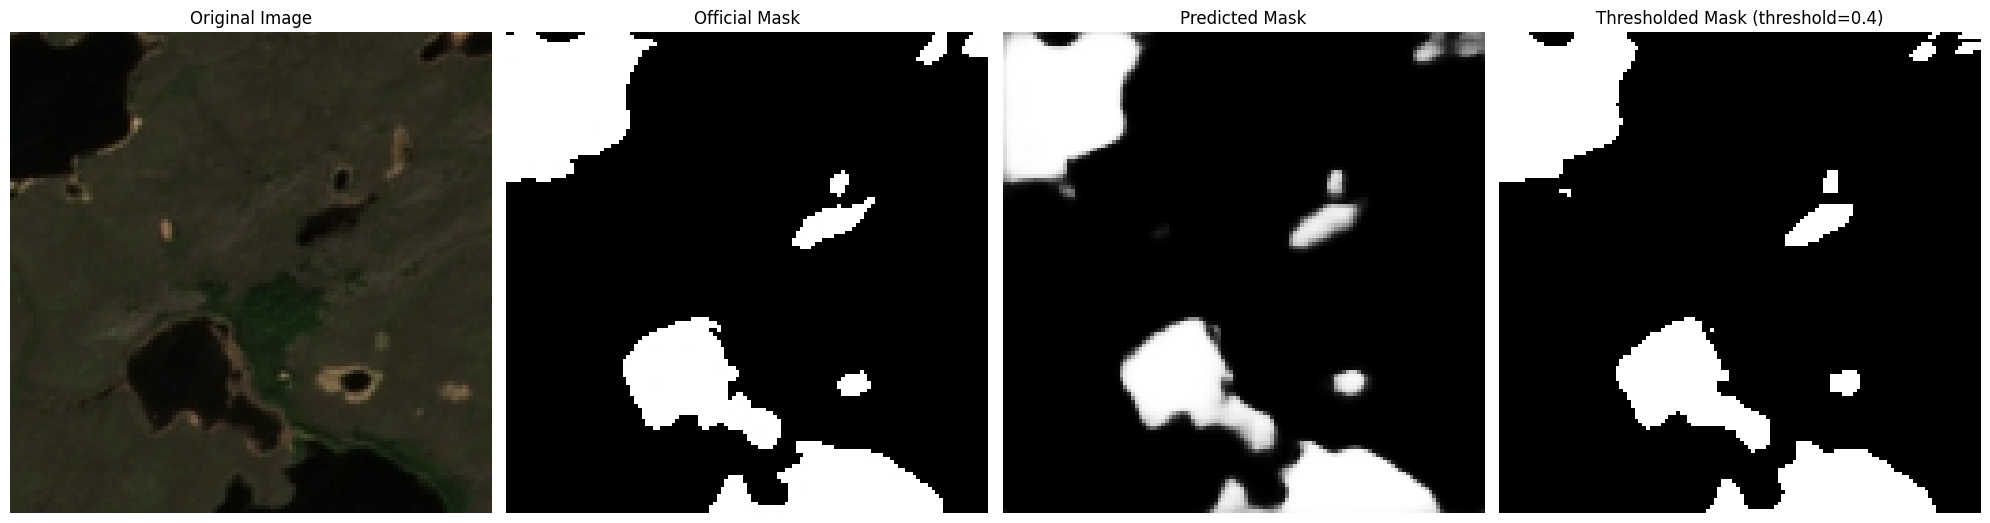

605_1280_896.jpg


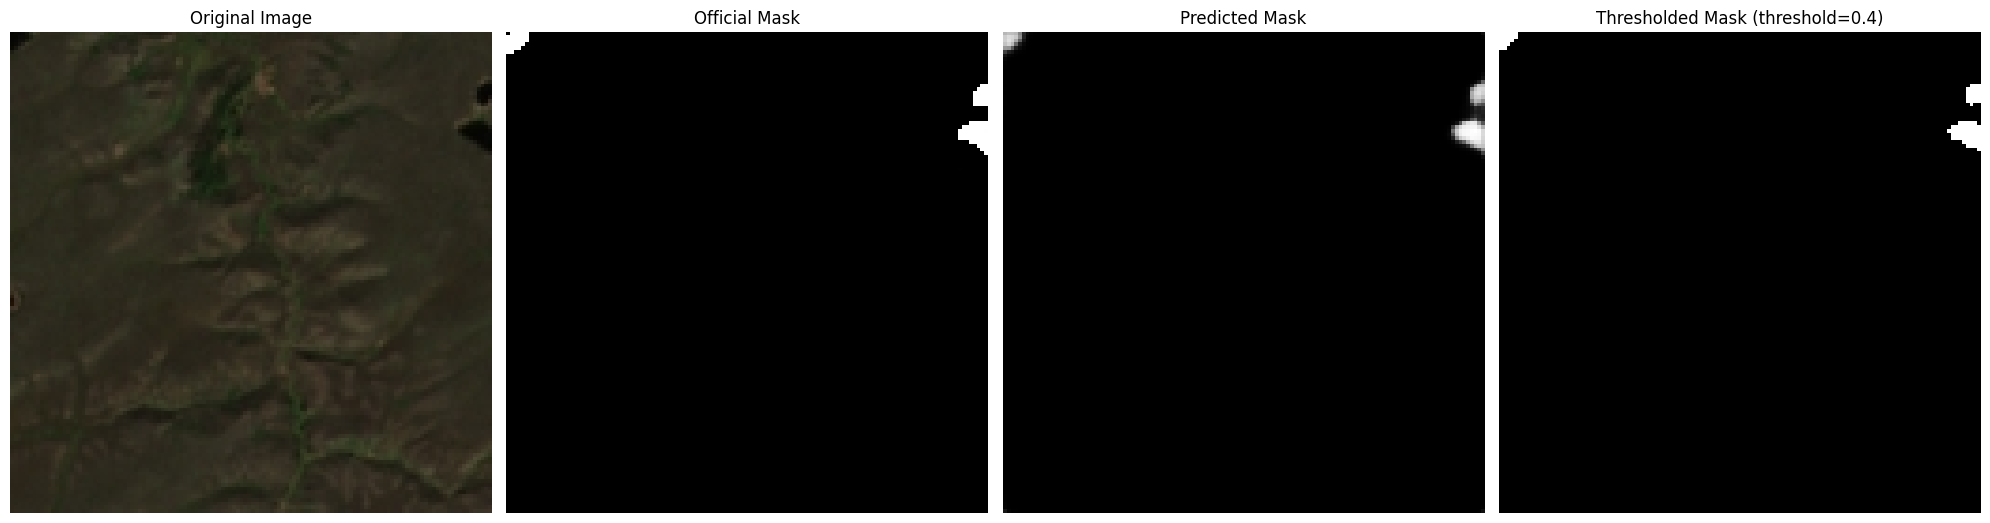

606_1408_896.jpg


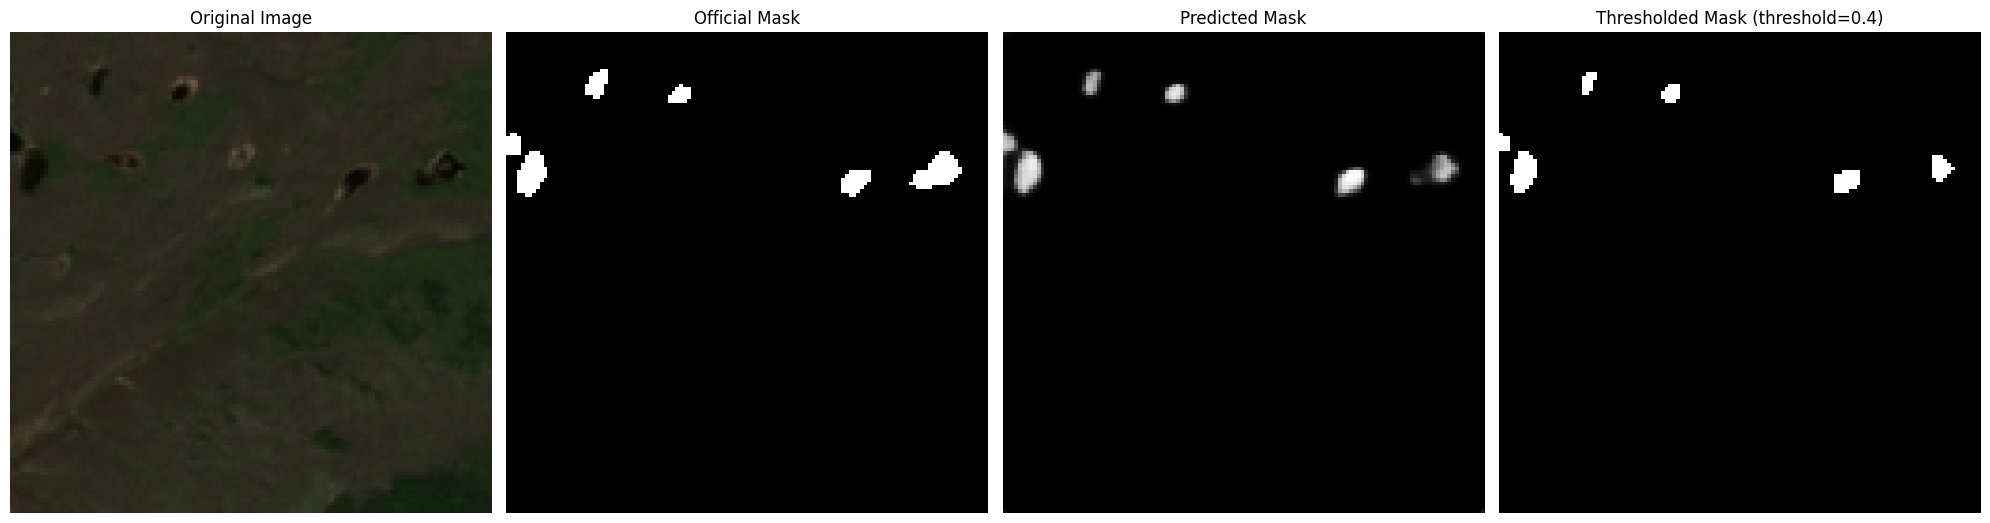

611_2048_896.jpg


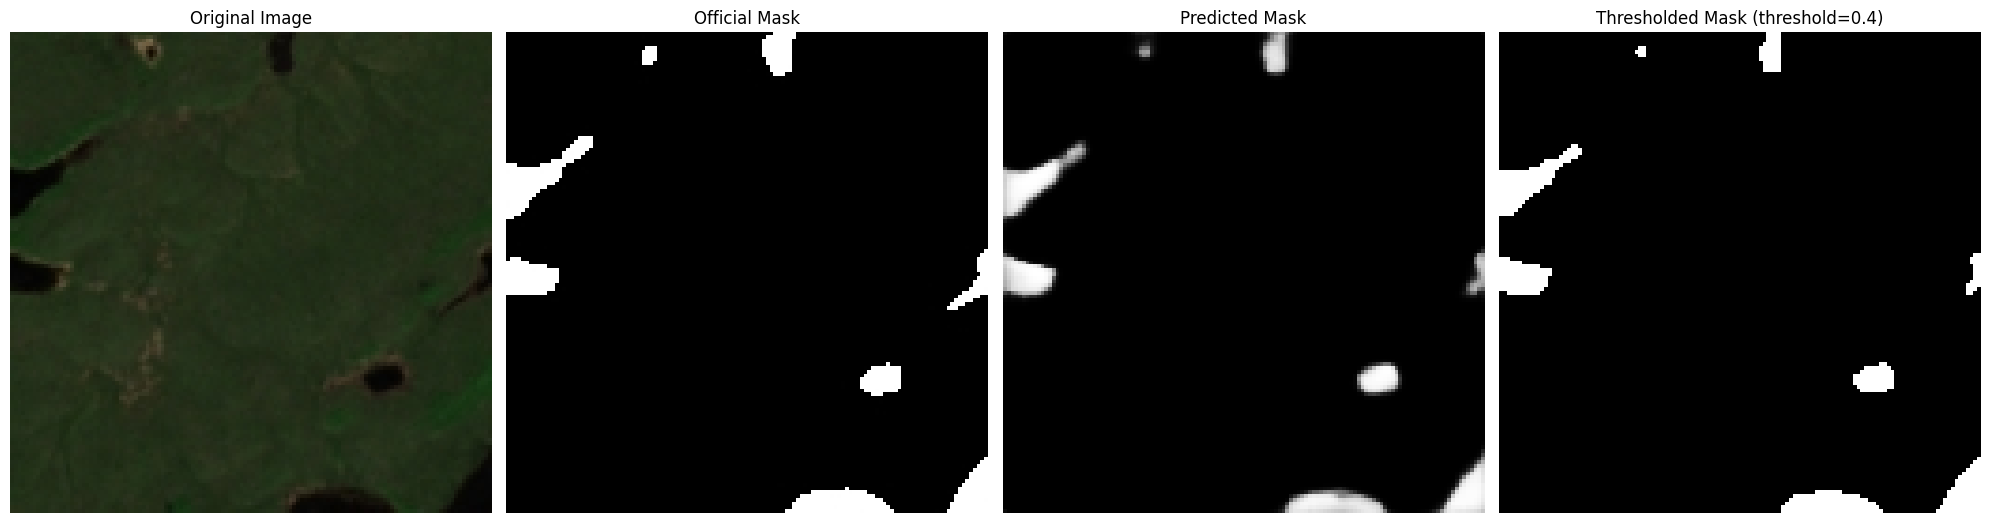

614_2432_896.jpg


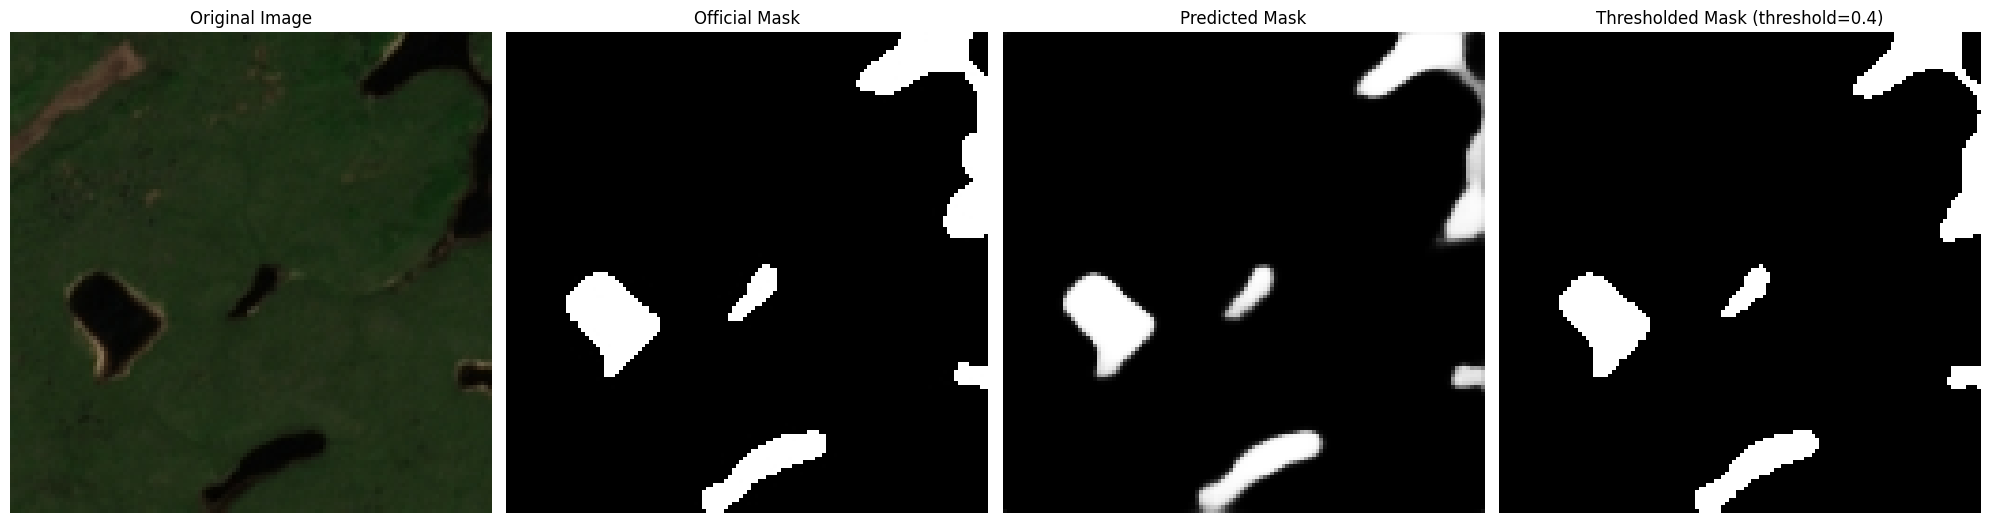

617_2816_896.jpg


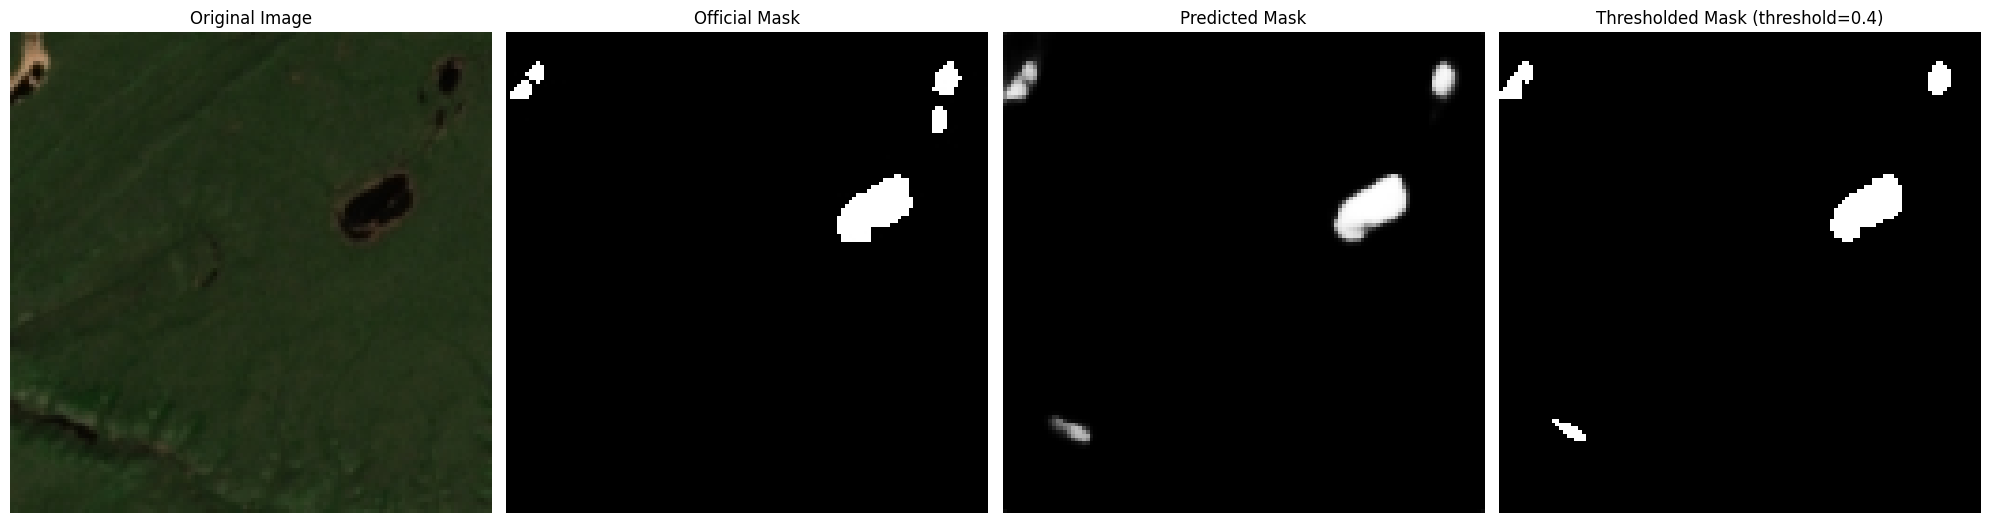

618_2944_896.jpg


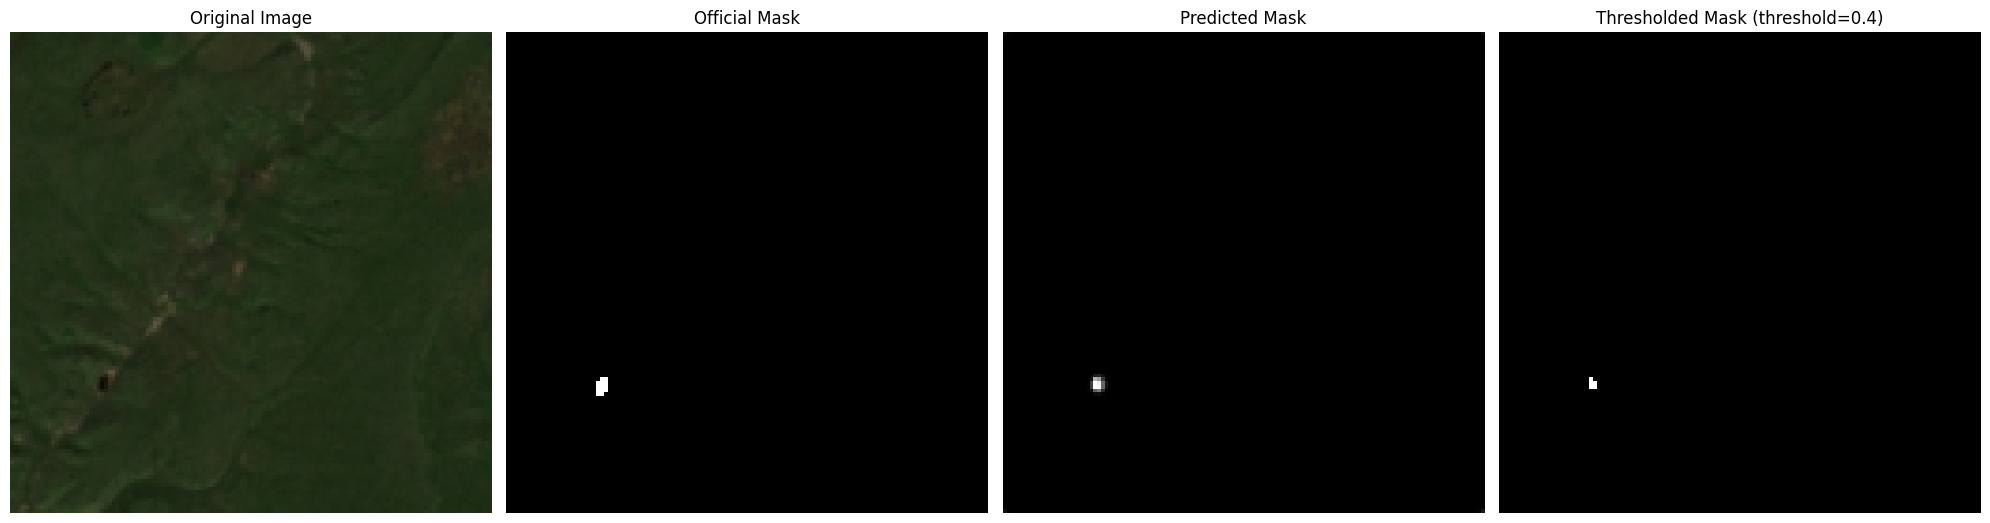

619_3072_896.jpg


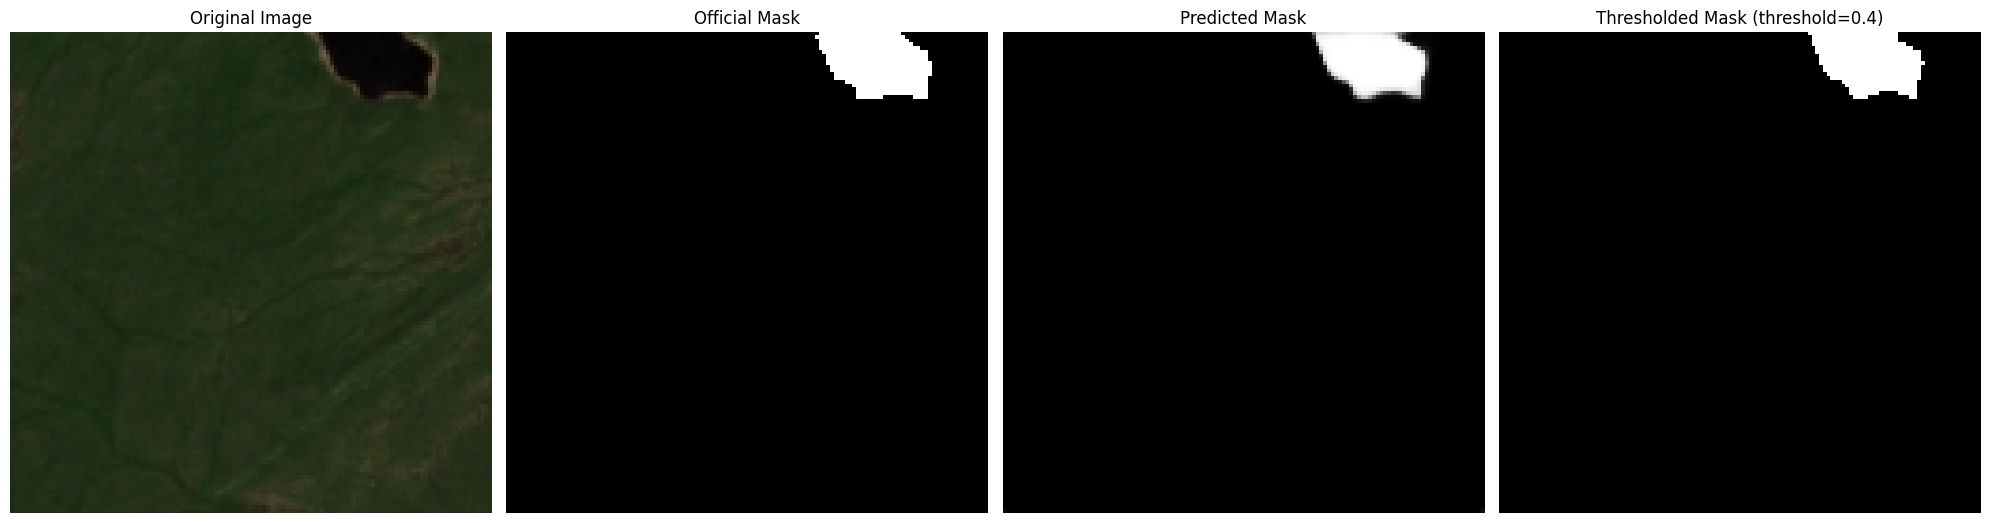

621_3328_896.jpg


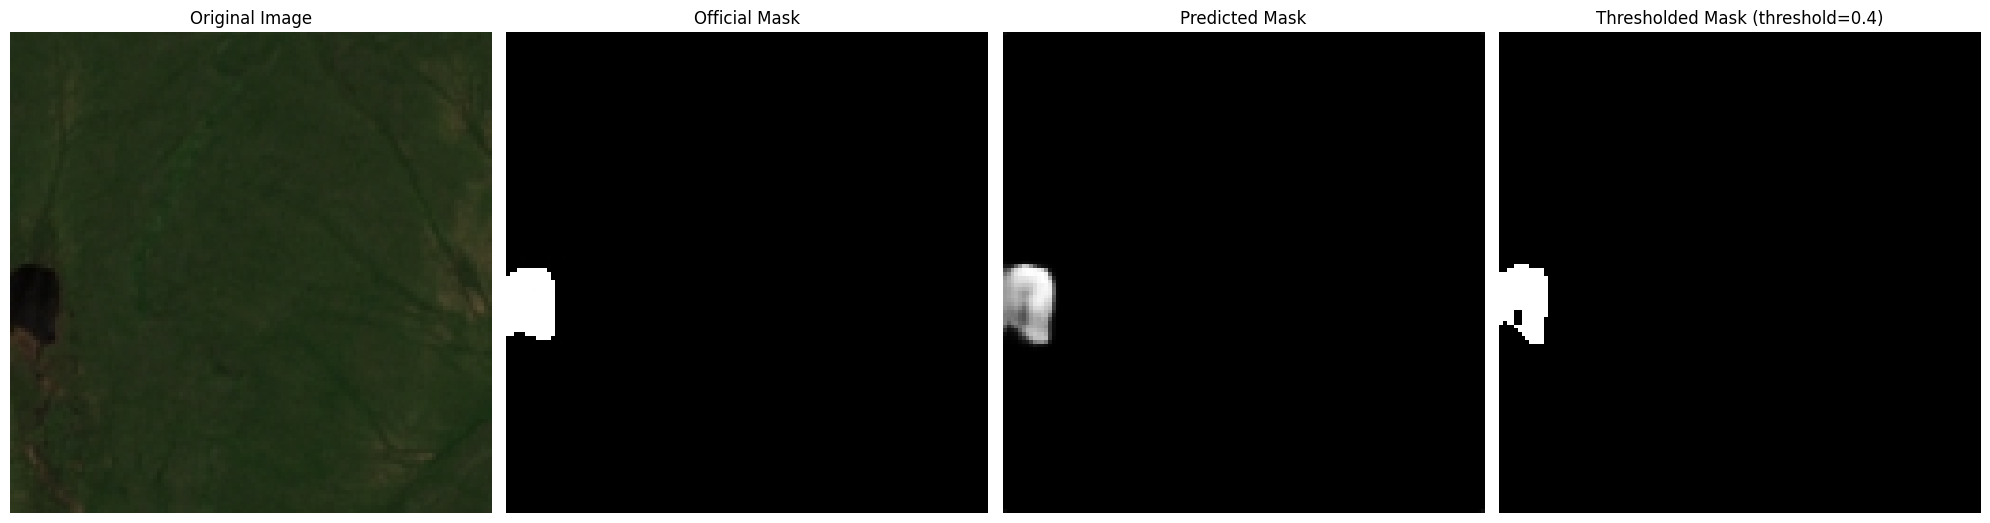

622_3456_896.jpg


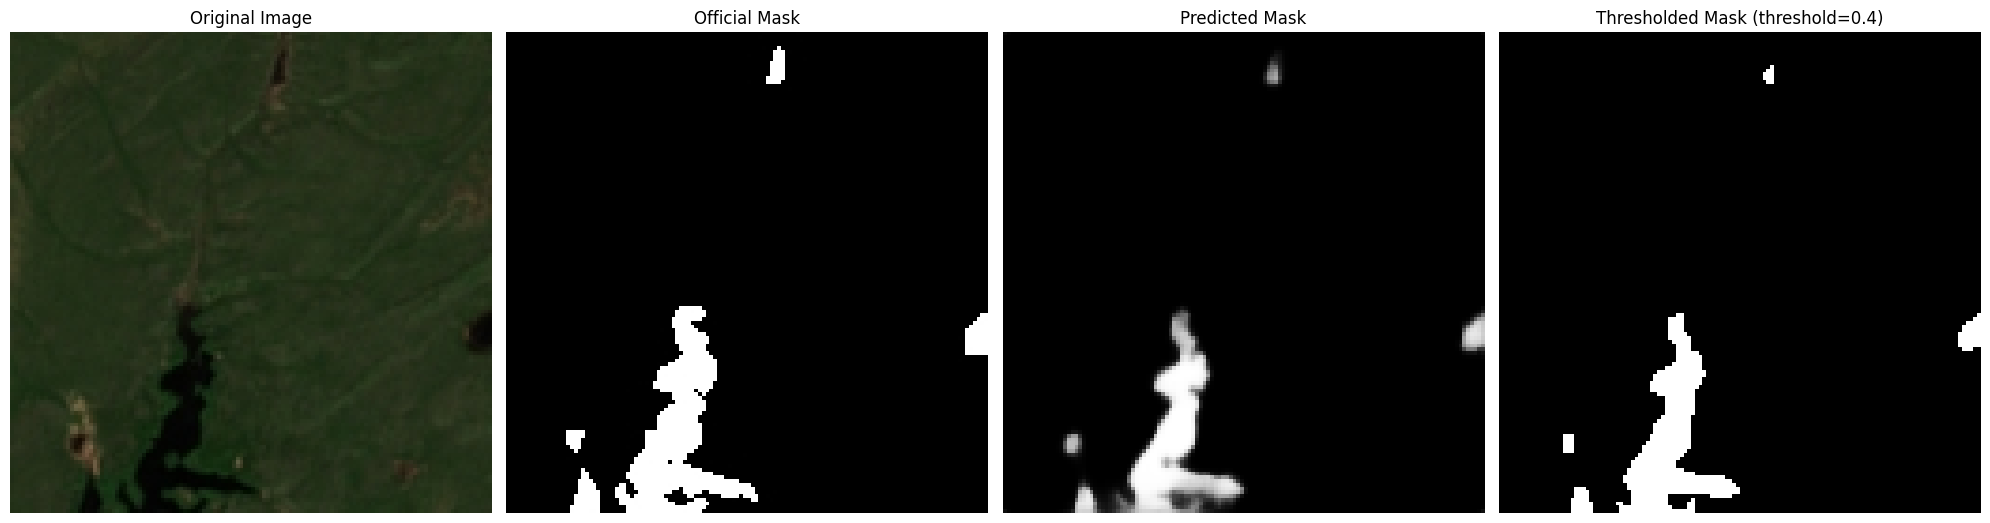

627_4096_896.jpg


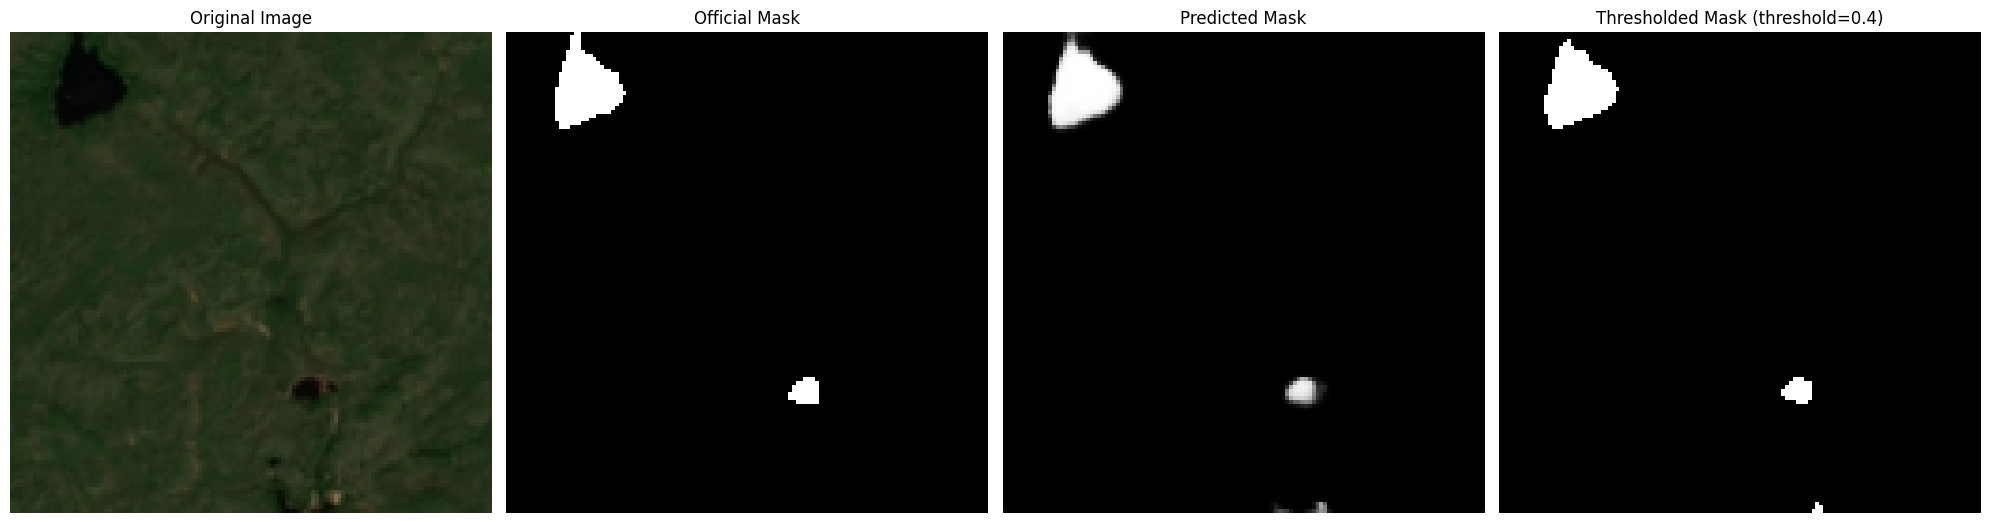

629_4352_896.jpg


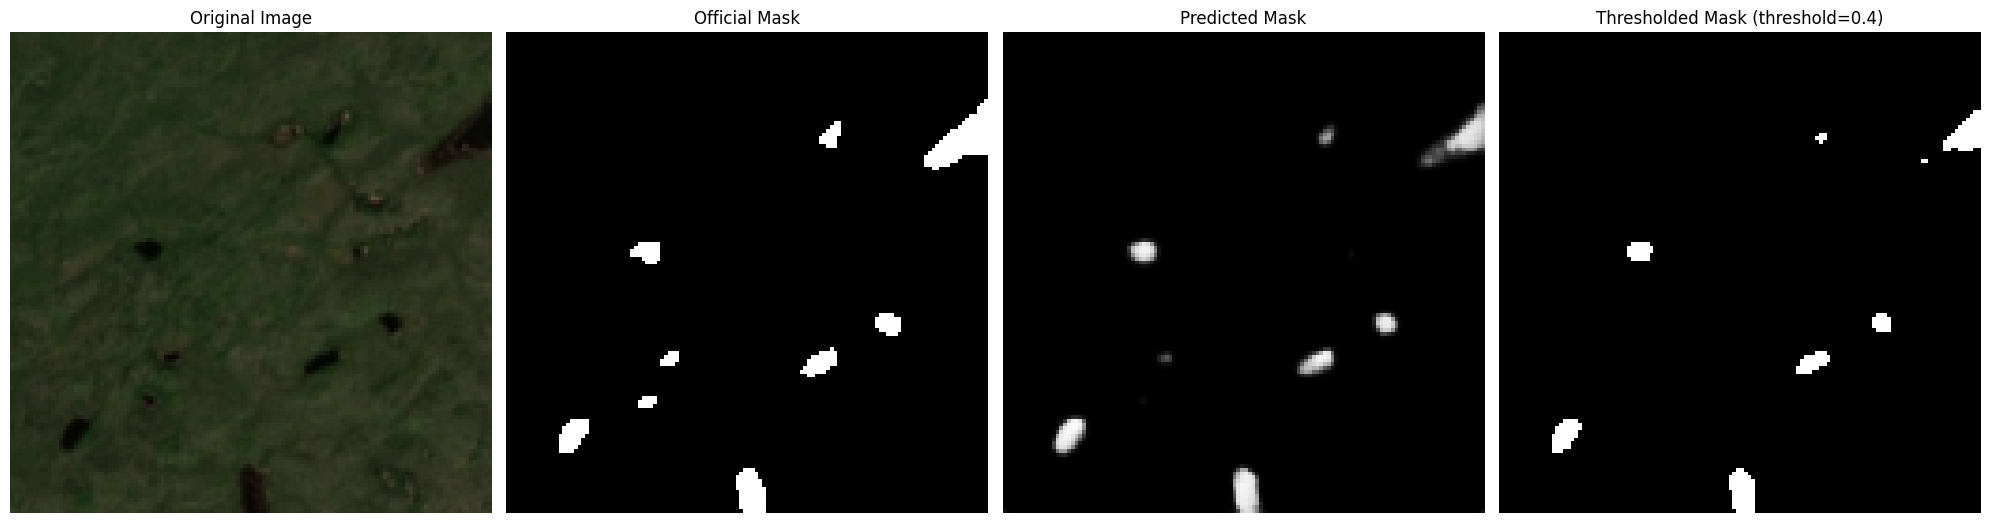

630_4480_896.jpg


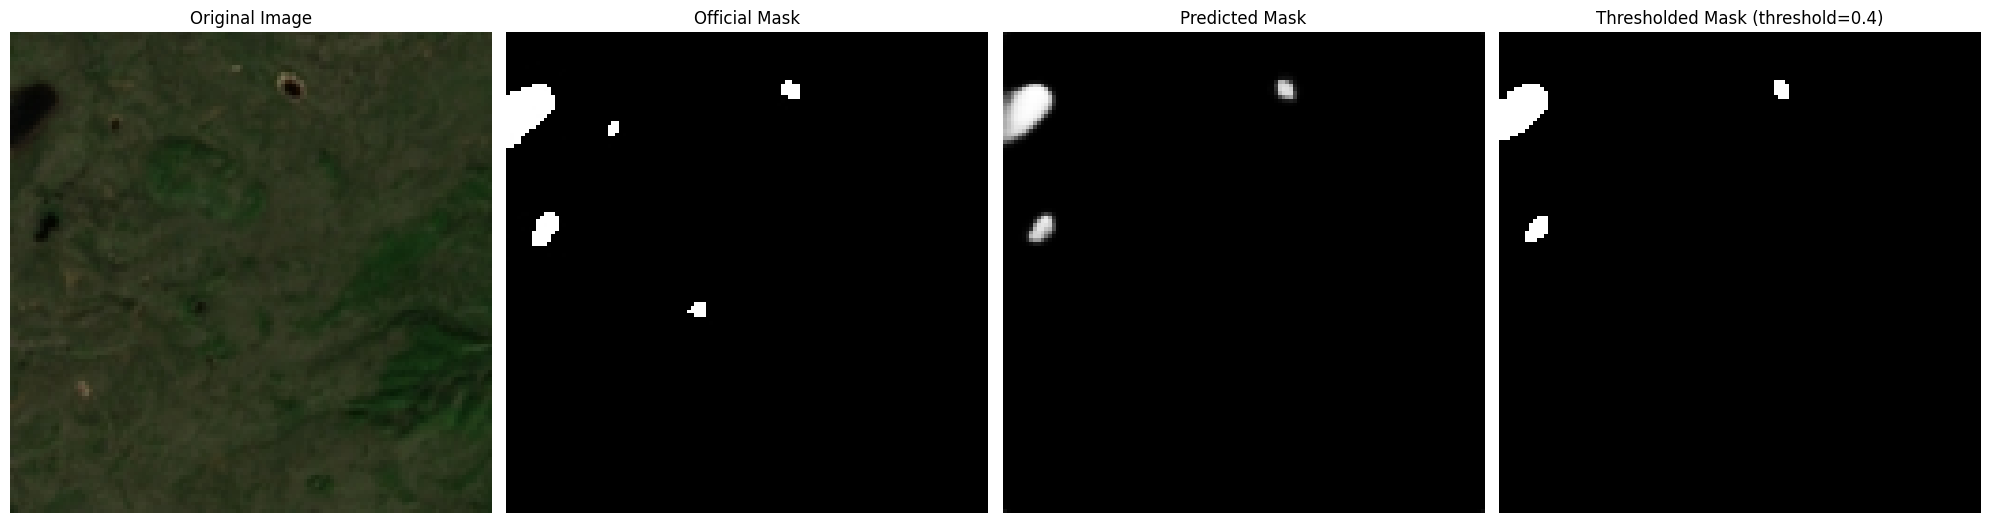

645_6400_896.jpg


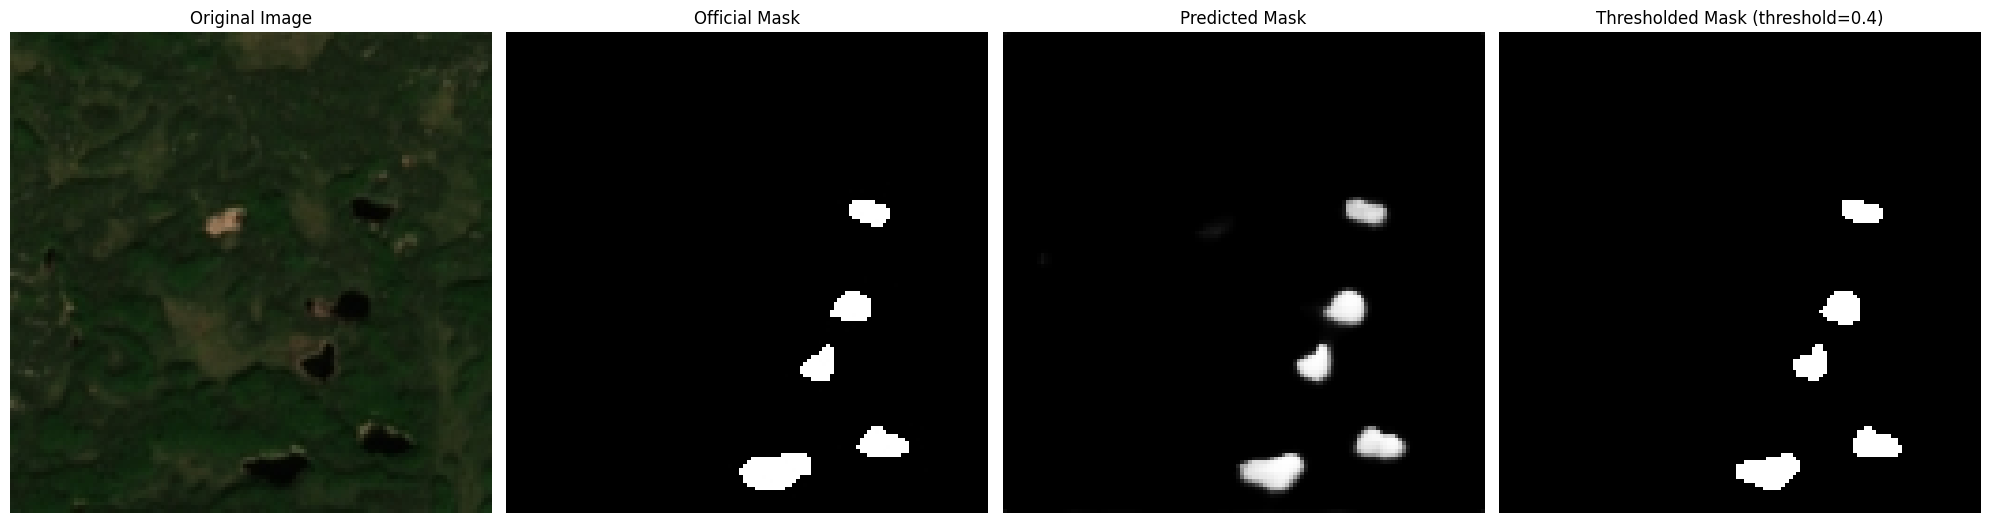

654_7552_896.jpg


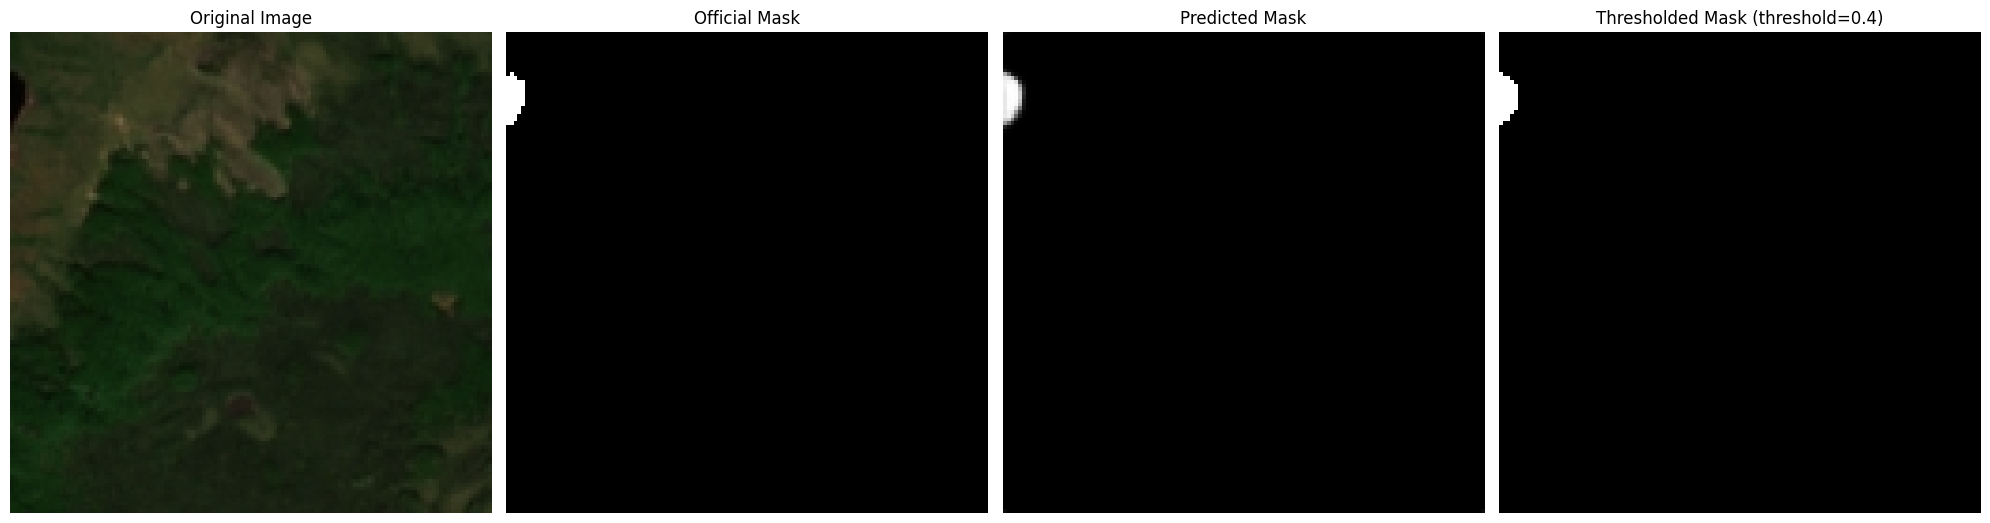

25_3200_0.jpg


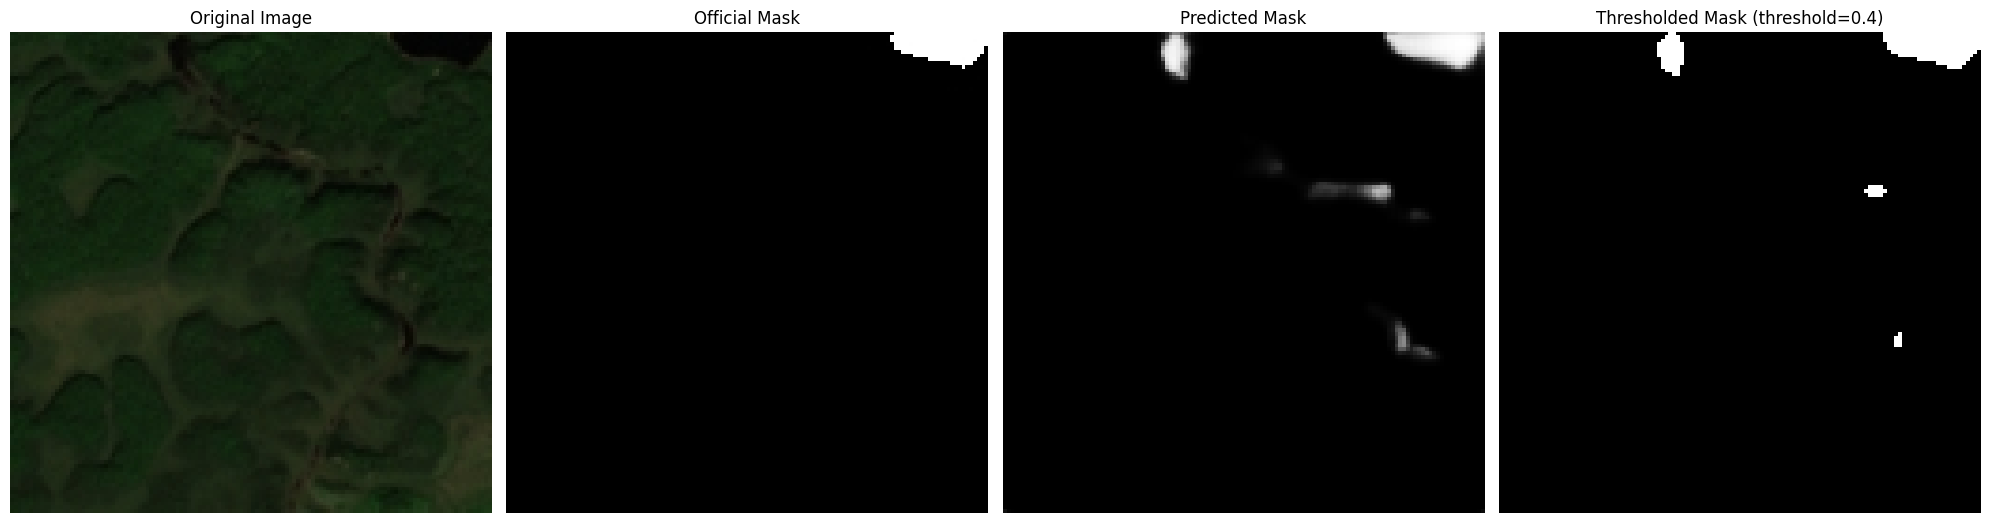

422_10496_512.jpg


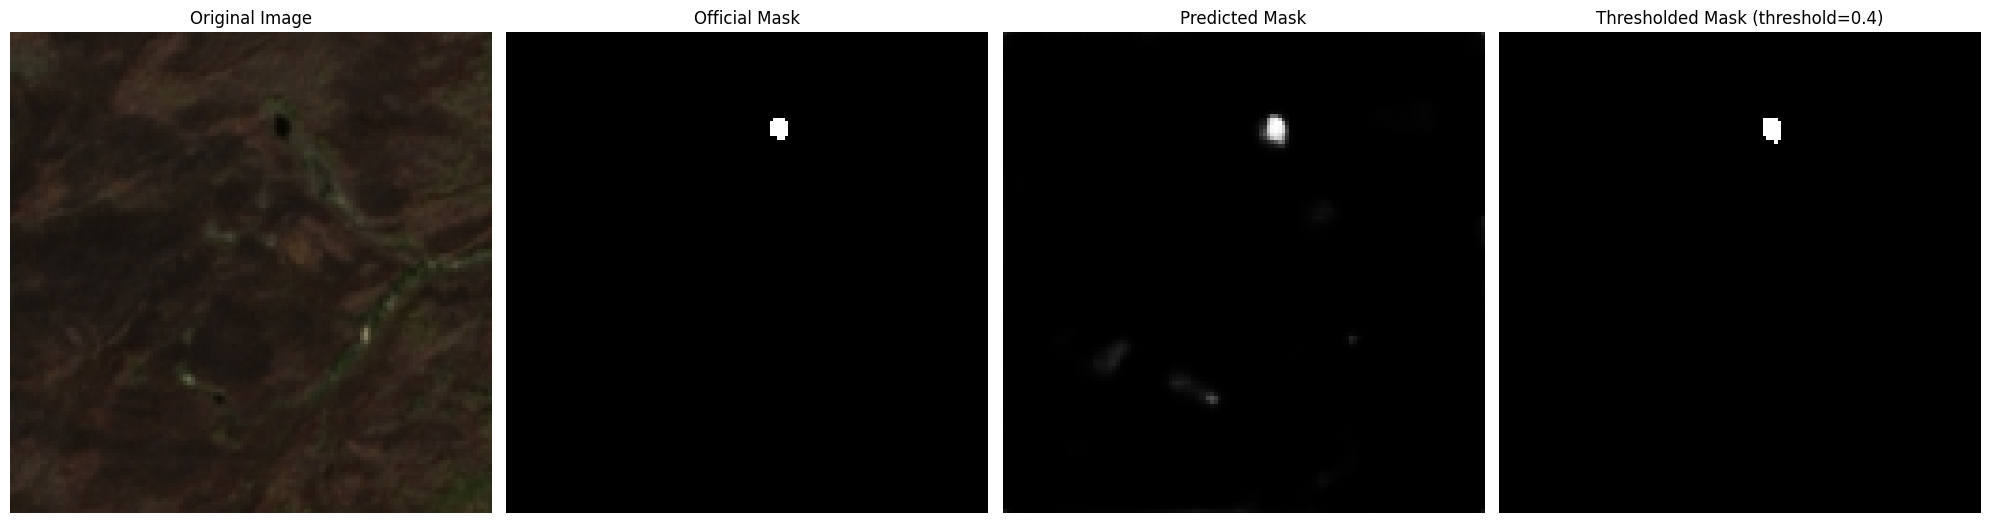

598_384_896.jpg


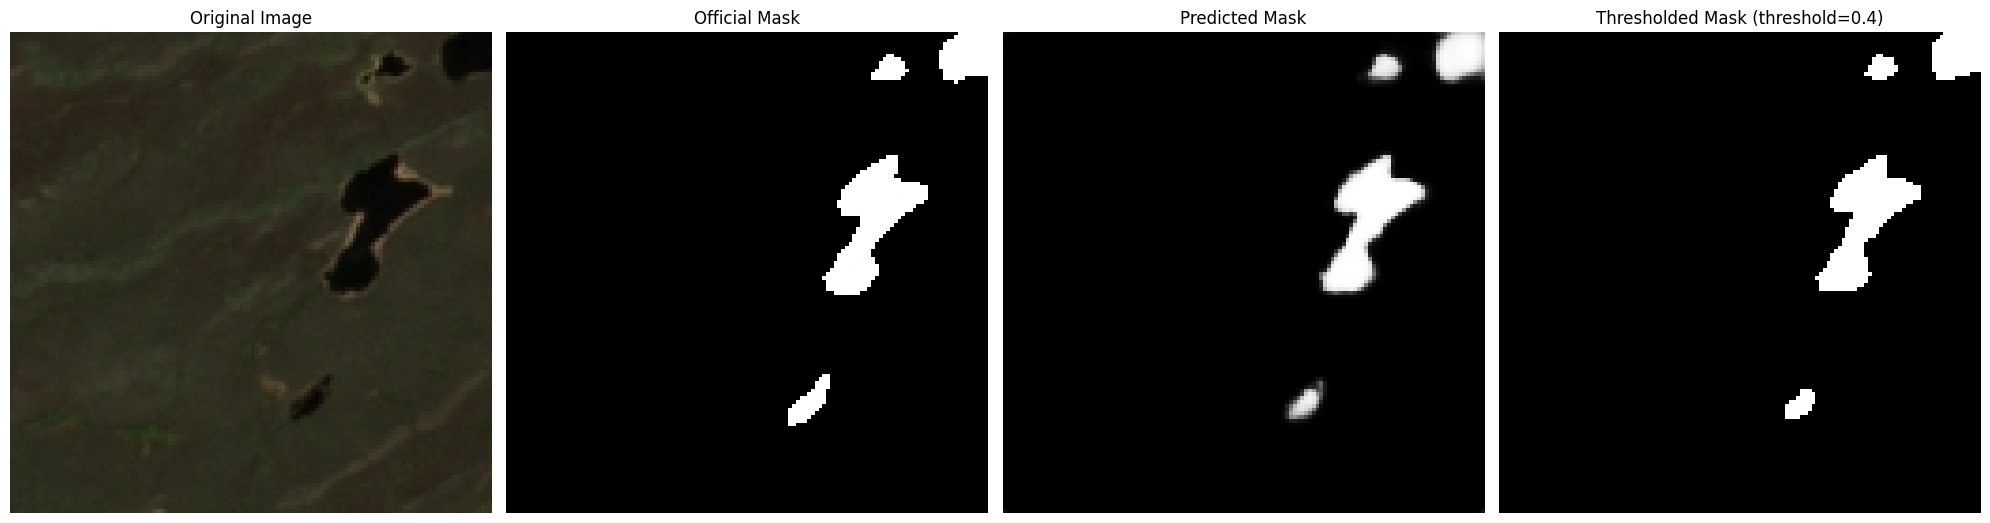

660_8320_896.jpg


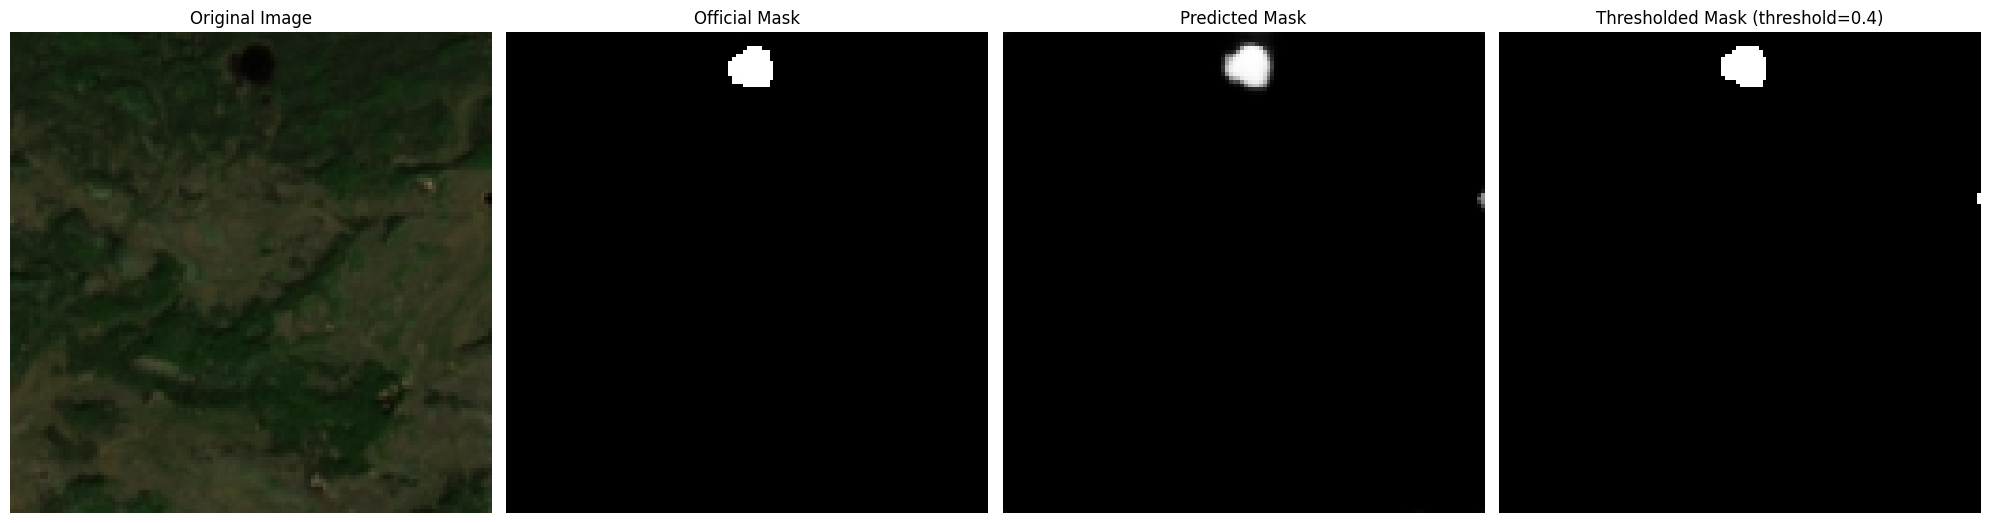

661_8448_896.jpg


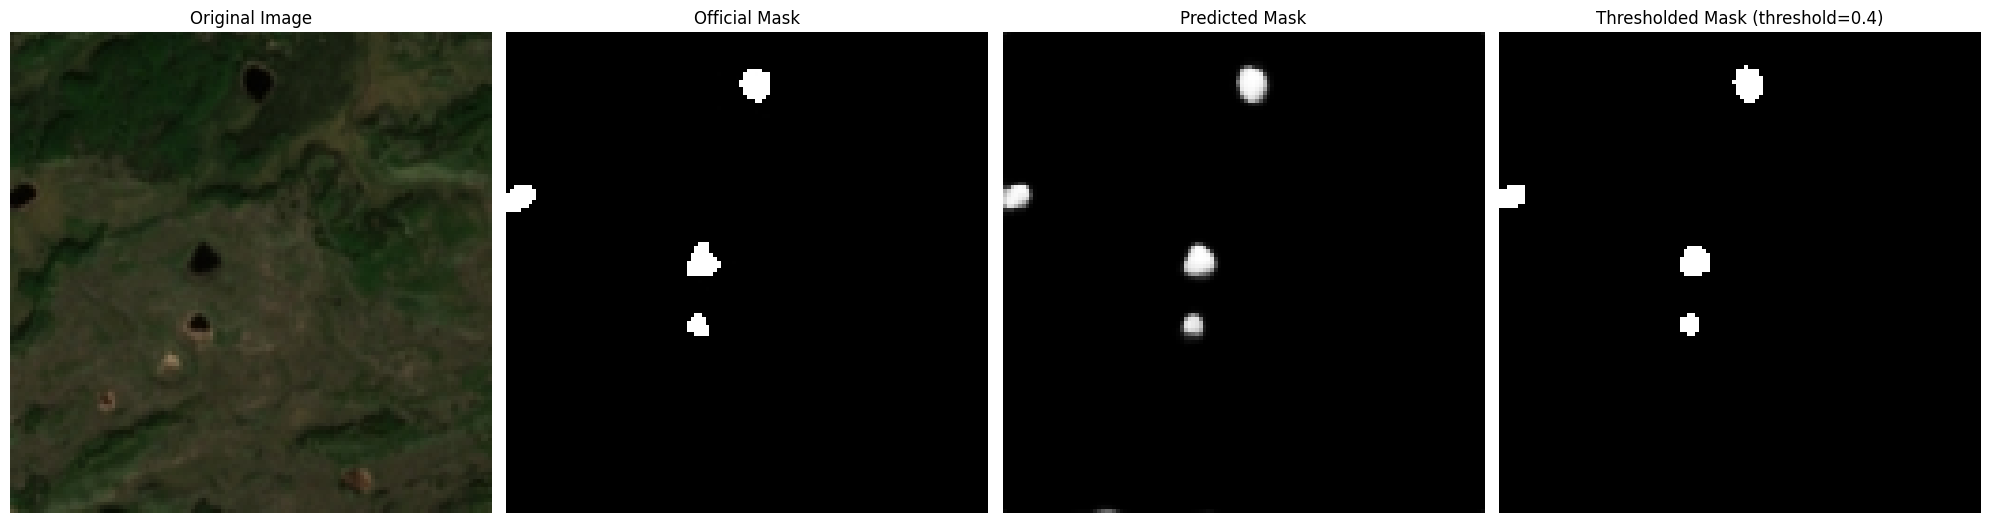

676_10368_896.jpg


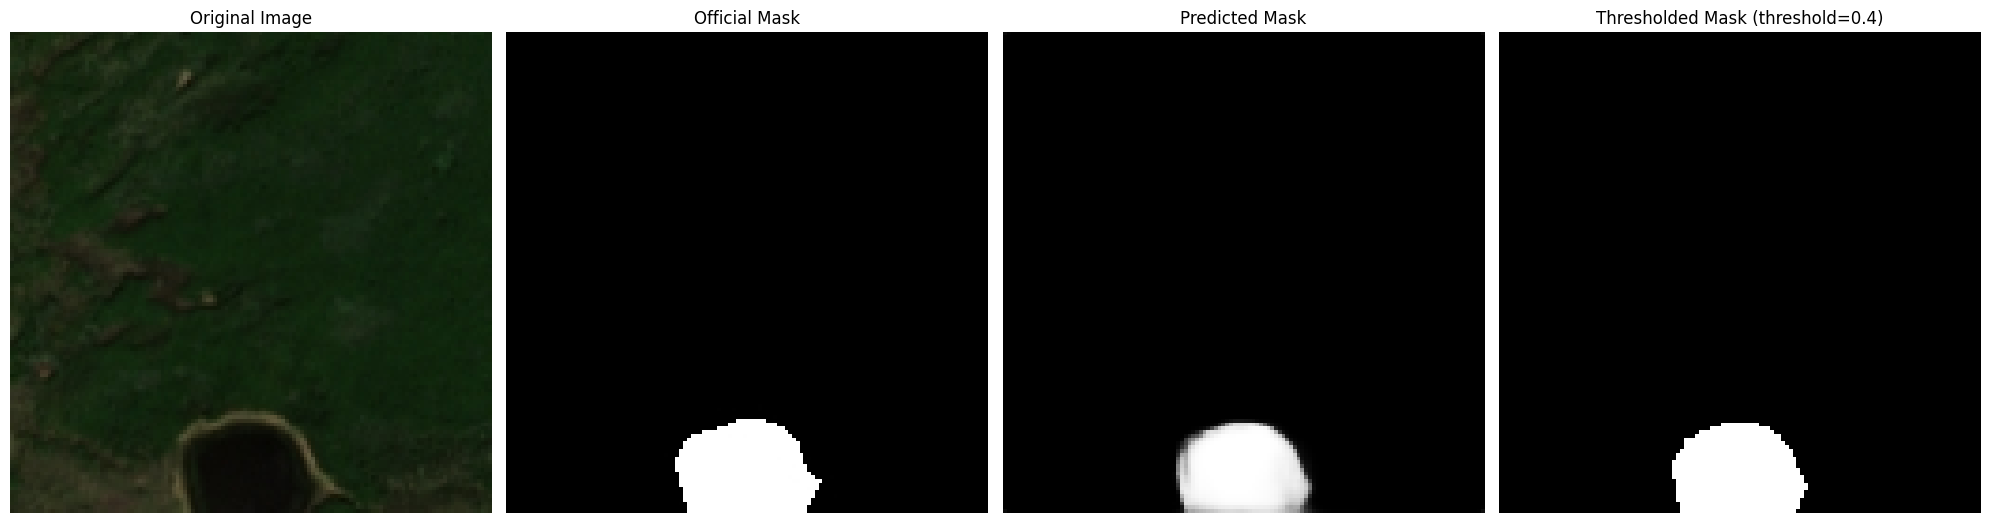

681_128_1024.jpg


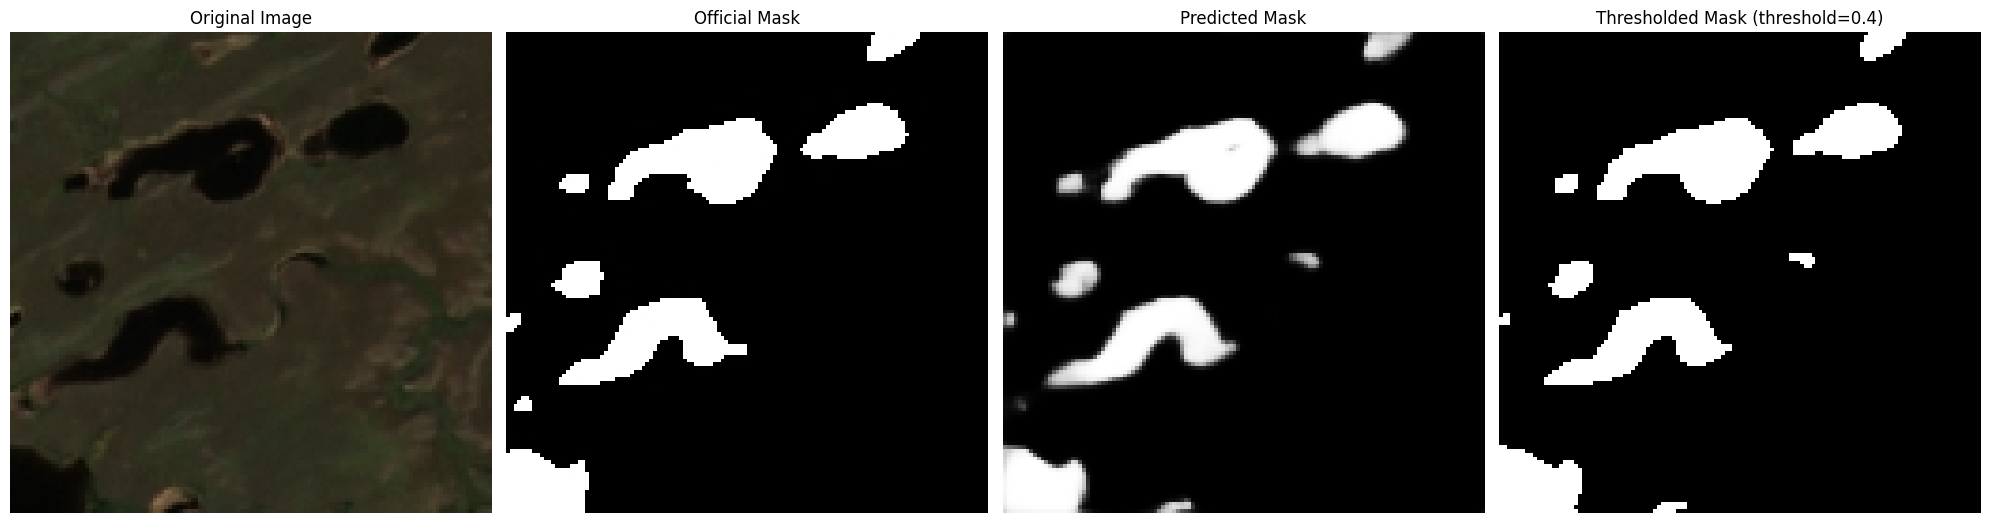

687_896_1024.jpg


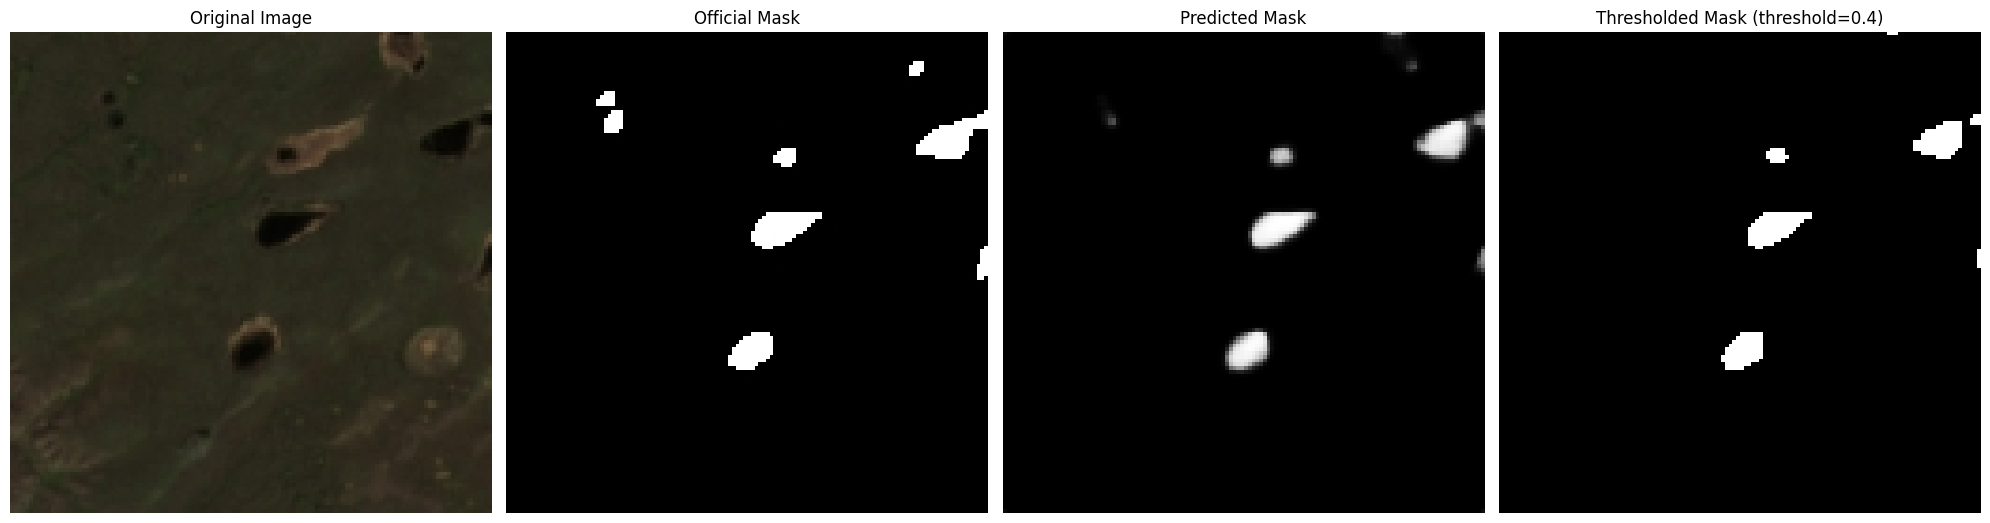

691_1408_1024.jpg


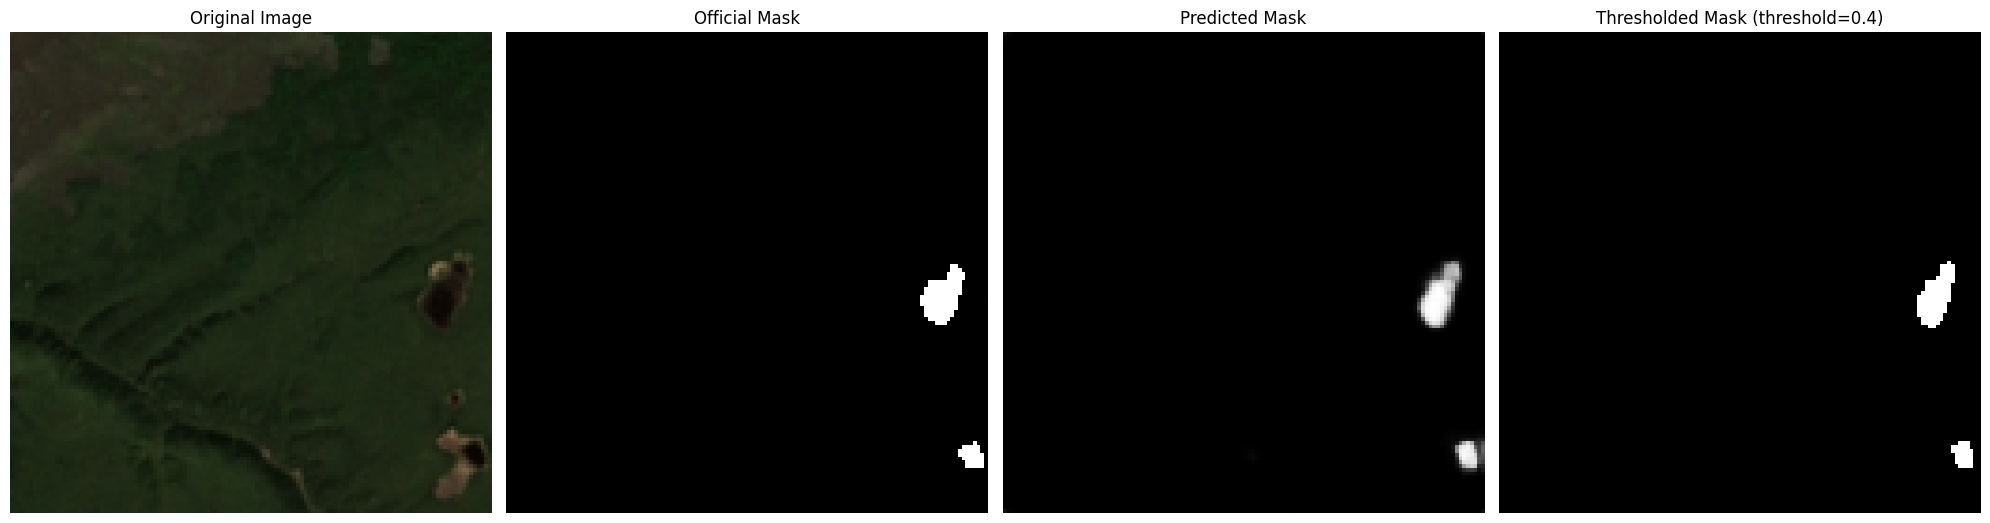

692_1536_1024.jpg


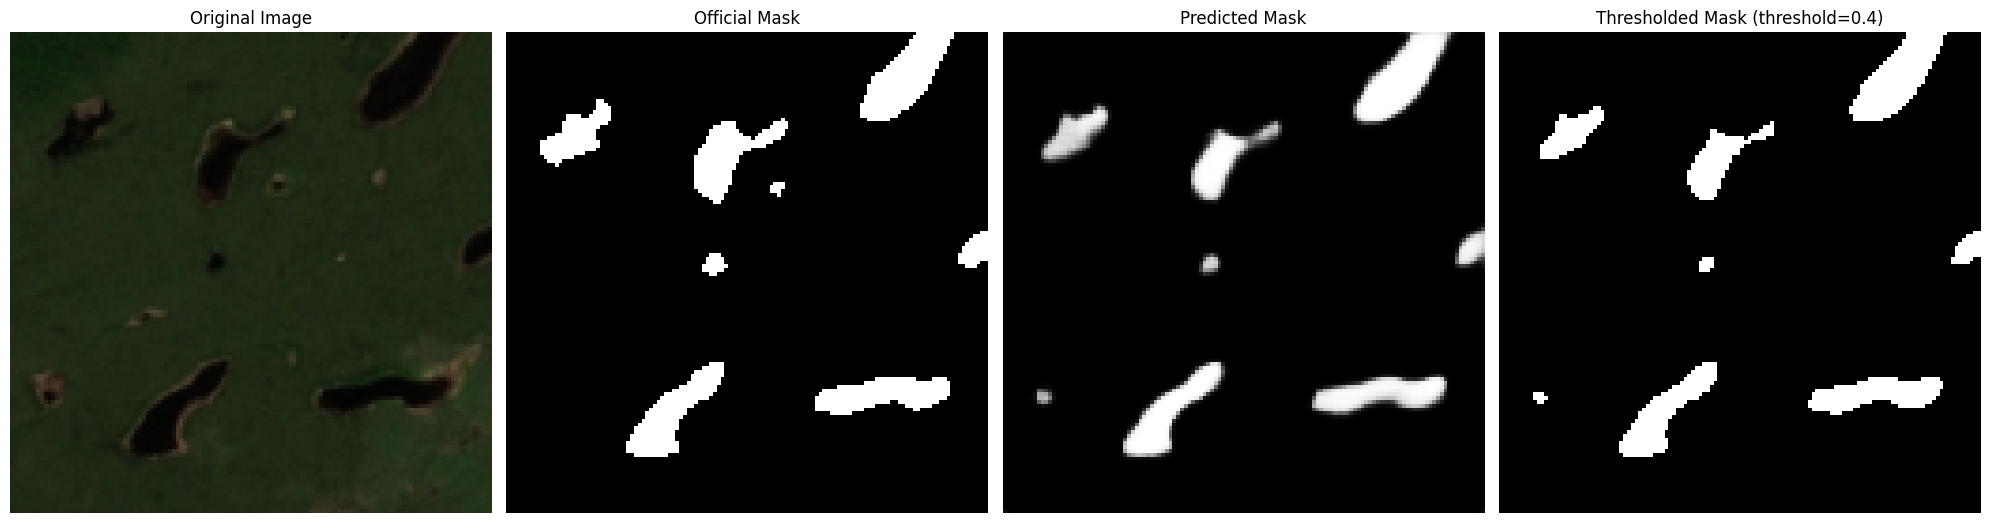

697_2176_1024.jpg


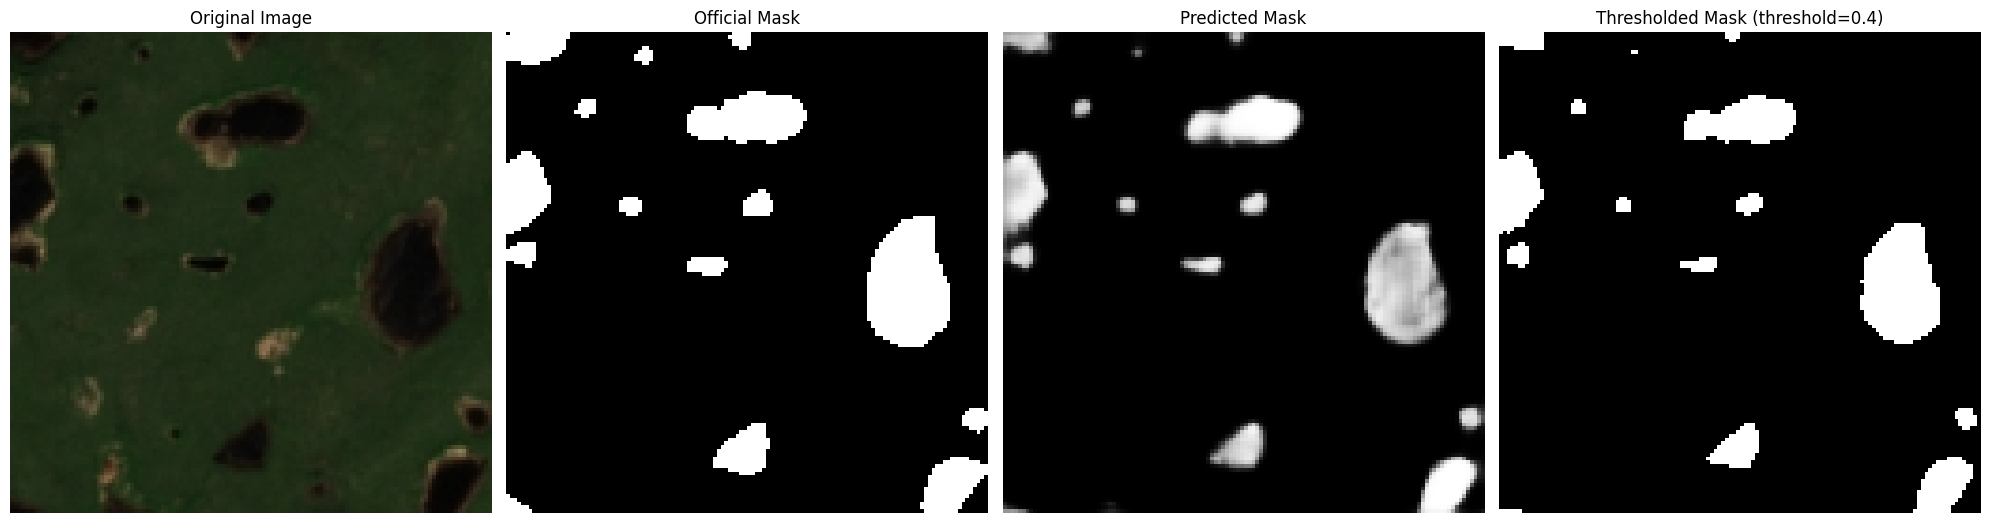

700_2560_1024.jpg


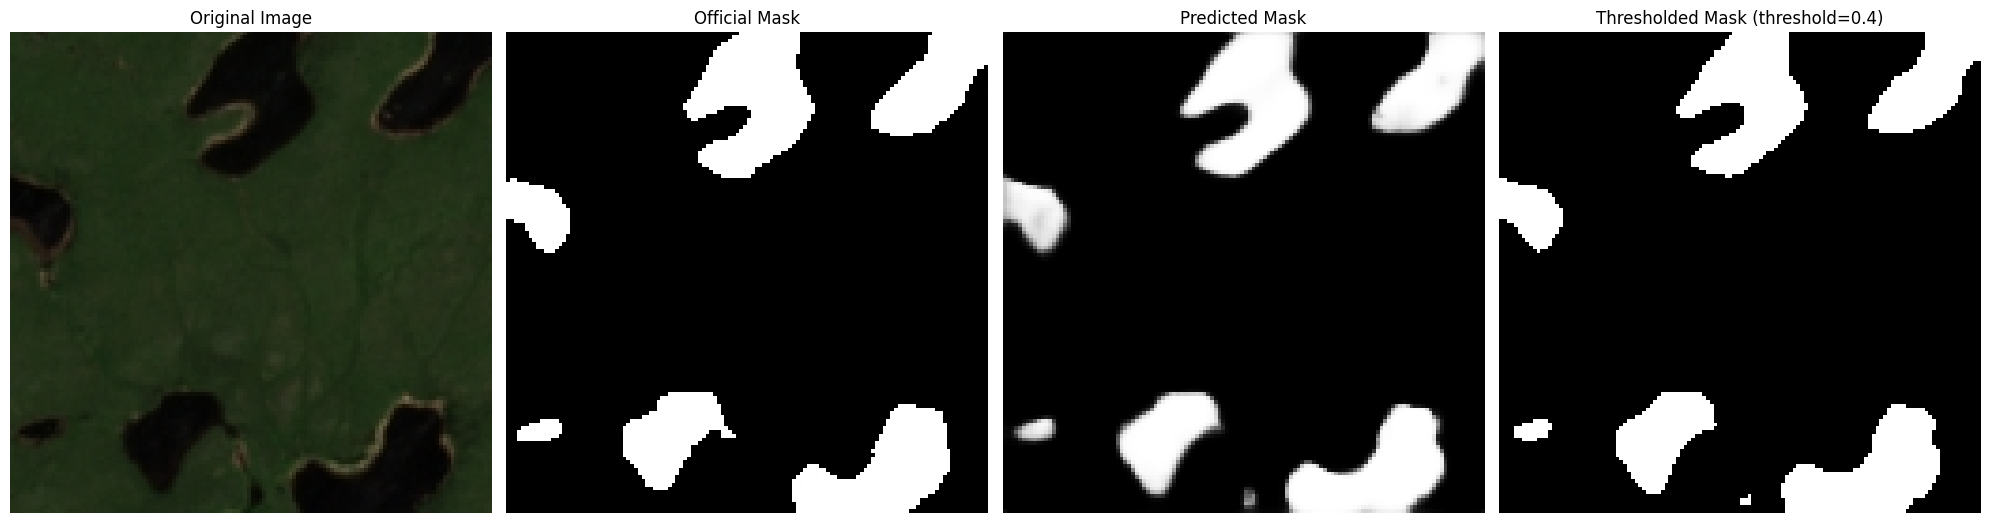

705_3200_1024.jpg


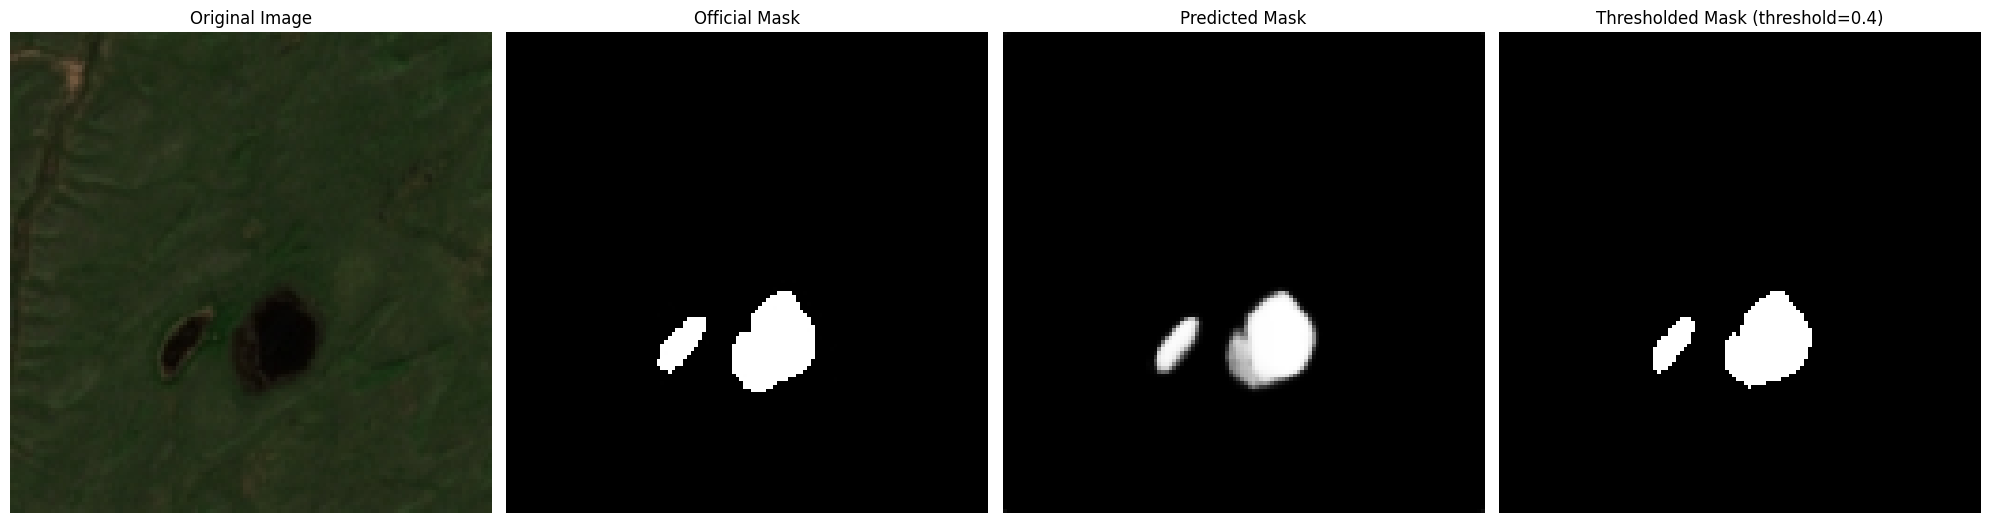

710_3840_1024.jpg


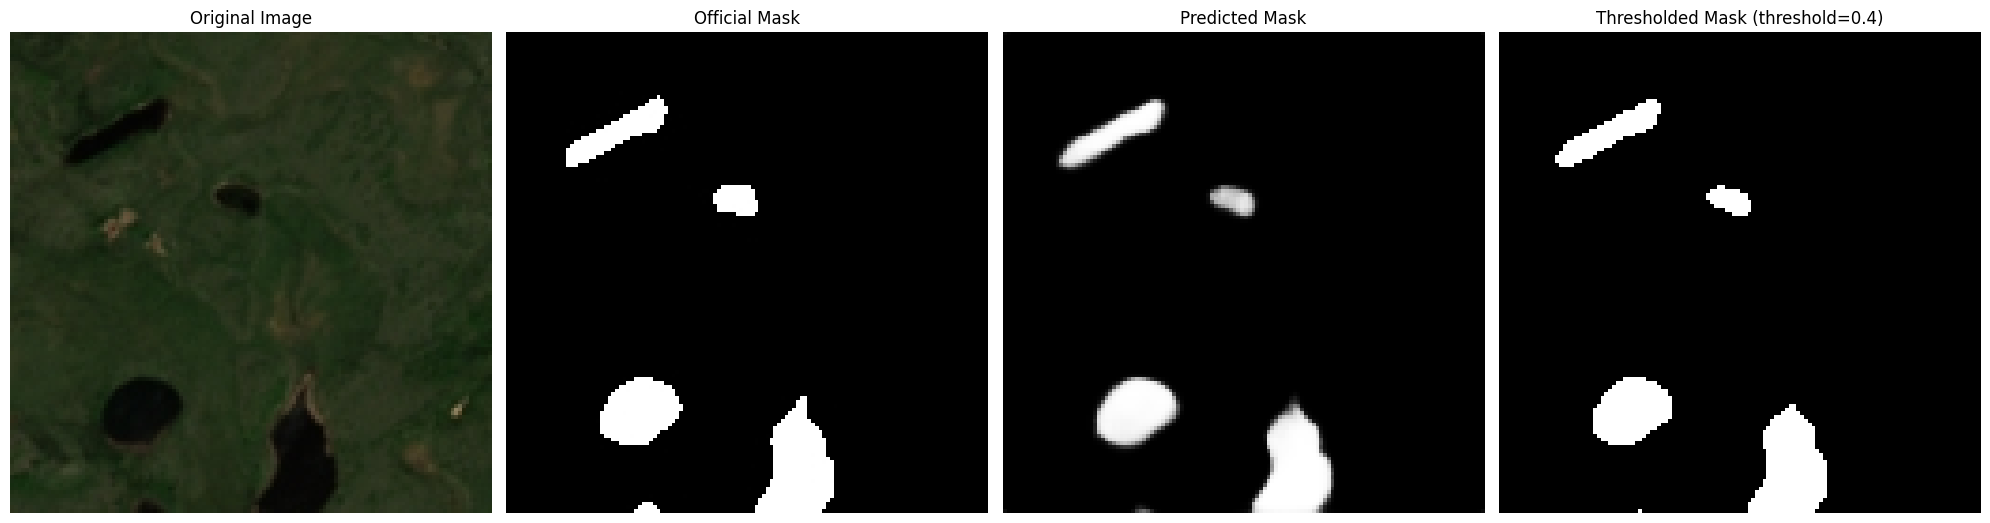

712_4096_1024.jpg


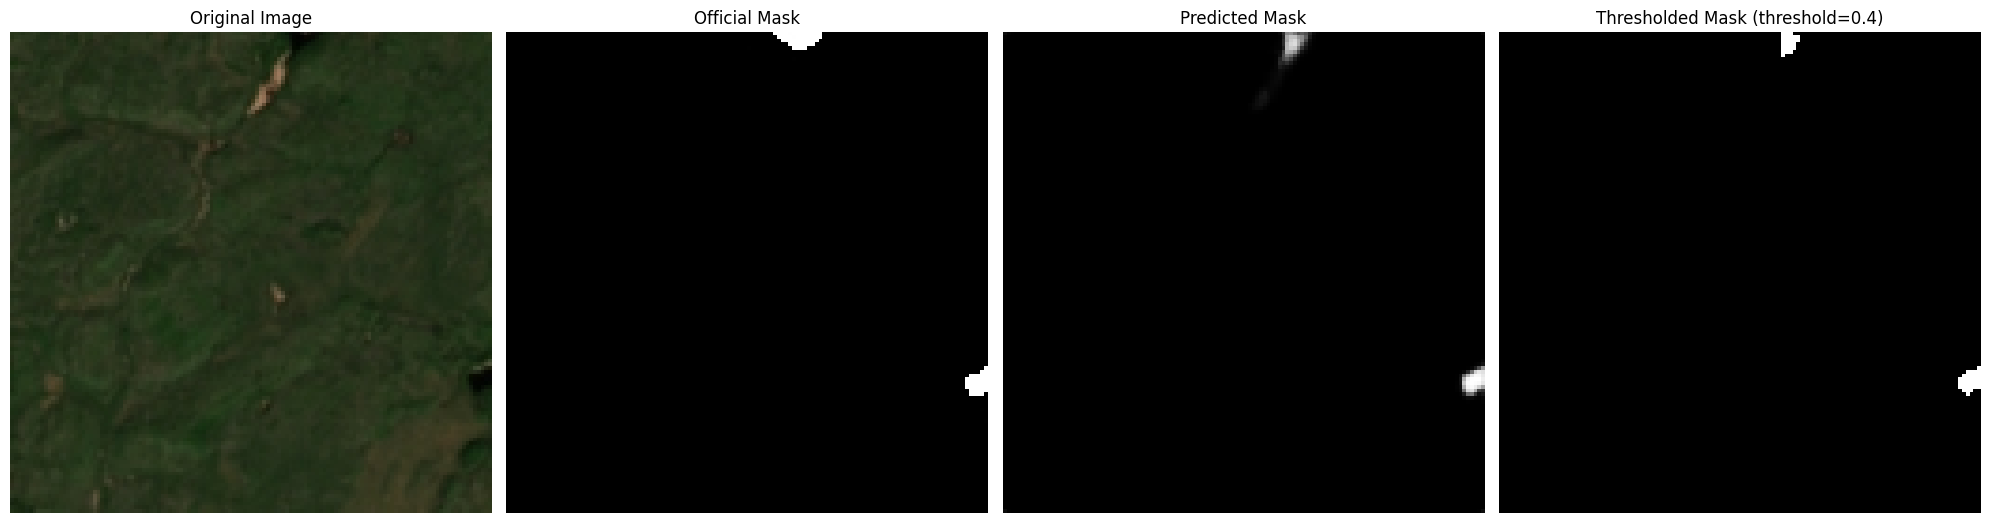

716_4608_1024.jpg


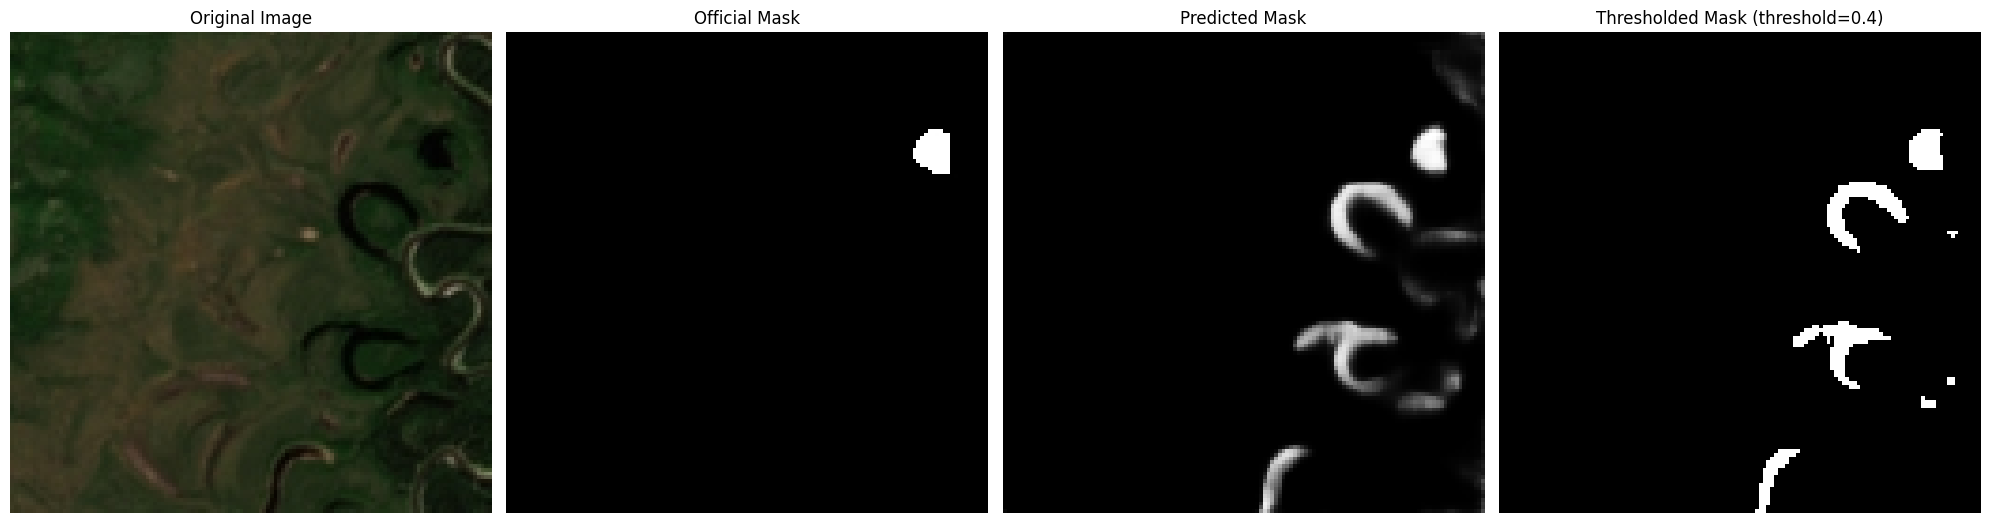

723_5504_1024.jpg


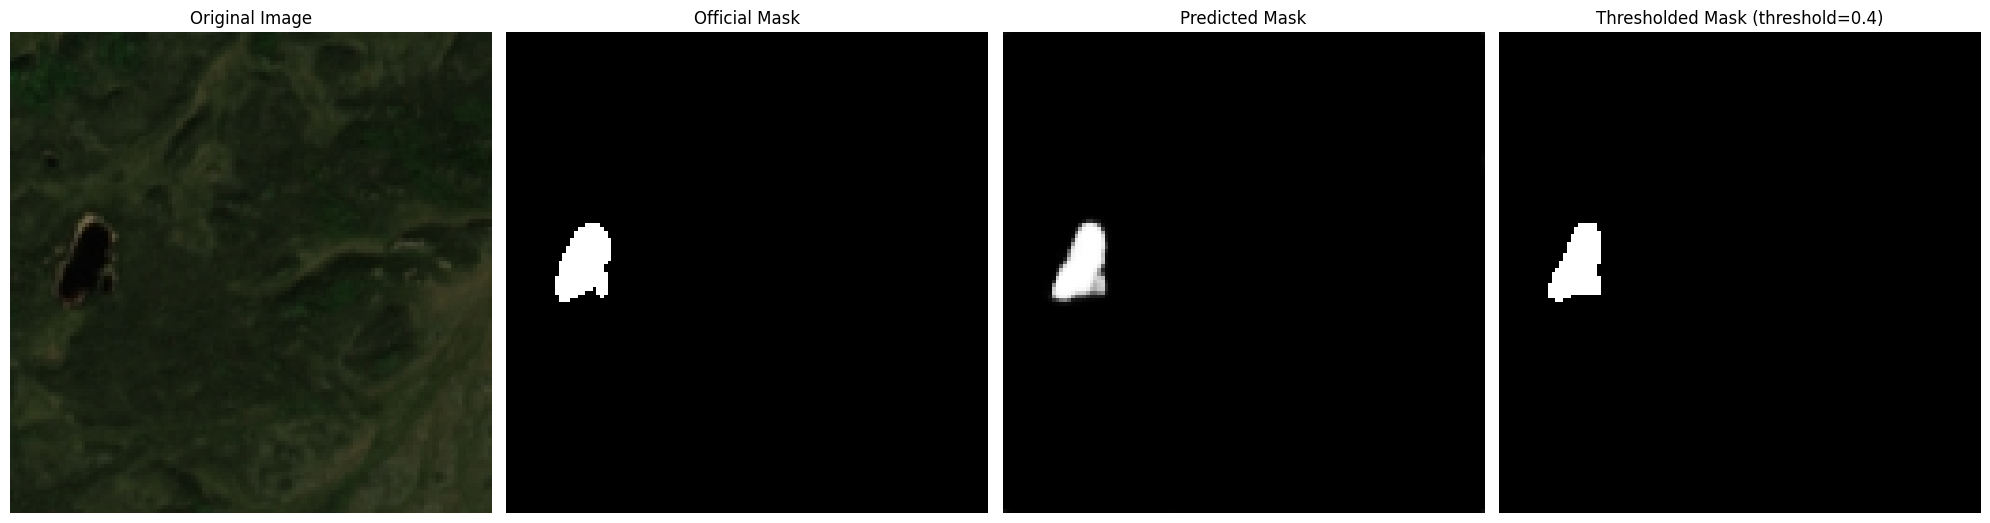

743_8064_1024.jpg


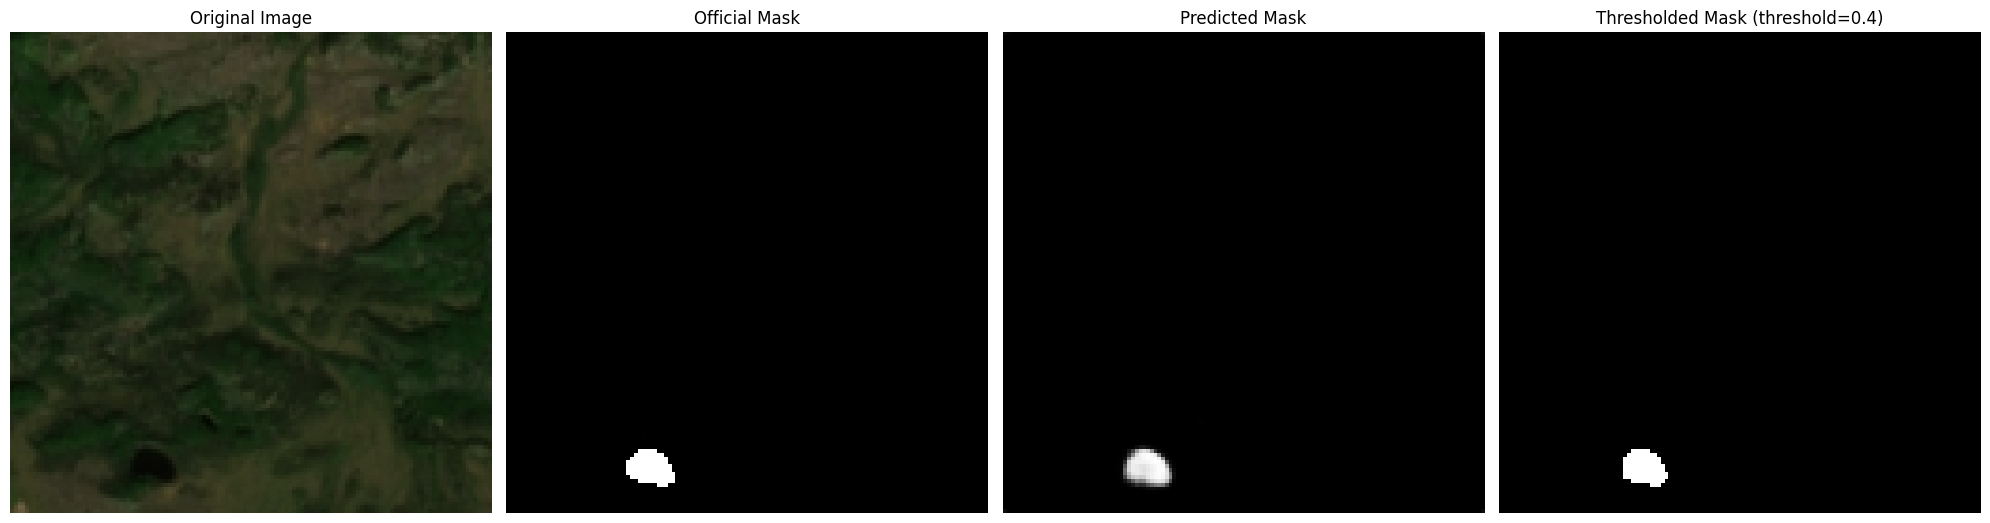

765_0_1152.jpg


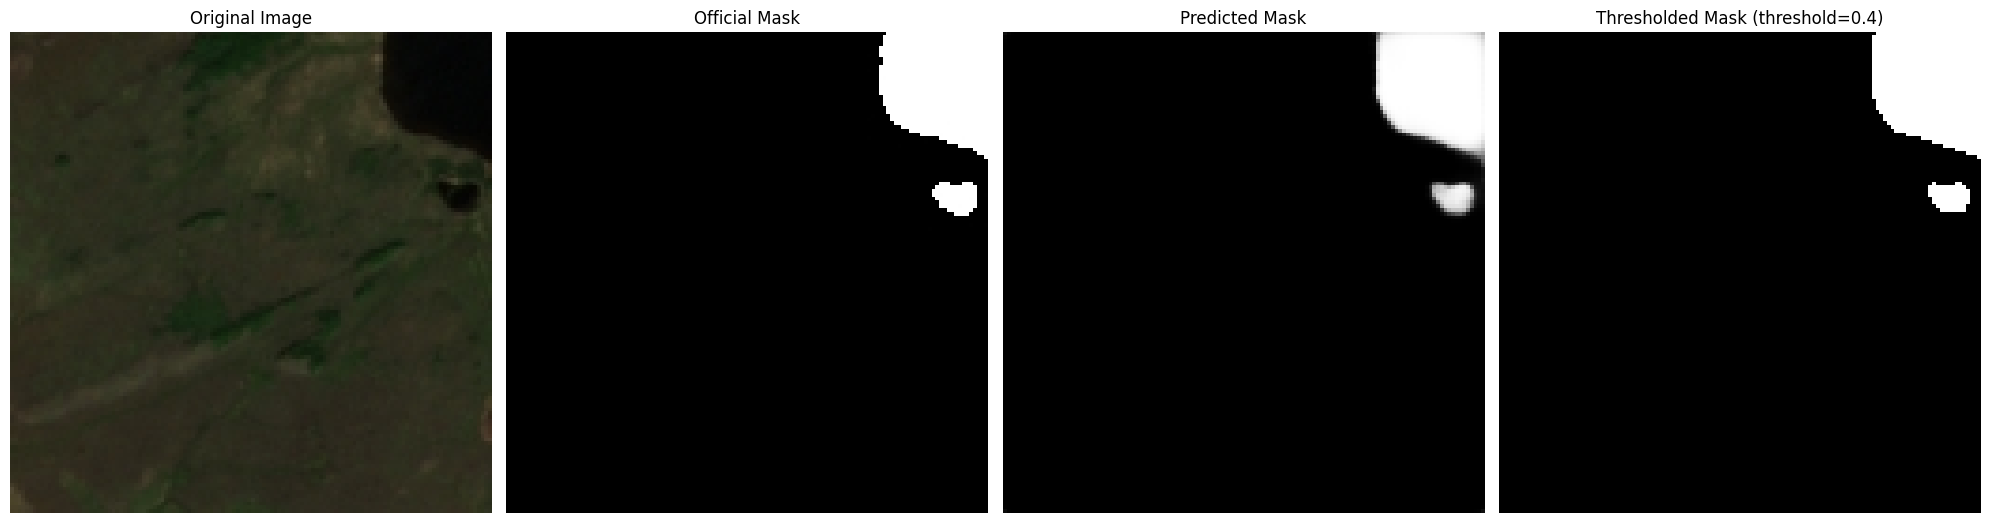

774_1152_1152.jpg


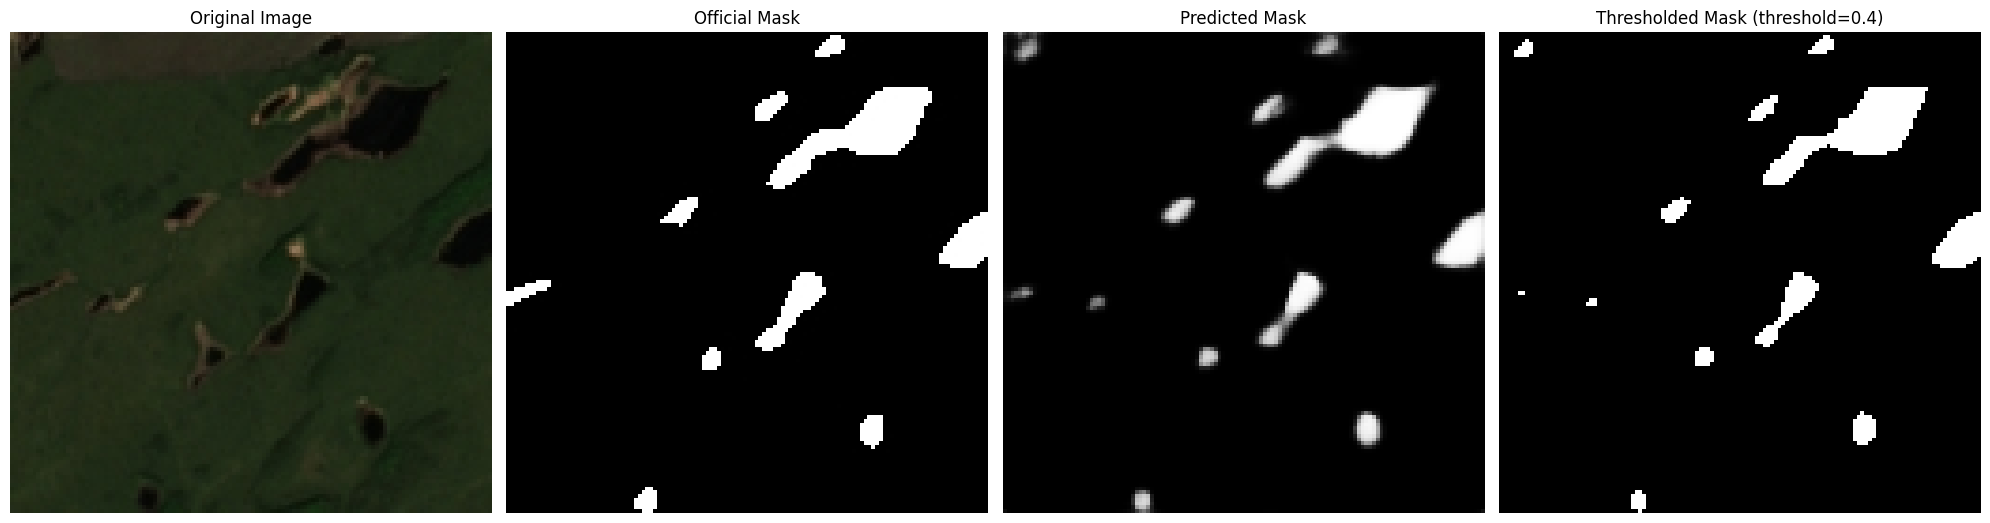

779_1792_1152.jpg


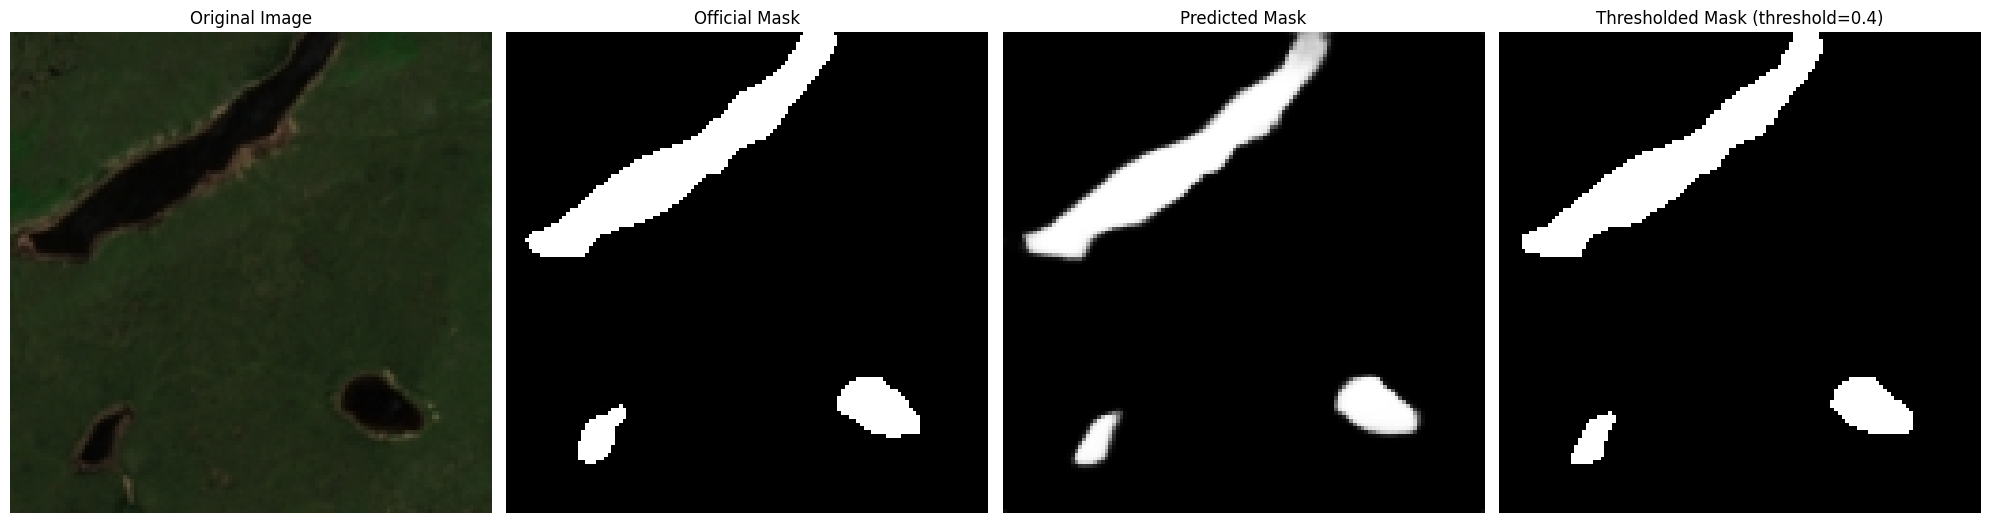

782_2176_1152.jpg


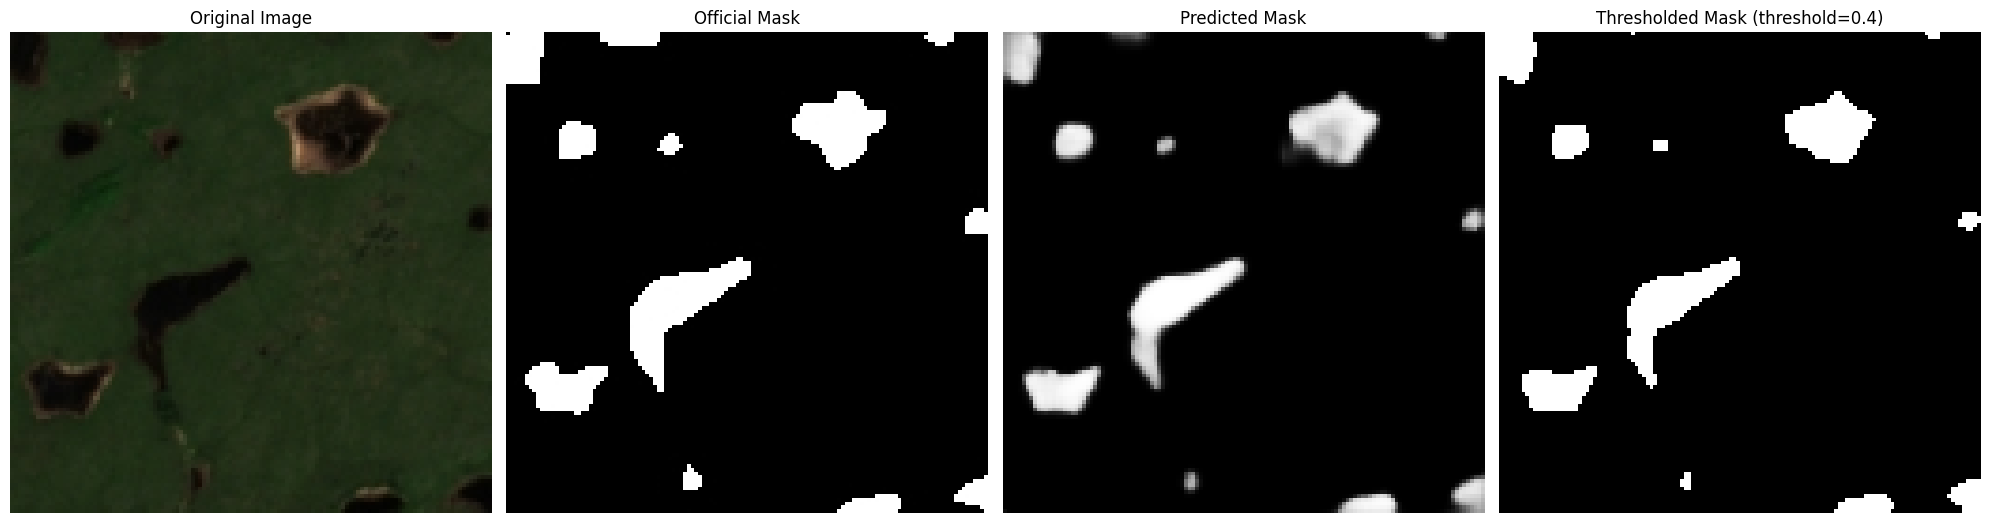

783_2304_1152.jpg


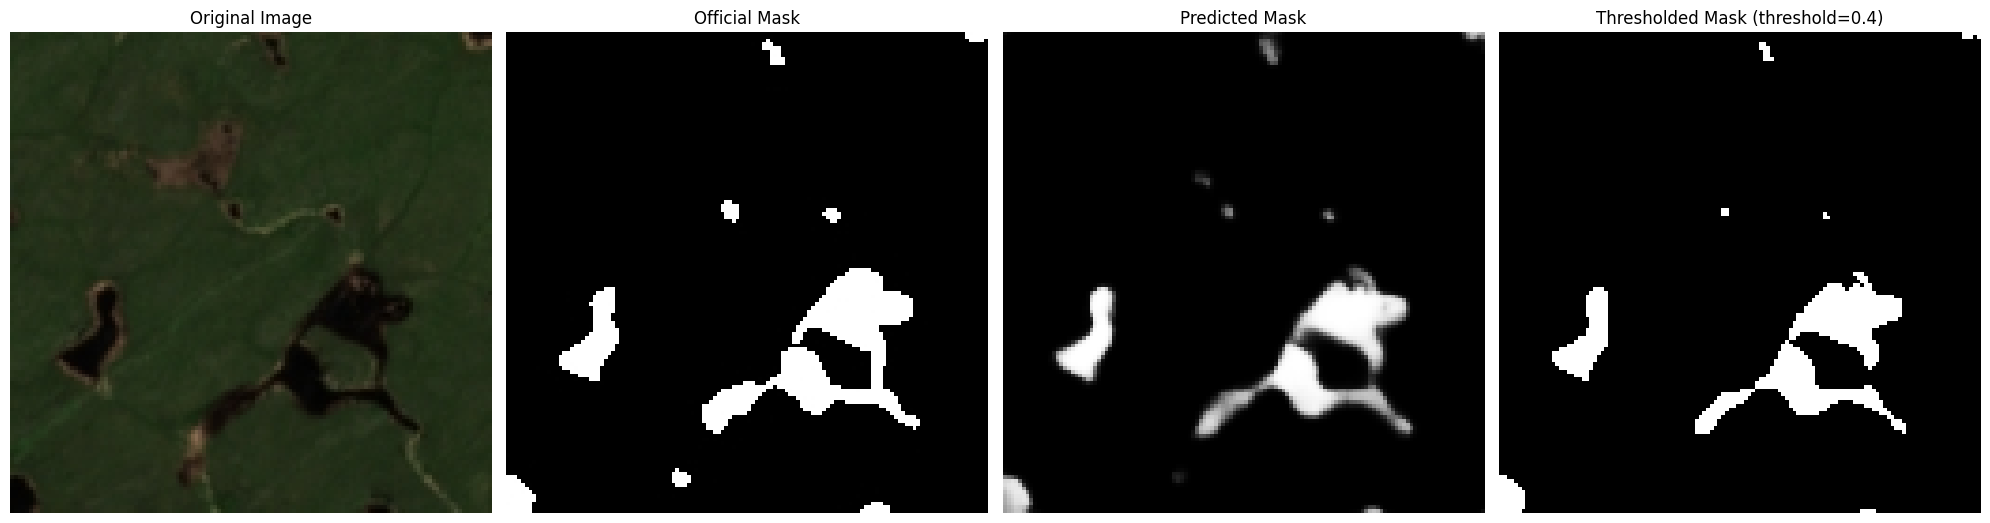

785_2560_1152.jpg


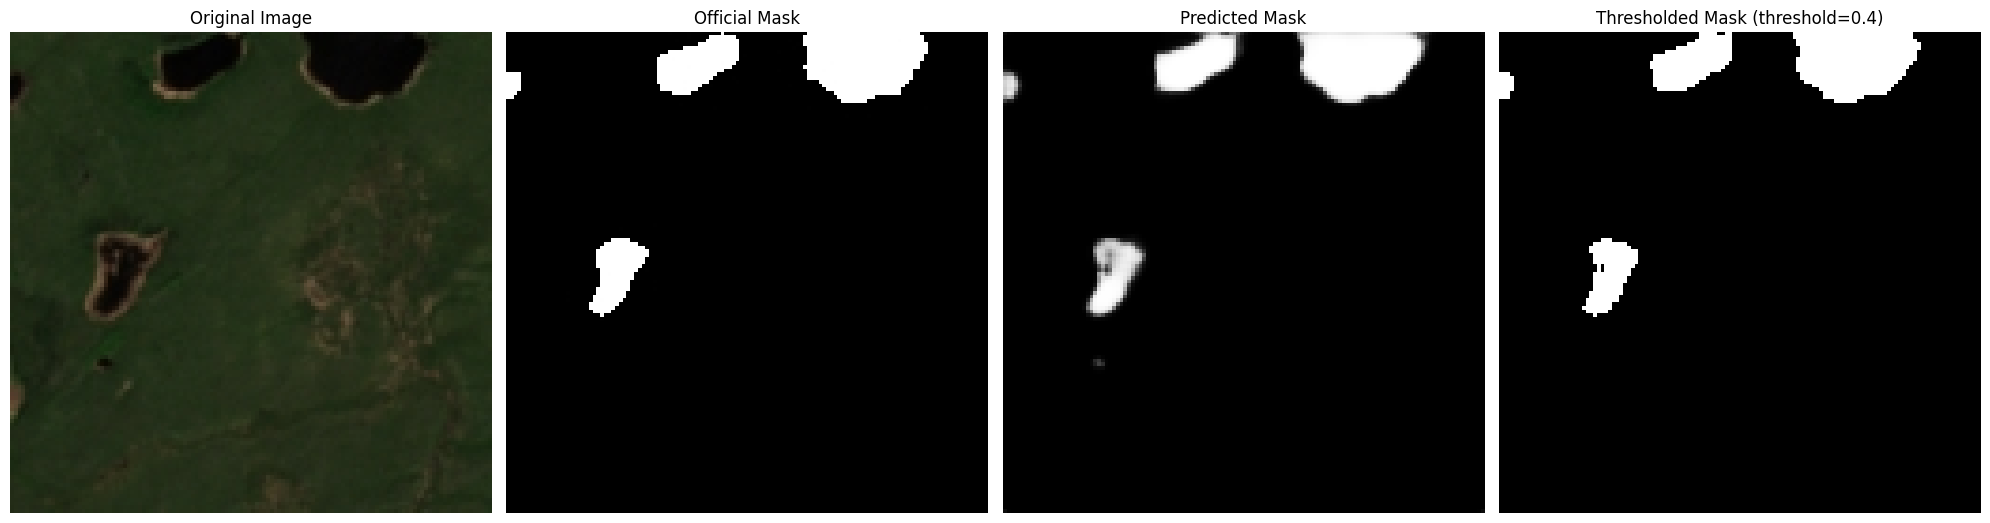

788_2944_1152.jpg


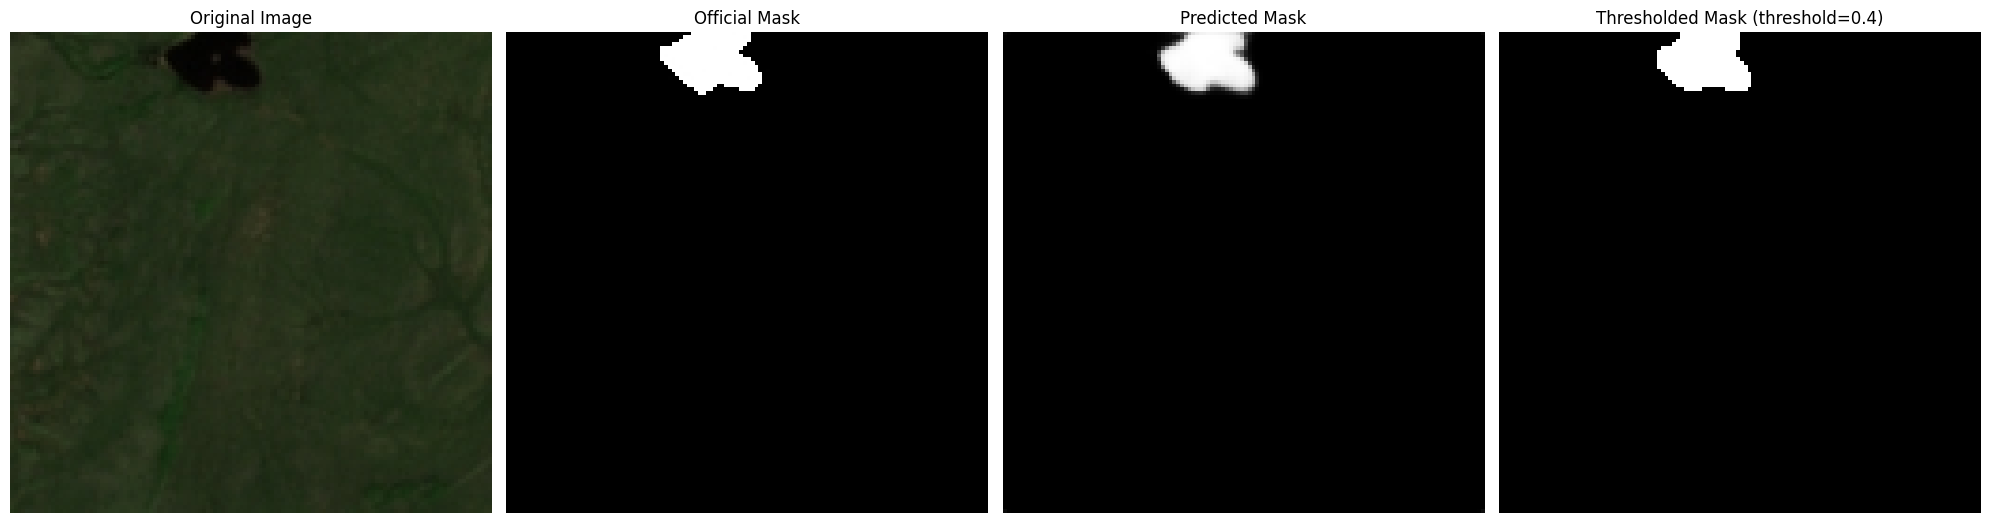

792_3456_1152.jpg


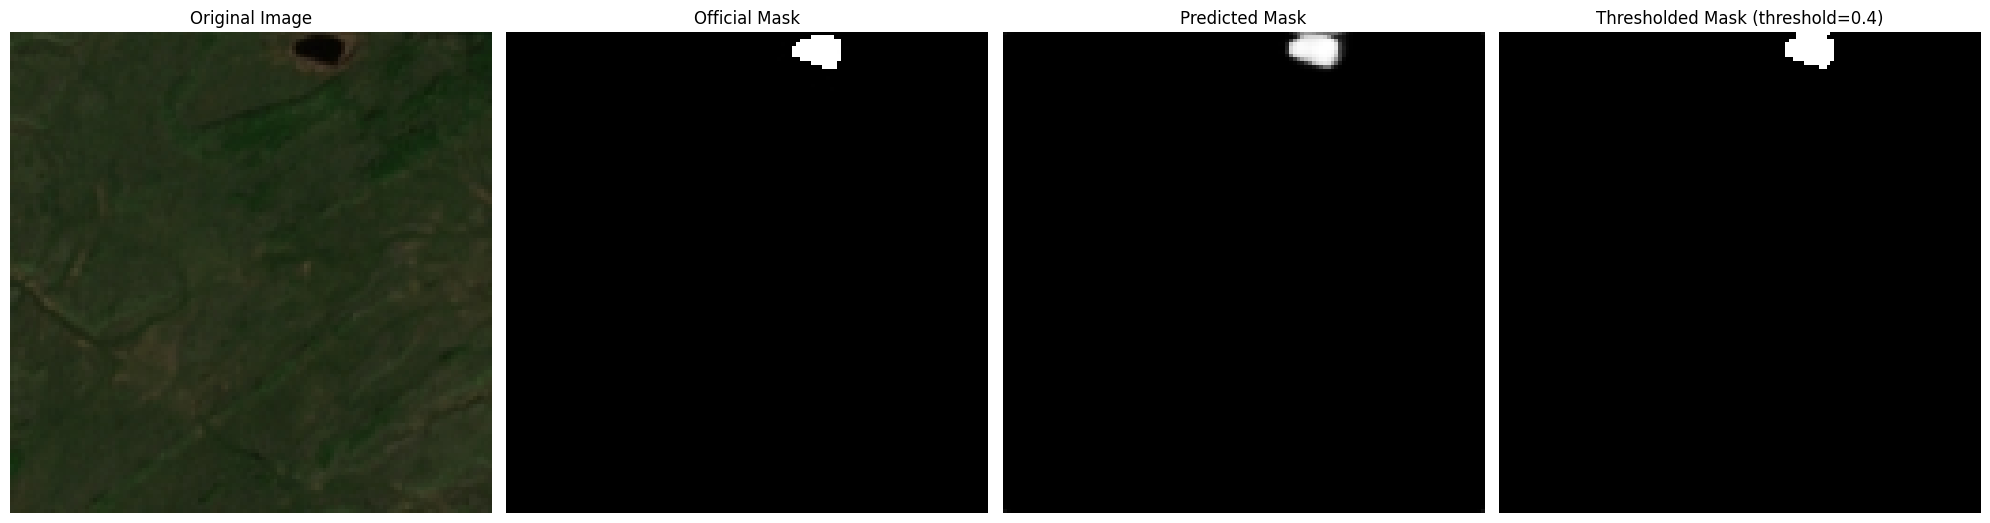

794_3712_1152.jpg


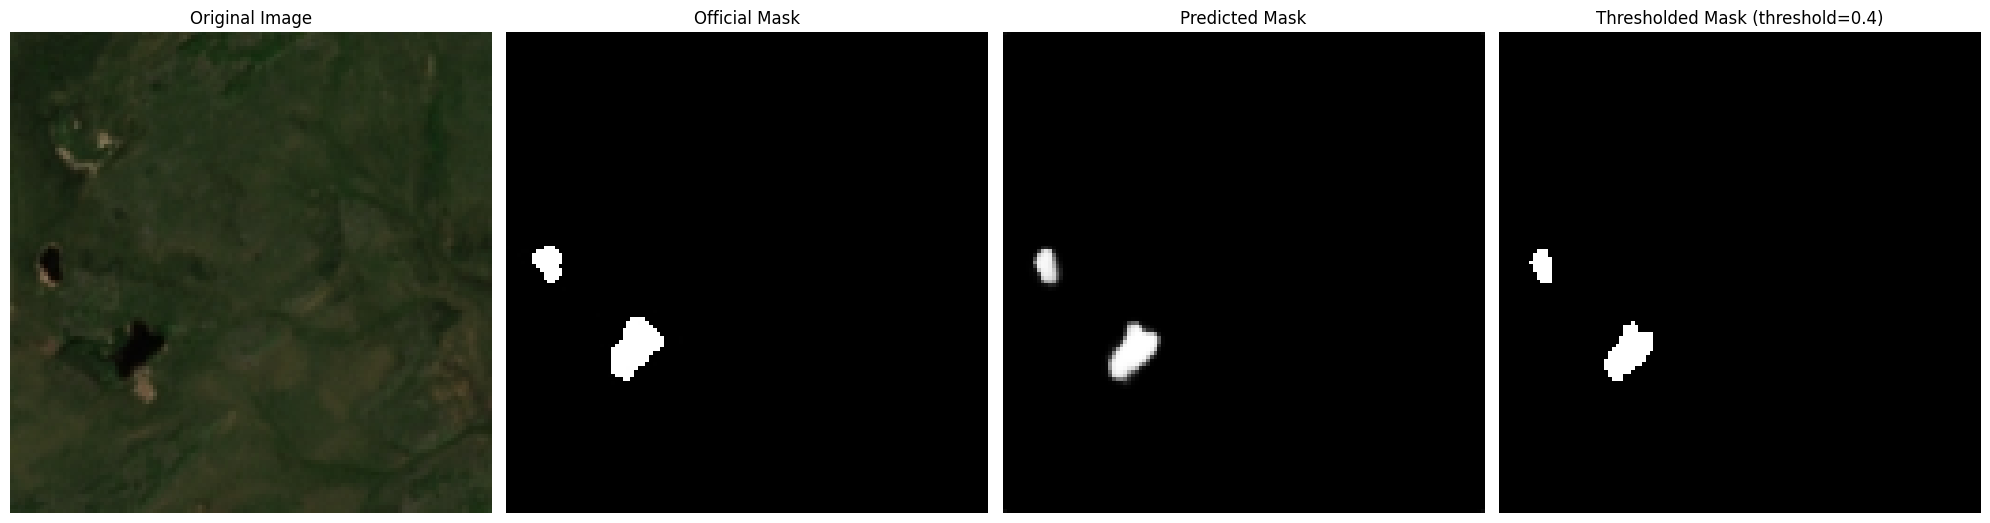

799_4352_1152.jpg


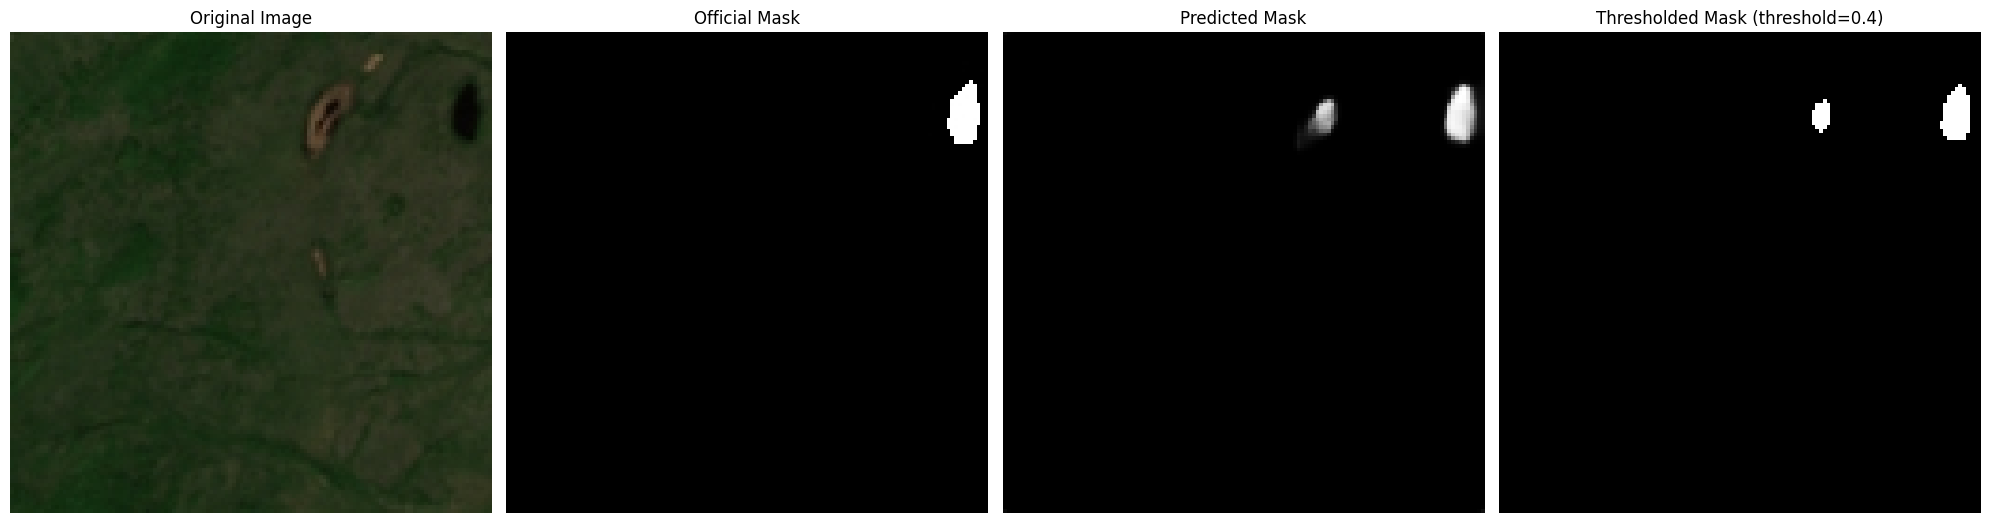

7_896_0.jpg


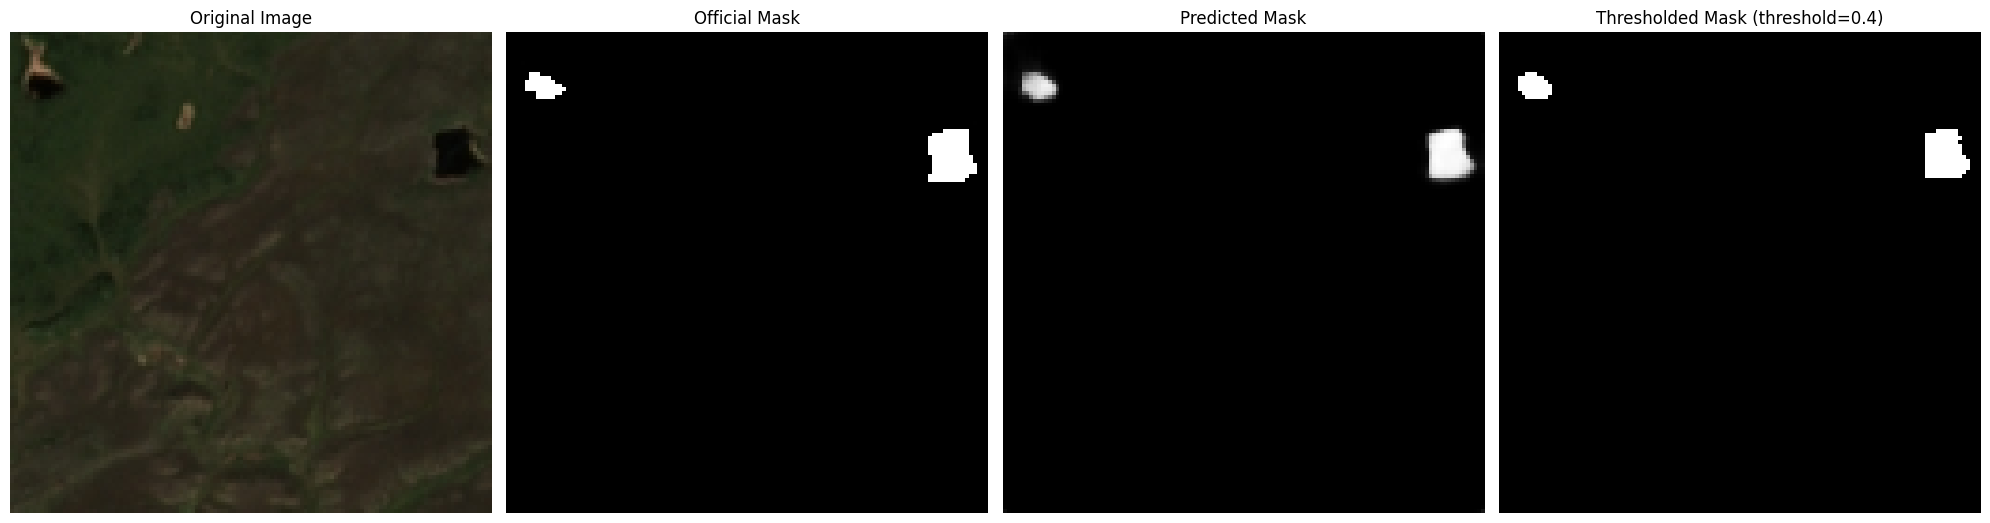

85_0_128.jpg


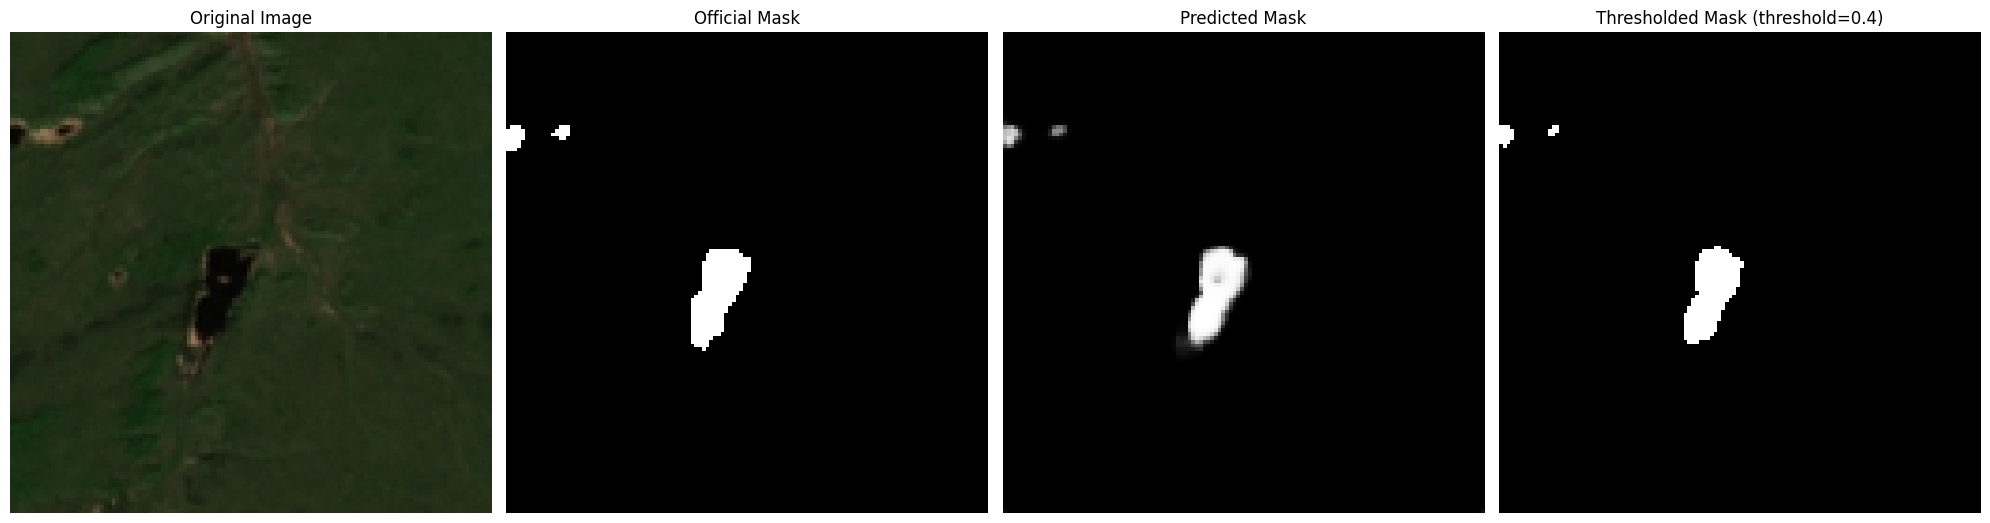

87_256_128.jpg


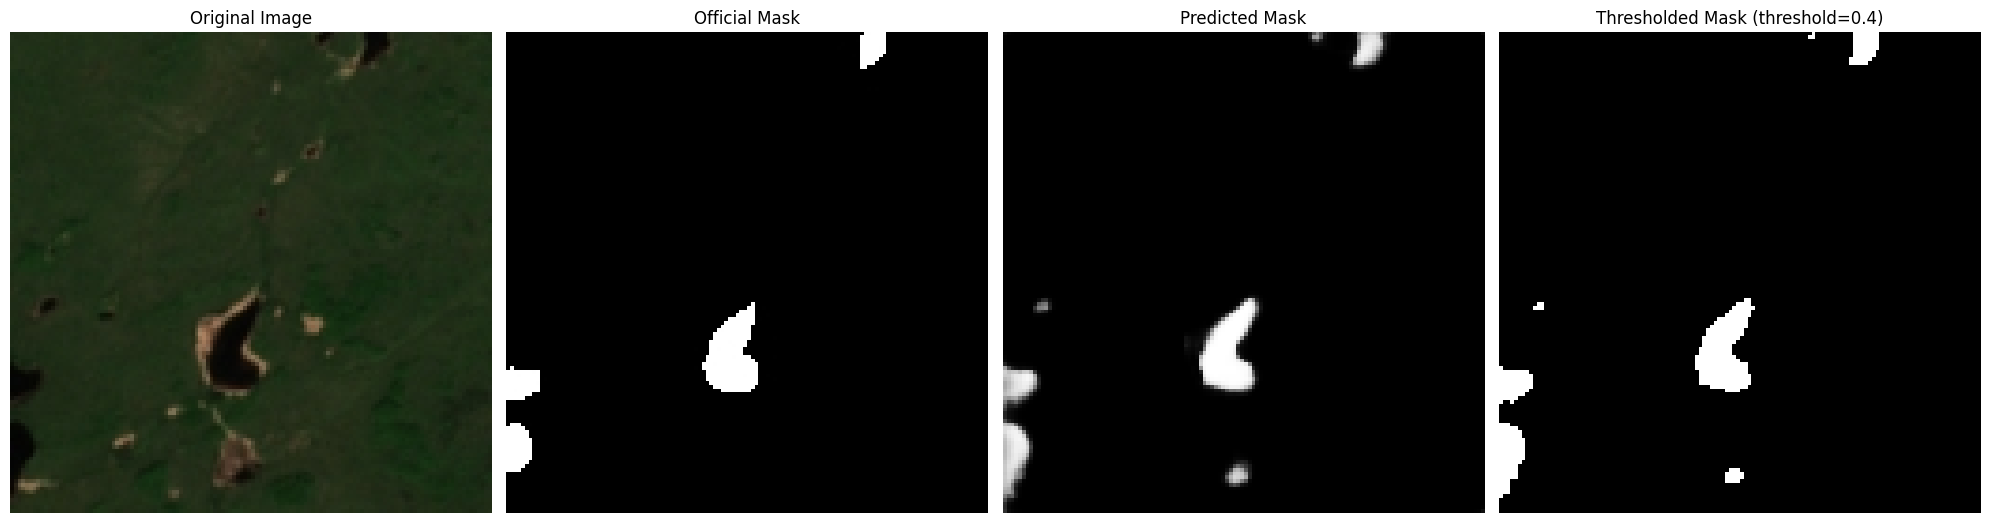

88_384_128.jpg


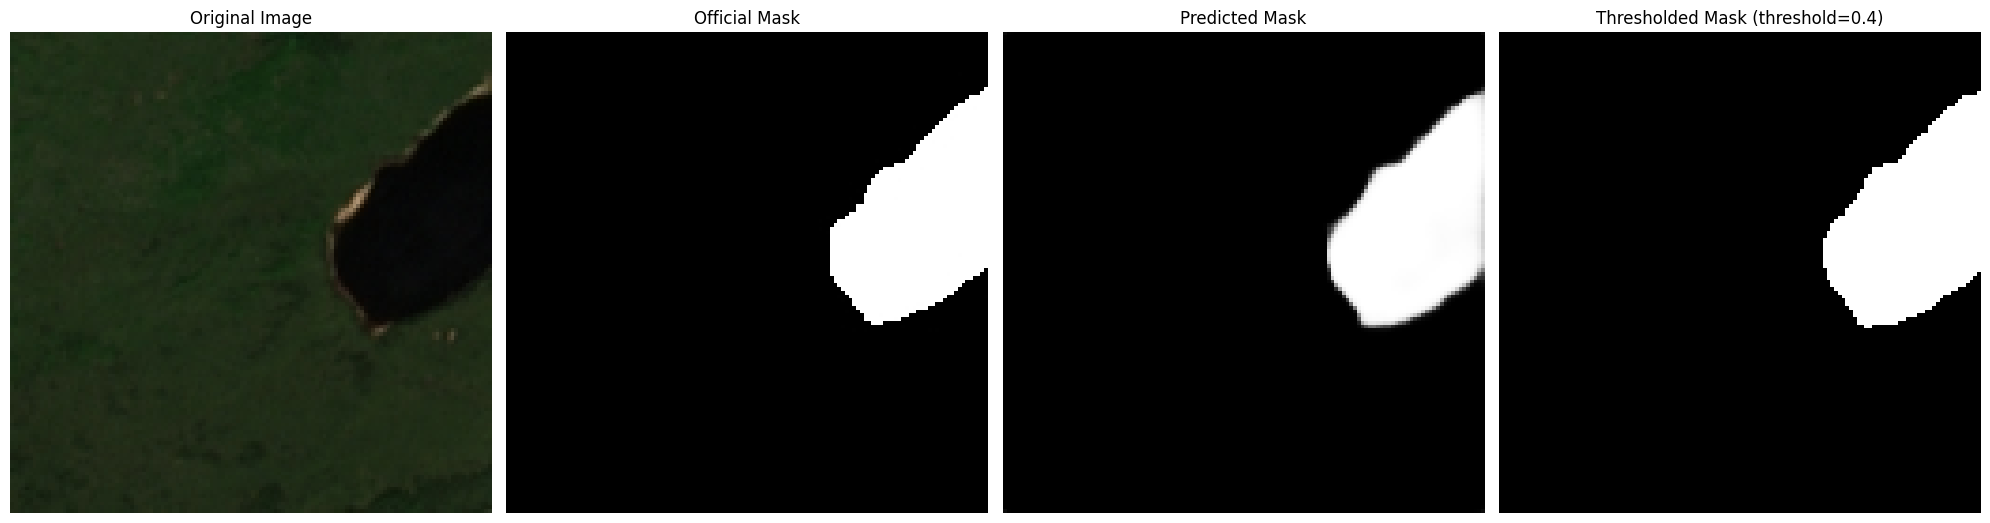

95_1280_128.jpg


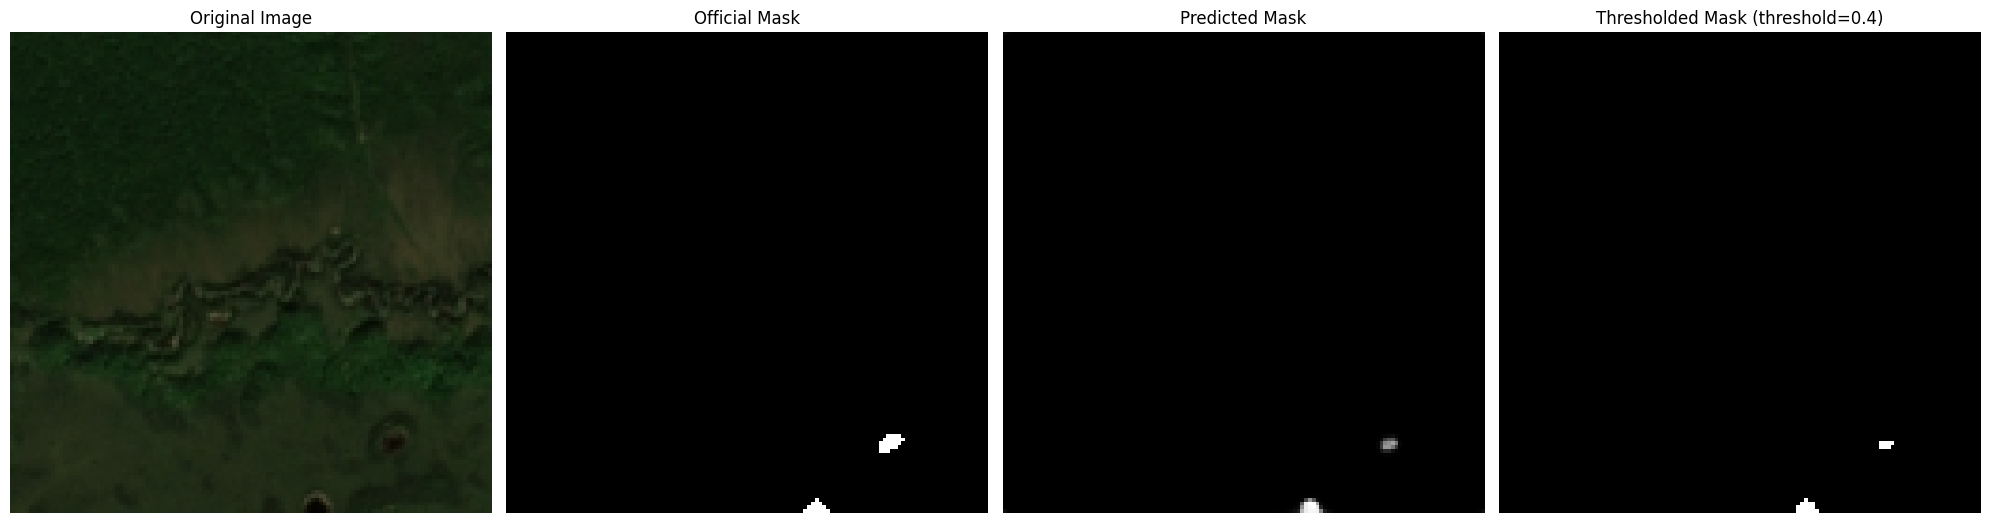

Average accuracy: 0.9888


In [3]:

# Load the model
model = load_model(model_path)

# Get list of images
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Initialize lists to store accuracy scores
accuracies = []

# Loop through images and masks
for image_file in image_files:
    print(image_file)
    # Load image and mask
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, image_file)
    
    image = np.asarray(Image.open(image_path).convert('RGB')).astype('float') / 255.
    mask = np.asarray(Image.open(mask_path).convert('L')).astype('float') / 255.
    
    # Predict mask
    tile_batch = np.expand_dims(image, axis=0)
    pred = model.predict(tile_batch, verbose=0)[0]
    
    # Threshold the predicted mask
    threshold_mask = pred > THRESHOLD
    
    # Threshold the official mask
    threshold_official_mask = mask > THRESHOLD
    
    # Calculate accuracy
    accuracy = accuracy_score(threshold_official_mask.flatten(), threshold_mask.flatten())
    accuracies.append(accuracy)
    
    # Plot the results
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Official Mask')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(pred, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(threshold_mask, cmap='gray')
    plt.title(f'Thresholded Mask (threshold={THRESHOLD})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Print average accuracy
print(f'Average accuracy: {np.mean(accuracies):.4f}')